In [1]:
## Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Understand the data

In [2]:
data = pd.read_csv('marketing_data.csv') # read data using pandas
data.head() # display top five records of data

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain    Country  
0         1         0      Spain  
1         1         0     Canada  
2         0         0        USA  
3         0         0  Australia  
4         1         0      Spain  

[5 rows x 28 columns]

In [3]:
data.shape

(2240, 28)

Using shape function returns the dimension of the data.

we observed dataframe having **`28`** columns and **`2240`** observations.

## Data Preprocessing
Let us have a look at the information in data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Using the __*info function*__, we can pull the following information from our dataset :
>- We have __3 categorical variables__ and __26 numerical variables__
>- We have __missing values__ for the __*Income*__ variable
>- We have __space__ in the __*Income*__ variable

In [5]:
## Summary of Statistics
data.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
 Income              2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
 Income              51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Complain                 0.0      0.00       1.0

## Data Cleaning
In order to, get a full grasp of what steps should I be taking to clean the dataset.

In [6]:
## duplicate original data using copy()
df = data.copy()

In [7]:
# Check for shape of data
df.shape

(2240, 28)

In [8]:
df.rename(columns={' Income ':'Income'}, inplace=True) # remove space from income column

# <font color='red'>1) Are there any null values or outliers? How will you handle them?</font>

a.	Handle them by removing and replacing and creating datasets for each condition


In [9]:
#Check null value of dataset
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

We have `24` null values in **Income** column.

We know that if we have less null values then we will fill with fillna().
And as we know dtype of income cloumn is integer so, we will use mean() to fill null values.

In [10]:
## fillna with mean()
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [11]:
# Change int to float
df['Income'] = df['Income'].astype(float)

In [12]:
## check again for null values
df.isnull().sum().sum()

0

##### Dt_customer type is object. So change into datetime

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [15]:
# Create a new column "Age" with present year 
# Use datetime.now().year for get current year
import datetime
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

In [16]:
## Drop uncessary parameter
df  = df.drop(['Year_Birth'],axis=1)

## Outliers

### Lets check in the each features. For outliers we will use visualization as Boxplot to understand extra data in daatframe.


In [17]:
## Summary of Statistics
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Income               2240.0  52247.251354  25037.797168  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Age                  2240.0     53.194196     11.984069    26.0     45.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Income               51741.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Age                     52.0     63.00     129.0

In [18]:
# select columns to plot
df_to_plot = df.drop(columns=['ID','Kidhome','Teenhome',
                              'AcceptedCmp1', 'AcceptedCmp2', 
                              'AcceptedCmp3', 'AcceptedCmp4', 
                              'AcceptedCmp5', 'Response', 
                              'Complain']).select_dtypes(include=np.number)

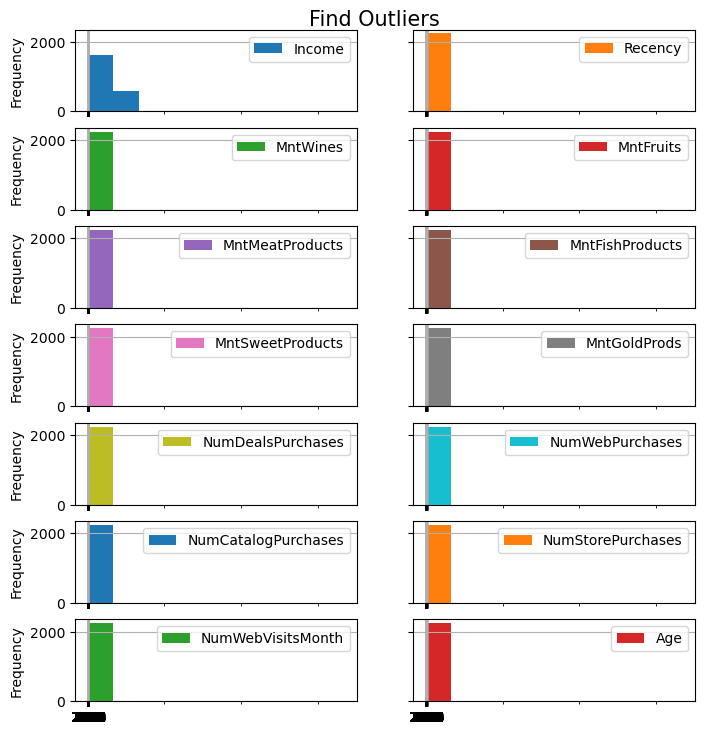

In [19]:
# Check data is normally distributed?
# subplots
df_to_plot.plot(subplots=True,kind='hist',grid=True,
                layout=(8,2), sharey=True, legend=True, figsize=(8,10),xticks=np.arange(0, len(df_to_plot), 16))
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.show()

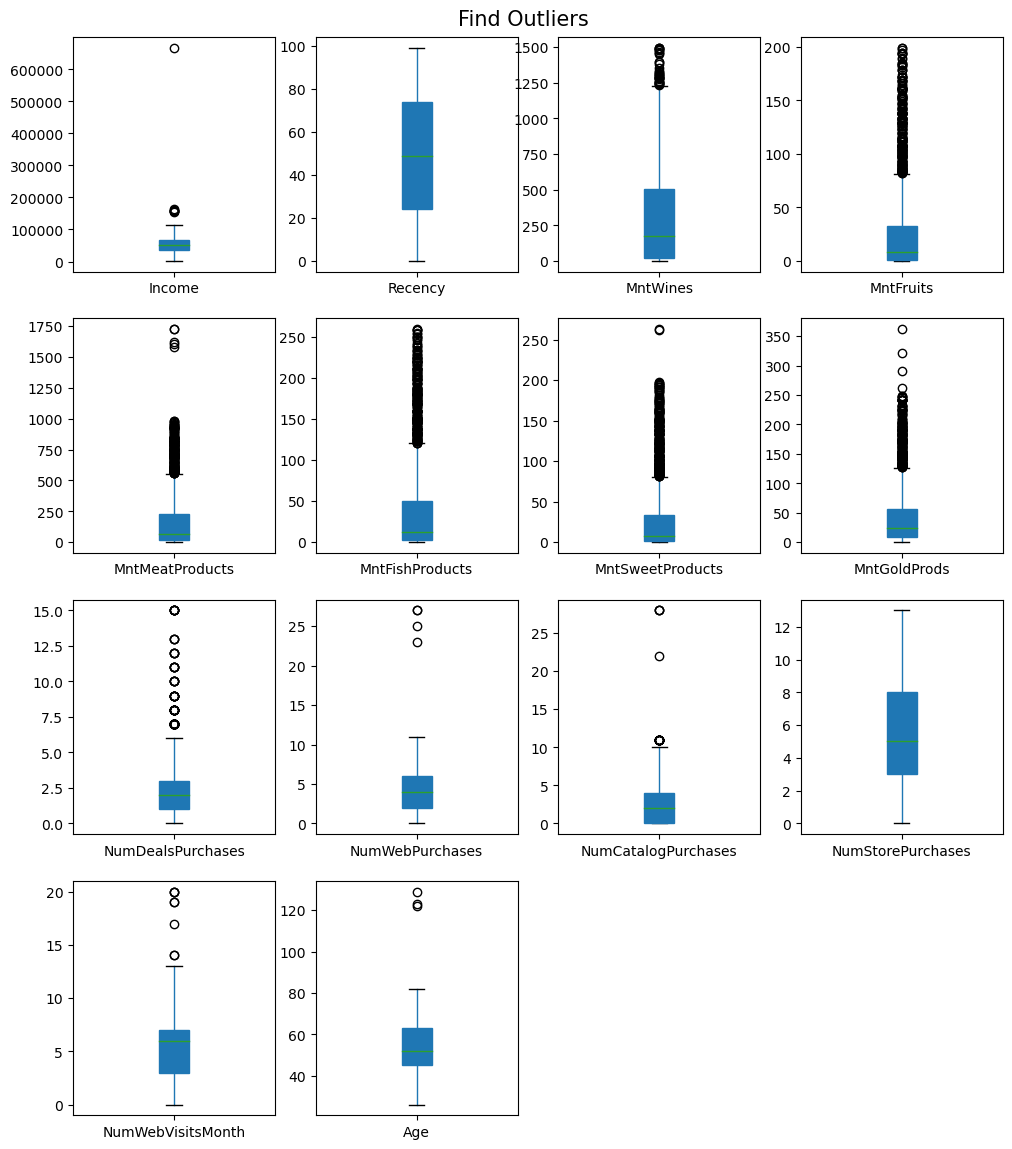

In [20]:
# See if there is any outliers
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.show()

**There are many columns having outliers.**

- We will using **`Z-score treatment`** for removing outliers.

###  To better understand these unique values, let's look at the ages of these customers based on Country.

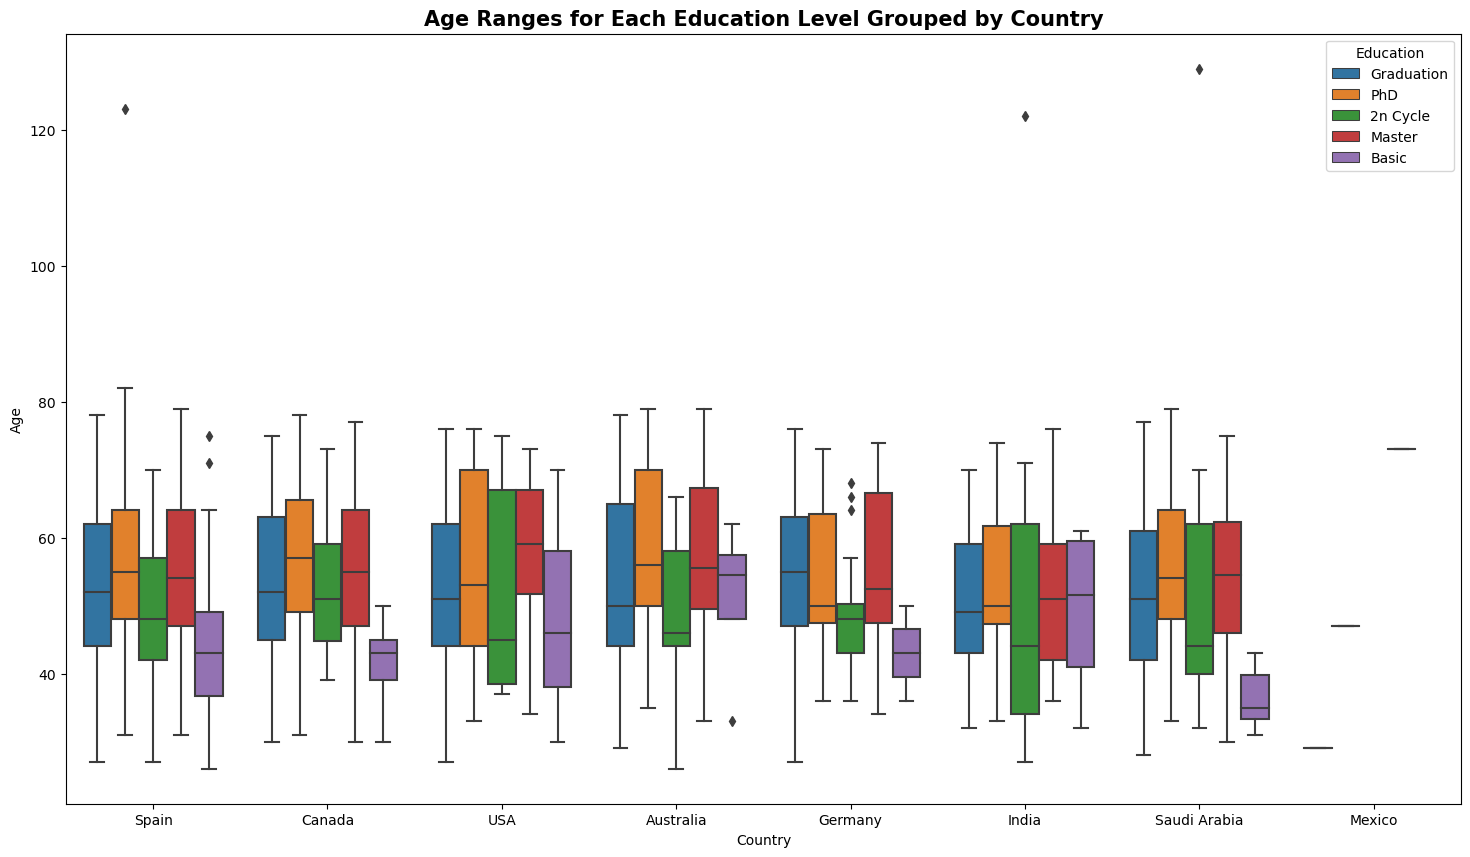

In [21]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Age', hue='Education',data=df)
plt.title("Age Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

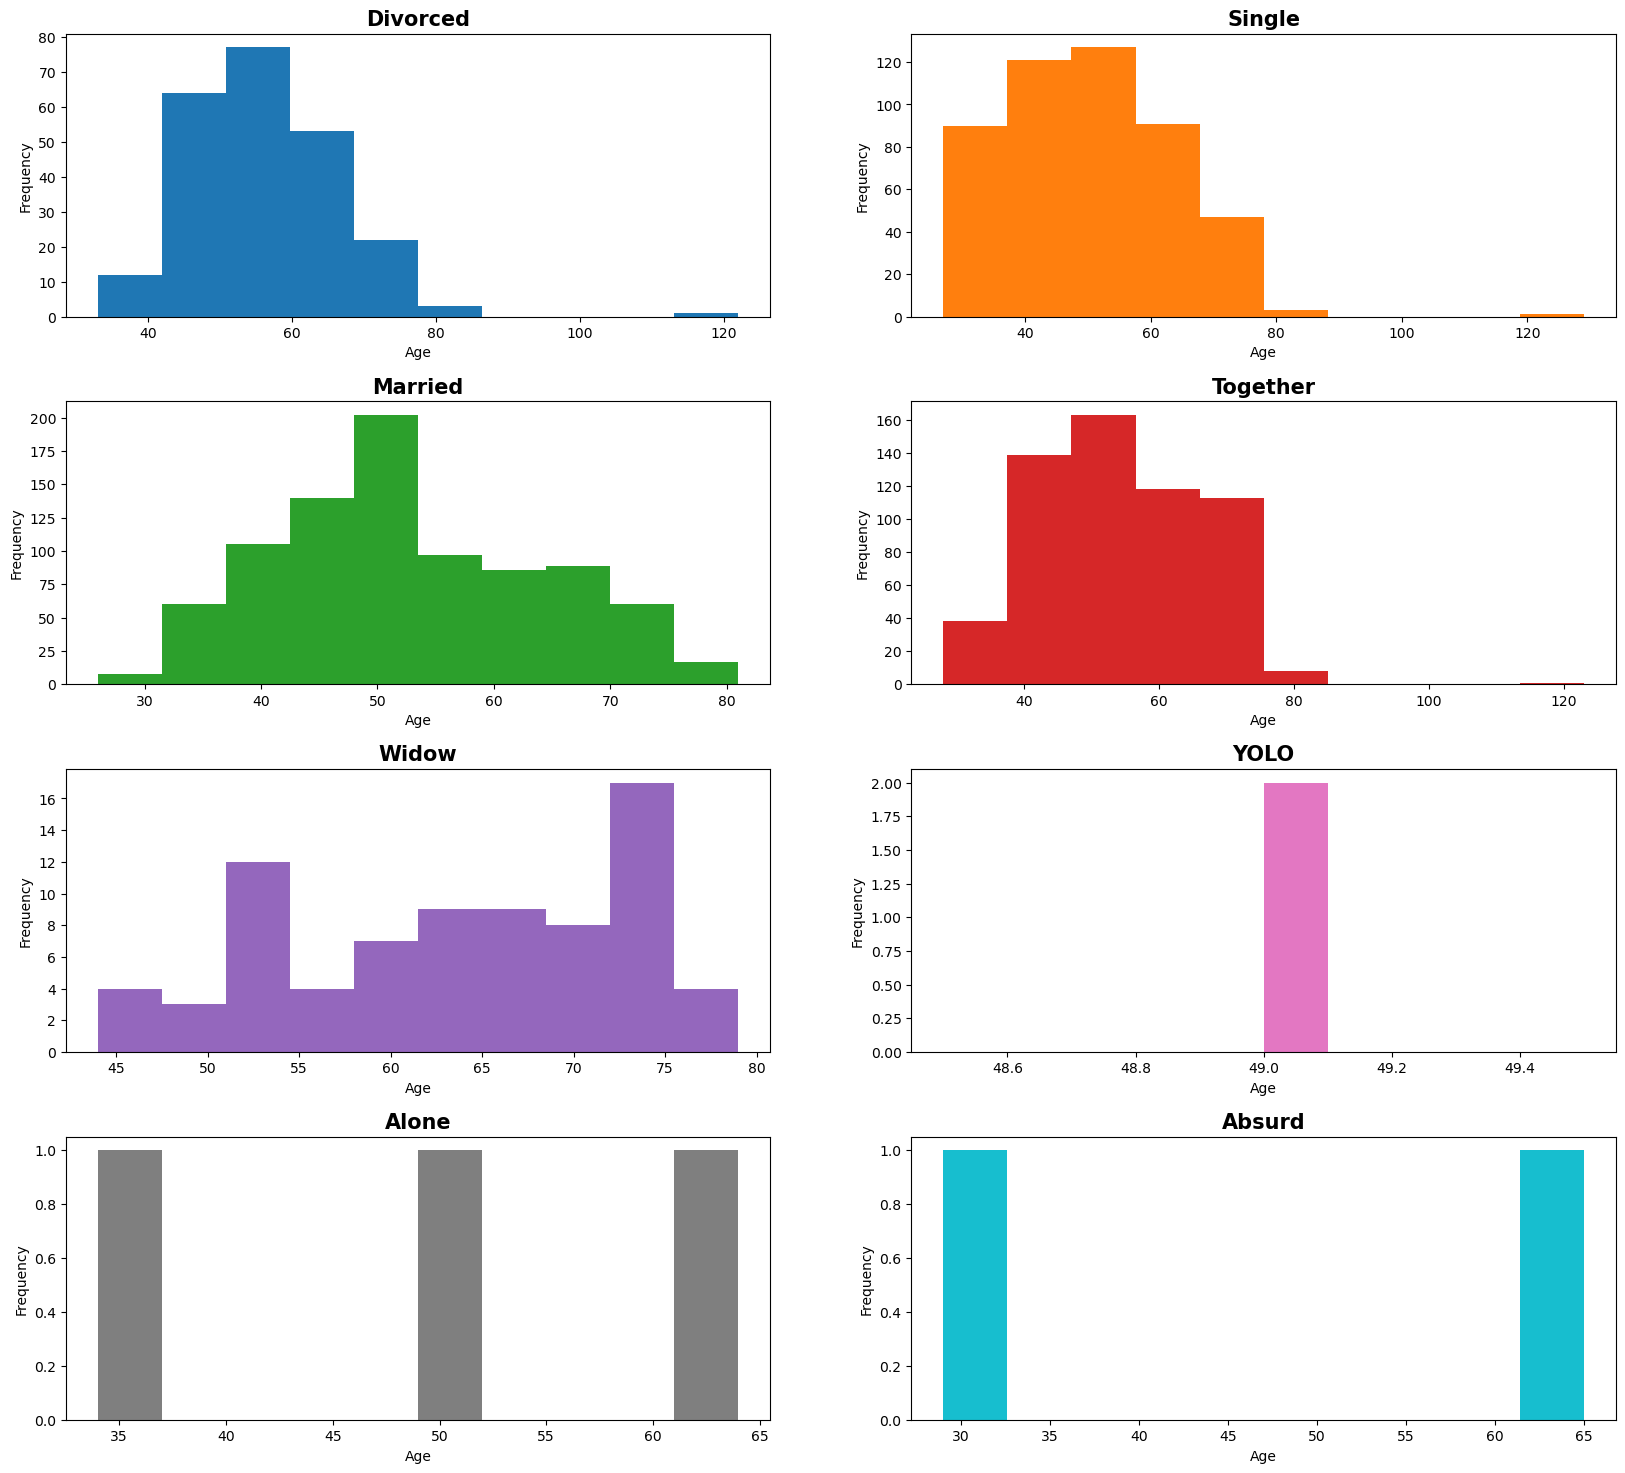

In [22]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20,18))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:pink','tab:gray','tab:cyan']

counter = 0
unique_vals = df['Marital_Status'].unique()

for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ax.hist(df[df['Marital_Status'] == unique_vals[counter]]['Age'],
                color=colors[counter])
        ax.set_title('{}'.format(unique_vals[counter]), fontdict={'fontsize':15, 'fontweight':'bold'})
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
        plt.subplots_adjust(hspace=0.3)

        counter+=1

For marital status, it is legally defined. The values Married, Single, Divorced, and Widow are all acceptable values.

## Feature Engineering

- Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"
- Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
- Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"
- Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
- Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
- Total_campaign: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column

In [23]:
# Create new features
new_df = df.copy()

In [24]:
# total number of dependents in household
new_df['Total_kids'] = new_df['Kidhome']+new_df['Teenhome']
# How long the person has been a customer in days
new_df["Join_year"] = new_df.Dt_Customer.dt.year
new_df["Join_month"] = new_df.Dt_Customer.dt.month
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday

#Total number of amount sepnd by customer
new_df['Total_Mnt'] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds 

# Total number of purchases made by customer
new_df['Total_num_purchase'] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 

# Total number of marketing campaigns the customer has accepted
new_df['Total_campaign'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response

In [25]:
new_df.head()

ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0   1826  Graduation       Divorced  84835.0        0         0  2014-06-16   
1      1  Graduation         Single  57091.0        0         0  2014-06-15   
2  10476  Graduation        Married  67267.0        0         1  2014-05-13   
3   1386  Graduation       Together  32474.0        1         1  2014-05-11   
4   5371  Graduation         Single  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Complain    Country  Age  Total_kids  \
0        0       189        104  ...         0      Spain   52           0   
1        0       464          5  ...         0     Canada   61           0   
2        0       134         11  ...         0        USA   64           1   
3        0        10          0  ...         0  Australia   55           2   
4        0         6         16  ...         0      Spain   33           1   

   Join_year  Join_month  Join_weekday  Total_Mnt  Total_num_purchase  \
0       2014           6             0       1190                  16   
1       2014           6             6        577                  23   
2       2014           5             1        251                  13   
3       2014           5             6         11                  11   
4       2014           4             1         91                  15   

   Total_campaign  
0               1  
1               2  
2               0  
3               0  
4               2  

[5 rows x 35 columns]

### **We will do one hot ecnoding for Categorical variable**

In [26]:
## One hot encoding for Education column
dummies1= pd.get_dummies(new_df['Education'])
dummies1.head()

2n Cycle  Basic  Graduation  Master  PhD
0         0      0           1       0    0
1         0      0           1       0    0
2         0      0           1       0    0
3         0      0           1       0    0
4         0      0           1       0    0

In [27]:
## One hot encoding for Marital_status column
dummies2 = pd.get_dummies(new_df['Marital_Status'])
dummies2.head()

Absurd  Alone  Divorced  Married  Single  Together  Widow  YOLO
0       0      0         1        0       0         0      0     0
1       0      0         0        0       1         0      0     0
2       0      0         0        1       0         0      0     0
3       0      0         0        0       0         1      0     0
4       0      0         0        0       1         0      0     0

In [28]:
## concat dummies table to dataframe
new_df = pd.concat([new_df,dummies1,dummies2],axis=1)

In [29]:
## Drop unnecessary parameter
new_df = new_df.drop(['ID','Kidhome','Teenhome','Dt_Customer','Education','Marital_Status'],axis=1)

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   Recency              2240 non-null   int64  
 2   MntWines             2240 non-null   int64  
 3   MntFruits            2240 non-null   int64  
 4   MntMeatProducts      2240 non-null   int64  
 5   MntFishProducts      2240 non-null   int64  
 6   MntSweetProducts     2240 non-null   int64  
 7   MntGoldProds         2240 non-null   int64  
 8   NumDealsPurchases    2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
 13  AcceptedCmp3         2240 non-null   int64  
 14  AcceptedCmp4         2240 non-null   int64  
 15  AcceptedCmp5         2240 non-null   i

## Correlation 

- **We will check correlation among all features to identify significantly.**

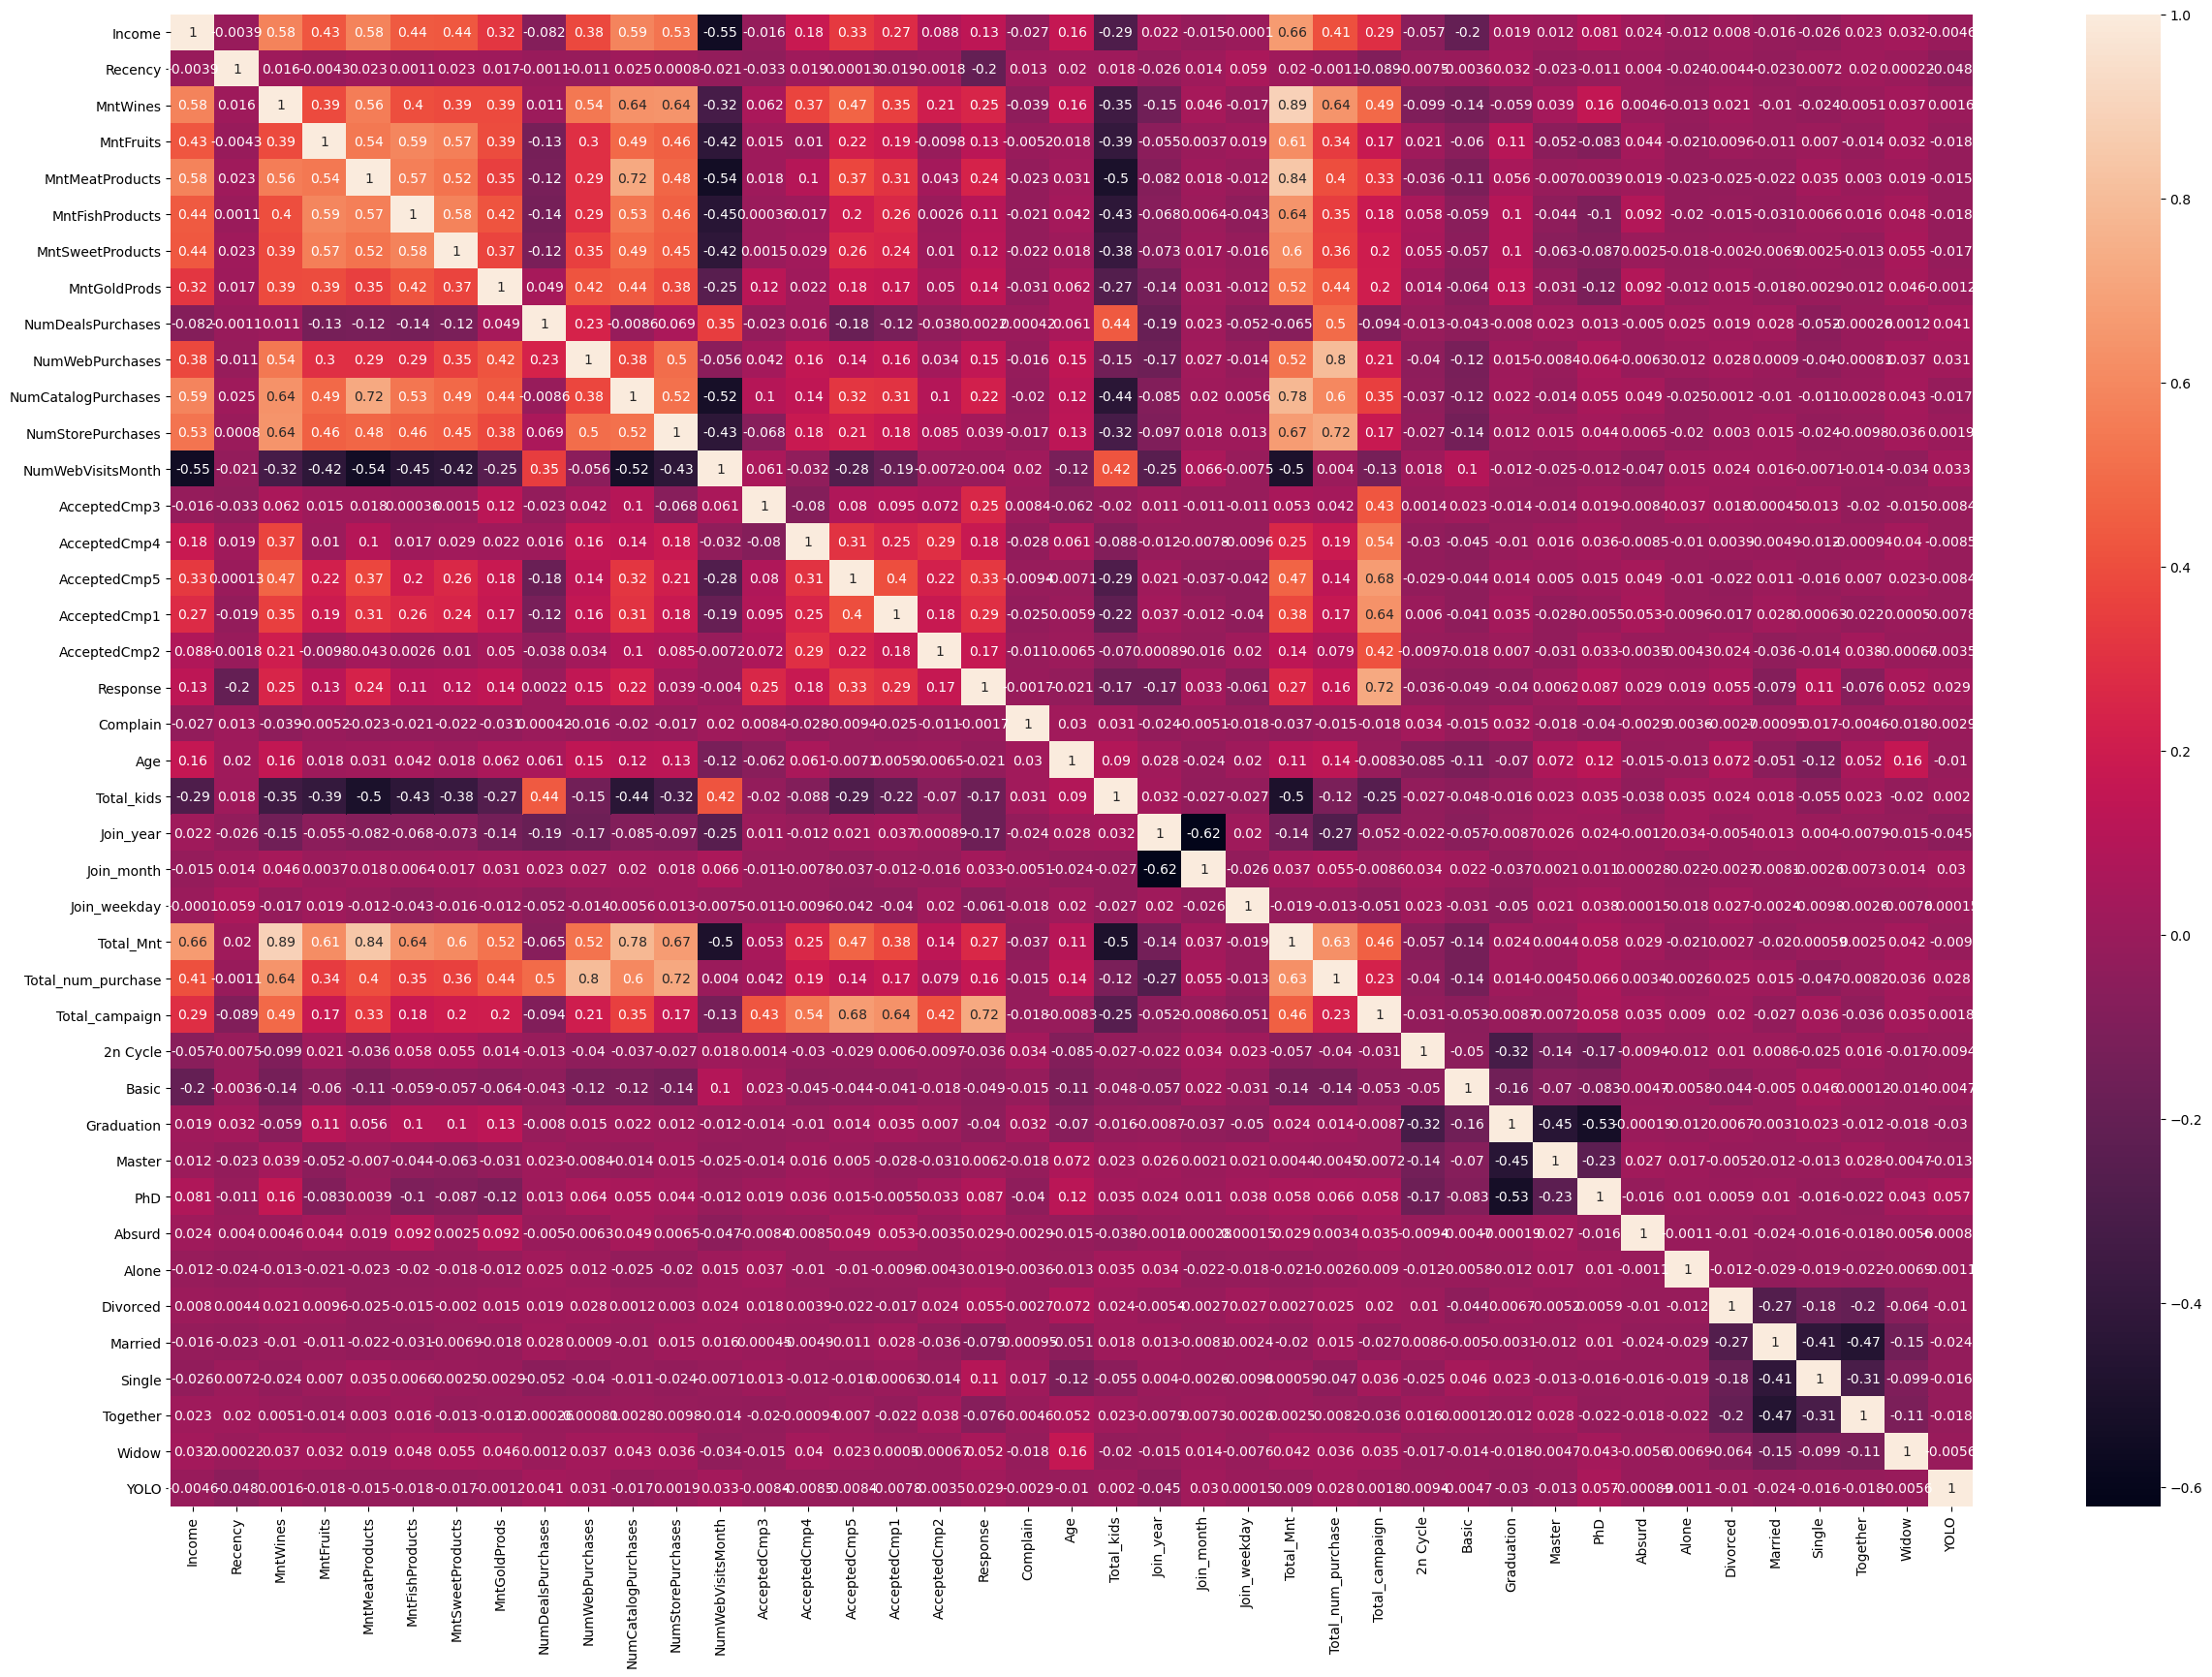

In [31]:
plt.figure(figsize=(30,20))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

# Z-score outliers

In [32]:
import scipy.stats as stats

In [33]:
df1 = new_df.drop(['Country'],axis=1)

In [34]:
z = np.abs(stats.zscore(df1))

In [35]:
#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = new_df[(z<3).all(axis=1)]

In [36]:
#find how many rows are left in the dataframe 
data_clean.shape

(1353, 42)

In [37]:
data_clean.reset_index(drop=True).head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  67267.0        0       134         11               59               15   
1  32474.0        0        10          0                1                0   
2  44931.0        0        78          0               11                0   
3  65324.0        0       384          0              102               21   
4  65324.0        0       384          0              102               21   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                 2            30                  1                3  ...   
1                 0             0                  1                1  ...   
2                 0             7                  1                2  ...   
3                32             5                  3                6  ...   
4                32             5                  3                6  ...   

   Master  PhD  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
0       0    0       0      0         0        1       0         0      0   
1       0    0       0      0         0        0       0         1      0   
2       0    0       0      0         0        0       0         1      0   
3       0    1       0      0         0        1       0         0      0   
4       0    1       0      0         0        1       0         0      0   

   YOLO  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 42 columns]

# <font color='red'>2) What factors are significantly related to the number of web purchases?</font>
     a. Build a ML model that will predict the number of web purchases

     b. Come up with insights based on the model. Build various regression models


- We will bulid a model for NumWebPurchases with various model.
>- we will use randomforest regression, Linear Regression, GradientBoosting Regression, and AdaBoost Regression
>- Also find coefficient for linear Regression and feature_importances for remaining model to understand best feature for target variable. 


- When the `target` column is **`continuous`**, we use `Regressor` and When the `target` column is **`discrete or categorical`**, we use `Classification`.
- In case of regression, the final result is generated from the **`average`**.
- With classification, the final result can be computed as the class with the **`majority of votes`**.

- **As per data information, we know that NumWebPurchase is continuous, apply regression to build models.**

In [76]:
df_model = data_clean.copy()

In [77]:
df_model = df_model.drop('Country',axis=1)

In [78]:
df_model.shape

(1353, 41)

In [79]:
# dropping symmetrical variables(normal distribution)
df_model = df_model.drop(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD',
                          'Absurd', 'Alone', 'Divorced', 'Married', 'Single',
                          'Together', 'Widow','YOLO','AcceptedCmp3','AcceptedCmp4',
                          'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response', 'Complain'],axis=1)

In [80]:
# Import Train-Test Split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Get X and y features for building model 
X=df_model.drop(['NumWebPurchases'],axis=1)  # Features
y=df_model['NumWebPurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# 80% training and 20% test

In [81]:
X_train.shape,y_train.shape

((1082, 20), (1082,))

In [82]:
## Build Linear Model using statmodel
import statsmodels.api as sm
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.482e+27
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:58:53   Log-Likelihood:                 29432.
No. Observations:                1082   AIC:                        -5.882e+04
Df Residuals:                    1062   BIC:                        -5.872e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.546e-11   5

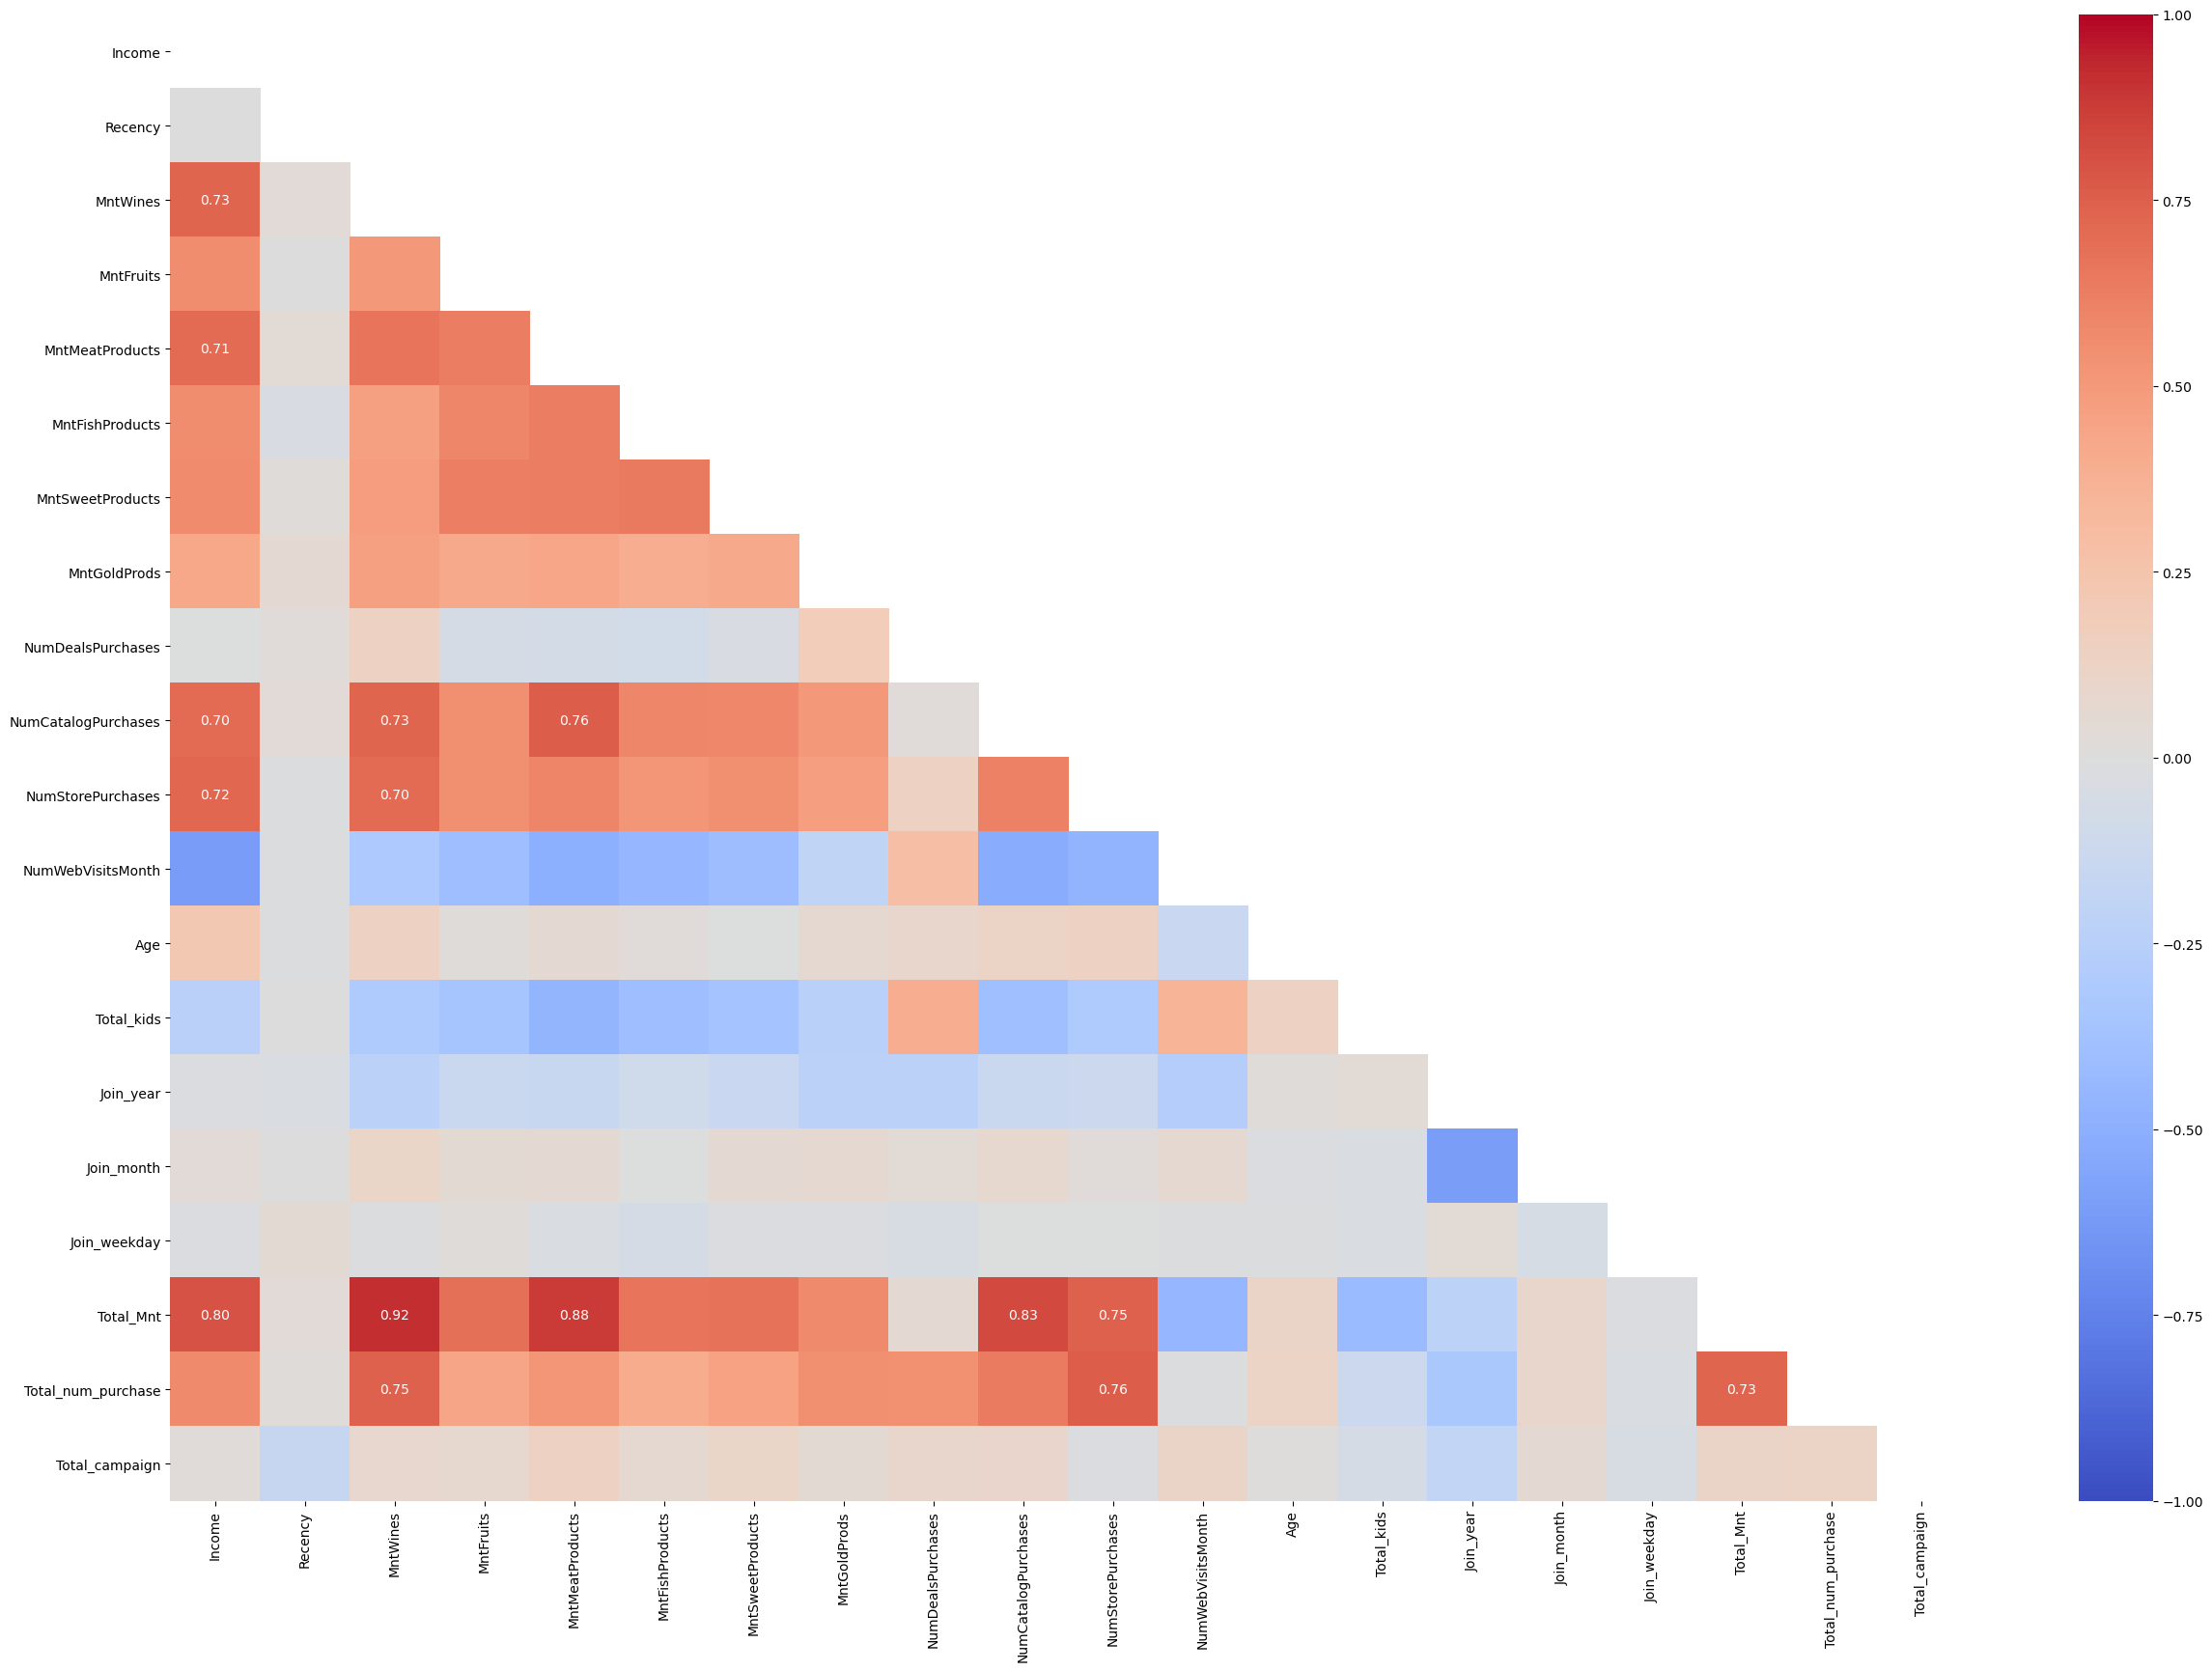

In [83]:
##finding multicollinearity
##Computing the correlation coefficient with NumWebPurchases

# set figure size
plt.figure(figsize=(30,20))

corr = df_model.drop('NumWebPurchases',axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

#### From the heatmap, we can identify strong relationships between:
- Income and Total_Mnt
- Income and NumCatalogPurchases
- Income and MntWines

- Total_Mnt and MntMeatProducts
- Total_Mnt and MntWines
- Total_Mnt and NumCatalogPurchases

- Total_num_purchase and NumStorePurchases

- Total_Campaign and Response

- MntMeatProducts and NumCatalogPurchases

In [84]:
## Computing VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df_model[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [85]:
# features to consider removing
considered_features = ['MntMeatProducts','NumCatalogPurchases','Total_Mnt',
                       'Income','MntWines','Total_num_purchase',
                       'NumStorePurchases']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable        VIF
2            Total_Mnt  49.019752
4             MntWines  17.017518
0      MntMeatProducts  11.712524
6    NumStorePurchases   3.486690
1  NumCatalogPurchases   3.446521
5   Total_num_purchase   3.335945
3               Income   3.269882

>- As shown in the table, ‘TotalMnt’, ‘MntWines’,and ‘MntMeatProducts’ all have VIF values exceeding 5.

>- Again, the rookie mistake would be to remove all features at once. Feature selection is usually best performed by including or removing one feature at a time. This ensures that any information loss is minimized.

>- After removing ‘TotalMnt’ (i.e. the feature with the highest VIF), we calculate the VIF values again.

In [86]:
# compute vif values after removing a feature
considered_features.remove('Total_Mnt')
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
3             MntWines  3.624288
5    NumStorePurchases  3.376006
1  NumCatalogPurchases  3.301267
4   Total_num_purchase  3.286617
2               Income  3.235453
0      MntMeatProducts  2.859119

In [87]:
# compute vif values after removing a feature
considered_features.remove('MntWines')
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
4    NumStorePurchases  3.373104
1  NumCatalogPurchases  3.165196
2               Income  2.957333
0      MntMeatProducts  2.821563
3   Total_num_purchase  2.731722

>- We achieved vif score less than 5 

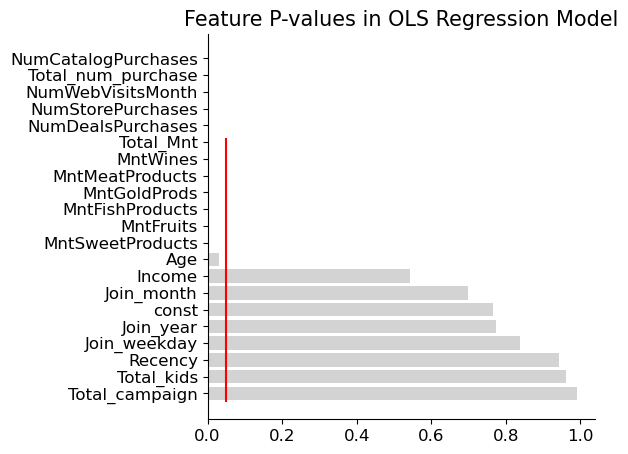

In [88]:
# Visualizing p_values 
p_values = pd.Series(model.pvalues).sort_values(ascending=False)

plt.figure(figsize=(5,5))
plt.barh(y=p_values.index, width=p_values, color='lightgrey',)
plt.vlines(x=0.05, ymin=-0.5, ymax=15.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in OLS Regression Model", size=15)
plt.yticks(size=12)
plt.xticks(size=12)

plt.show()

#### Insights
From our OLS regression model with all the features, the following are the significant features:
>- ['Join_weekday',
 'Join_year',
 'const',
 'MntSweetProducts',
 'MntFruits',
 'Income',
 'MntFishProducts',
 'MntGoldProds',
 'MntMeatProducts',
 'MntWines',
 'NumWebVisitsMonth',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'Total_Mnt',
 'Total_num_purchase']

In [89]:
# list p_value which having more than 0.05
pval = list(p_values[p_values>=0.05].index)
pval

['Total_campaign',
 'Total_kids',
 'Recency',
 'Join_weekday',
 'Join_year',
 'const',
 'Join_month',
 'Income']

In [92]:
# copy dataframe to prevent from lost
df_model1 = df_model.copy()

In [94]:
## Dropping feature which having pvalue having more than 0.05 
df_model1 = df_model1.drop(['Total_campaign','Total_num_purchase','Total_Mnt',
 'MntFishProducts',
 'Recency',
 'Join_weekday',
 'Join_month',
 'Age',
 'MntMeatProducts'],axis=1)

In [95]:
# Import Train-Test Split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# GEt X and Y form dataframe
X=df_model1.drop(['NumWebPurchases'],axis=1)  # Features
y=df_model1['NumWebPurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# 80% training and 20% test

In [96]:
X_train.shape

(1082, 11)

In [97]:
X_train.head()

Income  MntWines  MntFruits  MntSweetProducts  MntGoldProds  \
1615  44802.0       853         10                10            20   
1556  49154.0       206         10                27            71   
184   30467.0         1          3                 5             5   
1197  48195.0       106         27                 7             5   
1989  51876.0        99         27                48             6   

      NumDealsPurchases  NumCatalogPurchases  NumStorePurchases  \
1615                  2                    4                 12   
1556                  6                    1                  8   
184                   1                    0                  2   
1197                  6                    2                  5   
1989                  1                    2                  8   

      NumWebVisitsMonth  Total_kids  Join_year  
1615                  8           0       2012  
1556                  6           2       2013  
184                   7           1       2014  
1197                  6           2       2014  
1989                  1           0       2013

In [98]:
## Build Linear Model using statmodel
import statsmodels.api as sm

#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     235.5
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          1.23e-276
Time:                        11:00:17   Log-Likelihood:                -1852.0
No. Observations:                1082   AIC:                             3728.
Df Residuals:                    1070   BIC:                             3788.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -645.1337    

In [99]:
p_values = pd.Series(model.pvalues).sort_values(ascending=False)
print(p_values)
pval = list(p_values[p_values>=0.05].index)
pval

MntSweetProducts       2.381547e-02
MntFruits              2.329050e-02
NumCatalogPurchases    2.778972e-03
Join_year              6.859593e-06
const                  6.091808e-06
NumStorePurchases      1.067885e-06
MntGoldProds           4.691896e-09
Total_kids             1.695479e-09
MntWines               5.374682e-24
Income                 6.286479e-33
NumDealsPurchases      2.344081e-38
NumWebVisitsMonth      1.436008e-57
dtype: float64


[]

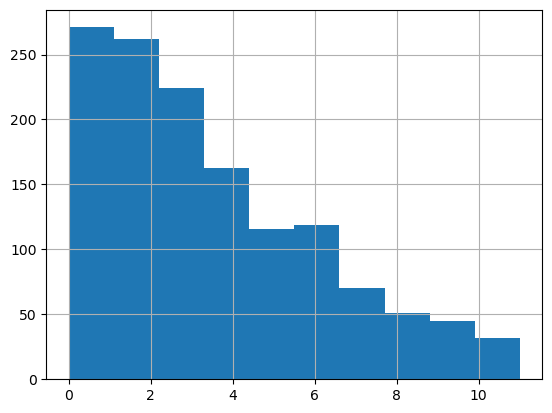

In [100]:
# check the distribution of target variable using hist()
df_model1.NumWebPurchases.hist()

# display the plot
plt.show()

In [103]:
from statsmodels.stats.stattools import jarque_bera
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(df_model1["NumWebPurchases"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

ValueError: too many values to unpack (expected 2)

In [105]:
# log transformation for normality using np.log()
df_model1['log_NumWebPurchases'] = np.log(df_model1['NumWebPurchases'])

# display first 5 rows of the data
df_model1.head()

Income  MntWines  MntFruits  MntSweetProducts  MntGoldProds  \
2  67267.0       134         11                 2            30   
3  32474.0        10          0                 0             0   
7  44931.0        78          0                 0             7   
8  65324.0       384          0                32             5   
9  65324.0       384          0                32             5   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2                  1                3                    2                  5   
3                  1                1                    0                  2   
7                  1                2                    1                  3   
8                  3                6                    2                  9   
9                  3                6                    2                  9   

   NumWebVisitsMonth  Total_kids  Join_year  log_NumWebPurchases  
2                  2           1       2014             1.098612  
3                  7           2       2014             0.000000  
7                  5           1       2014             0.693147  
8                  4           1       2014             1.791759  
9                  4           1       2014             1.791759

ValueError: supplied range of [-inf, 2.3978952727983707] is not finite

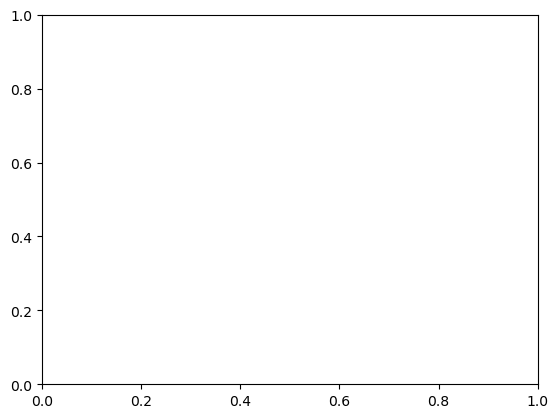

In [106]:
# recheck for normality 
# plot the histogram using hist
df_model1.log_NumWebPurchases.hist()

# display the plot
plt.show()

NumWebVisitsMonth    0.318243
NumDealsPurchases    0.236105
NumStorePurchases    0.158622
MntGoldProds         0.011836
MntSweetProducts     0.006099
dtype: float64


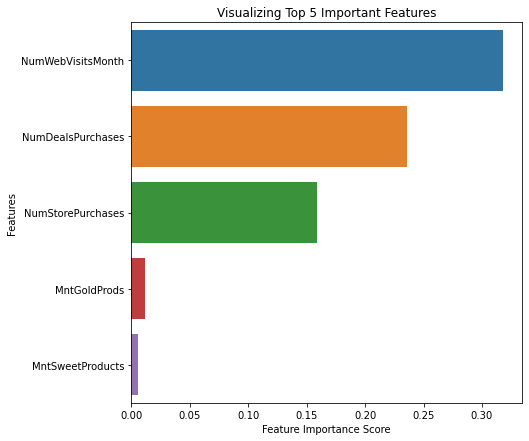

In [68]:
#Import Linear Regression Model
from sklearn.linear_model import LinearRegression

#Create a Linear Regression with 100 trees
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

#predict the model
y_pred=lr.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(lr.coef_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `NumWebVisitsMonth`, `NumDealsPurchases`, `NumStorePurchases`, `MntGoldProds`, and `MntSweetProducts` are important features.
>- Customer who made number of purchases through the company's web site visit maximum number on last month.
>- Customer spent least amount on Gold and Sweets when they purchase through company's website. 

MntWines             0.526318
NumWebVisitsMonth    0.135250
MntGoldProds         0.121279
MntMeatProducts      0.084824
Income               0.056503
dtype: float64


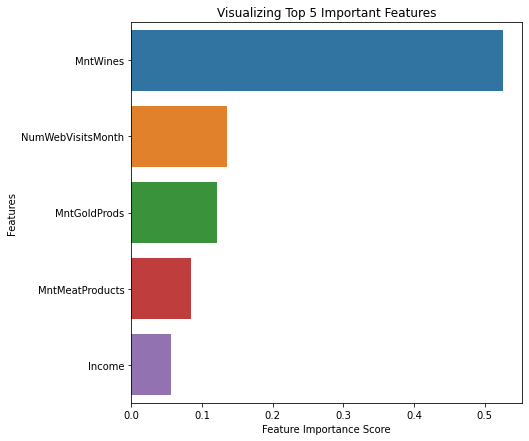

In [69]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor with 100 trees
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

# fit the model
rg.fit(X_train, y_train)

#predict the model
y_pred=rg.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `NumWebVisitsMonth`, `Income`, `MntWines`, `MntGoldProds`, and `MntMeatProducts` are important features.
>- Customer spent maximum amount on Wines when they purchase through company's website.

MntGoldProds         0.354533
MntWines             0.236996
NumWebVisitsMonth    0.110021
MntMeatProducts      0.096681
Income               0.078922
dtype: float64


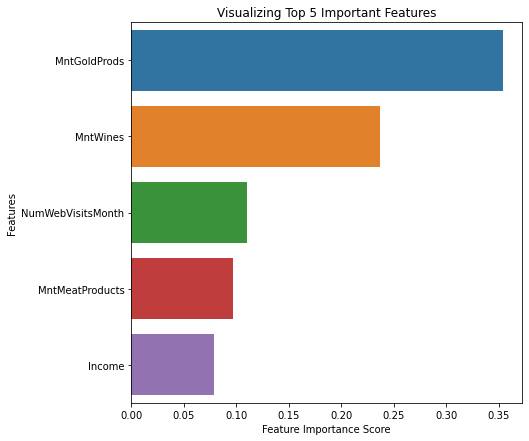

In [70]:
#Import Random Forest  AdaBoost Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Create a Random Forest Regressor with 100 trees as **base model for boosting 
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

#Create a AdaBoost Regressor 
ada = AdaBoostRegressor(base_estimator=rg)

# fit the model
ada.fit(X_train, y_train)

#predict the model
y_pred=ada.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(ada.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `NumWebVisitsMonth`, `Income`, `MntWines`, `MntGoldProds`, and `MntMeatProducts` are important features.
>- Customer spent maximum amount on Gold when they purchase through company's website.

MntWines             0.582551
MntGoldProds         0.145613
NumWebVisitsMonth    0.142356
MntMeatProducts      0.079116
Income               0.023928
dtype: float64


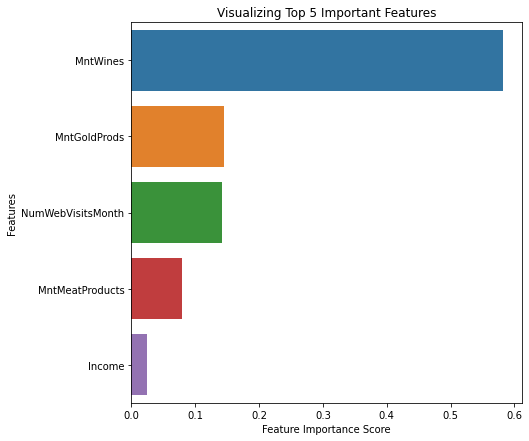

In [71]:
#Import Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

#Initialize parameters
params = {'n_estimators': 200,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#Create a gradient model
gbr = GradientBoostingRegressor(**params,random_state=42)

# fit the model
gbr.fit(X_train, y_train)

#predict the model
y_pred=gbr.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(gbr.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `NumWebVisitsMonth`, `Income`, `MntWines`, `MntGoldProds`, and `MntMeatProducts` are important features.
>- Customer spent maximum amount on Wines when they purchase through company's website.

# <font color='red'> 3)	What factors are significantly related to the number of store purchases?</font>

    a.	Build a ML model that will predict the number of store purchases

    b.	Come up with insights based on the model. Build various regression models


- **As per data information, we know that NumStorePurchase is continuous, apply regression to build models.**

In [72]:
# Import Train-Test Split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Get X and y features for building model
X=df_model.drop(columns=['NumStorePurchases','Total_Mnt','Total_num_purchase'],axis=1)  # Features
y=df_model['NumStorePurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# 80% training and 20% test
X_train.shape,y_train.shape

((1783, 25), (1783,))

In [73]:
## Build Linear Model using statmodel
import statsmodels.api as sm
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     118.0
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:09:45   Log-Likelihood:                -3774.6
No. Observations:                1783   AIC:                             7599.
Df Residuals:                    1758   BIC:                             7736.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 687.5032    

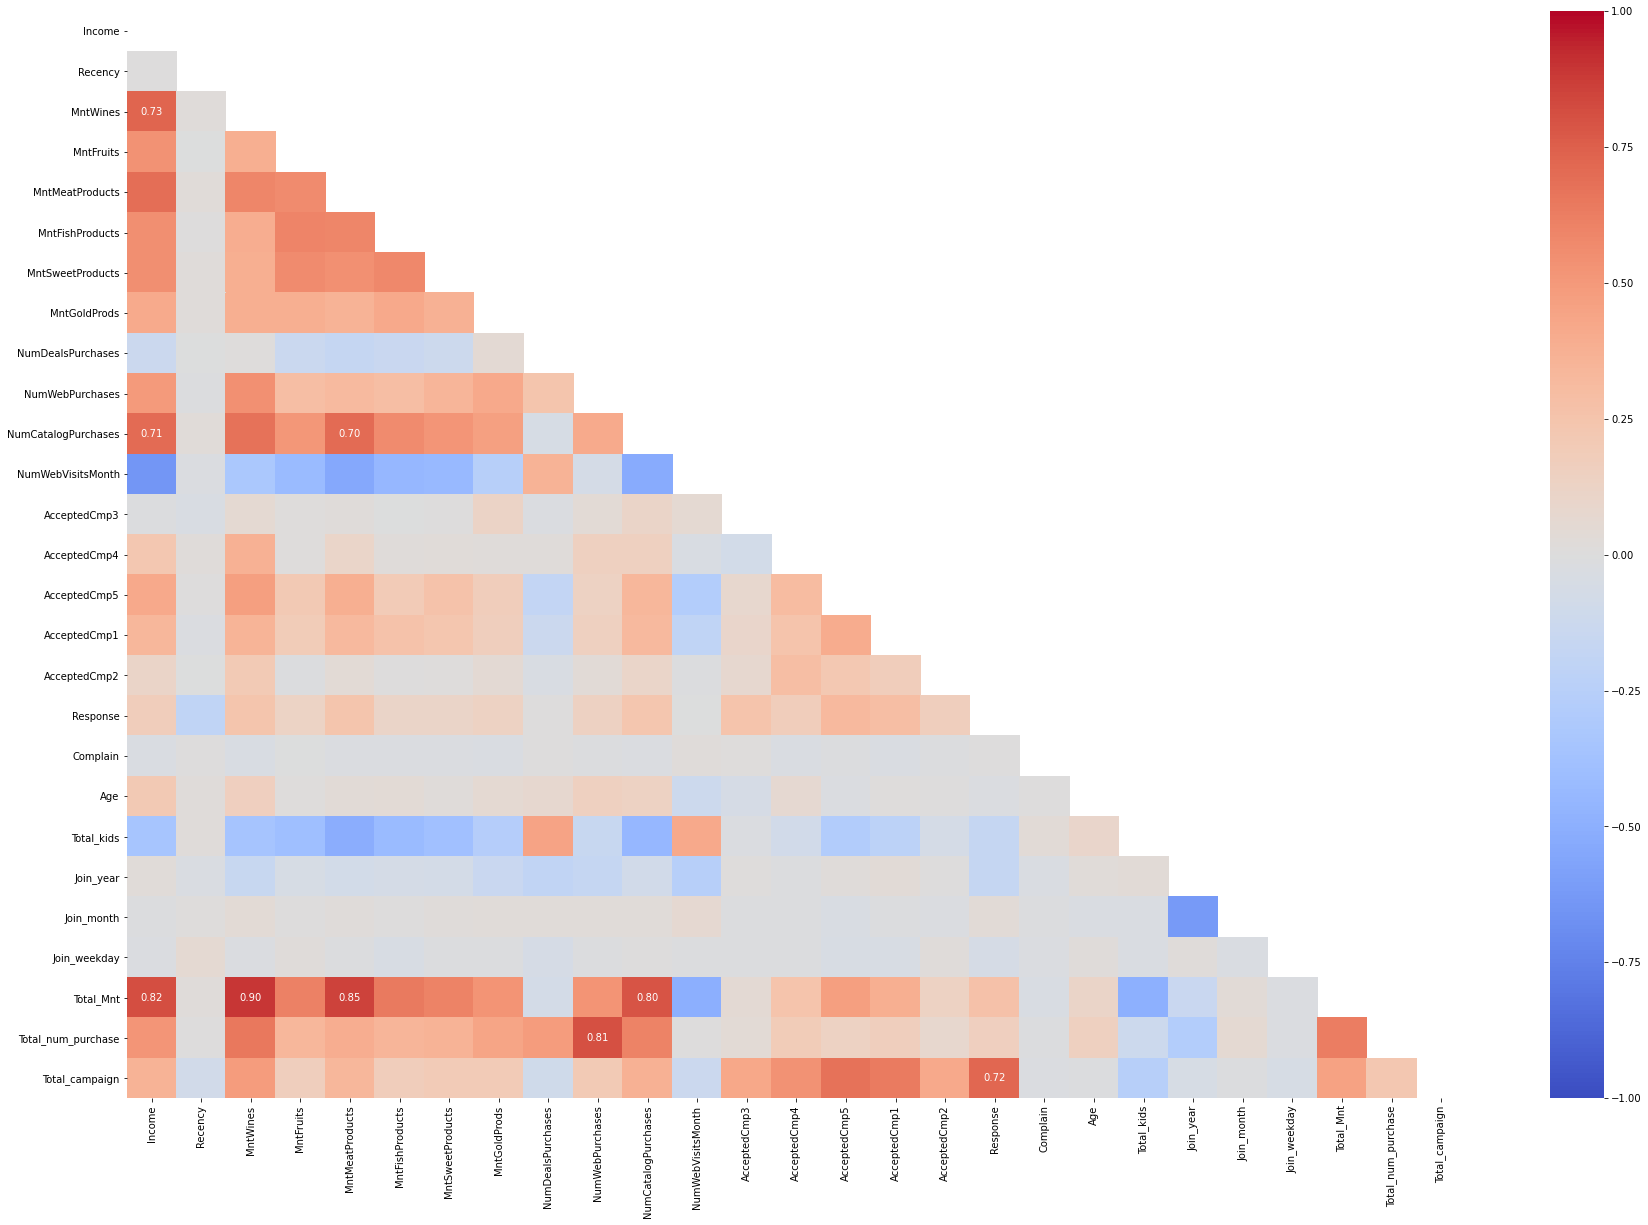

In [74]:
##finding multicollinearity
##Computing the correlation coefficient with NumWebPurchases

# set figure size
plt.figure(figsize=(30,20))

corr = df_model.drop('NumStorePurchases',axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

#### From the heatmap, we can identify strong relationships between:
- MntMeatProducts and NumCatalogPurchases

- Income and NumCatalogPurchases
- Income and MntWines

- Total_Mnt and Income
- Total_Mnt and MntMeatProducts
- Total_Mnt and MntWines
- Total_Mnt and NumCatalogPurchases

- Total_num_purchase and NumWebPurchases

- Total_Campaign and Response

In [75]:
## Computing VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df_model[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [76]:
# features to consider removing
considered_features = ['MntMeatProducts','NumCatalogPurchases','Total_Mnt','MntWines','Income',
                       'Total_num_purchase','NumWebPurchases','Total_campaign','Response']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable        VIF
2            Total_Mnt  38.052195
3             MntWines  13.633796
0      MntMeatProducts   9.802142
5   Total_num_purchase   4.431721
1  NumCatalogPurchases   3.441612
4               Income   3.345350
6      NumWebPurchases   3.343955
7       Total_campaign   2.808280
8             Response   2.265496

>- As shown in the table, ‘TotalMnt’, ‘MntWines’,and ‘MntMeatProducts’ all have VIF values exceeding 5.

>- Again, the rookie mistake would be to remove all features at once. Feature selection is usually best performed by including or removing one feature at a time. This ensures that any information loss is minimized.

>- After removing ‘TotalMnt’ (i.e. the feature with the highest VIF), we calculate the VIF values again.

In [77]:
# compute vif values after removing a feature
considered_features.remove('Total_Mnt')
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
4   Total_num_purchase  4.430794
2             MntWines  3.312313
5      NumWebPurchases  3.284073
1  NumCatalogPurchases  3.236980
3               Income  3.185937
6       Total_campaign  2.805678
0      MntMeatProducts  2.437968
7             Response  2.265487

>- We achieved vif score less than 5 

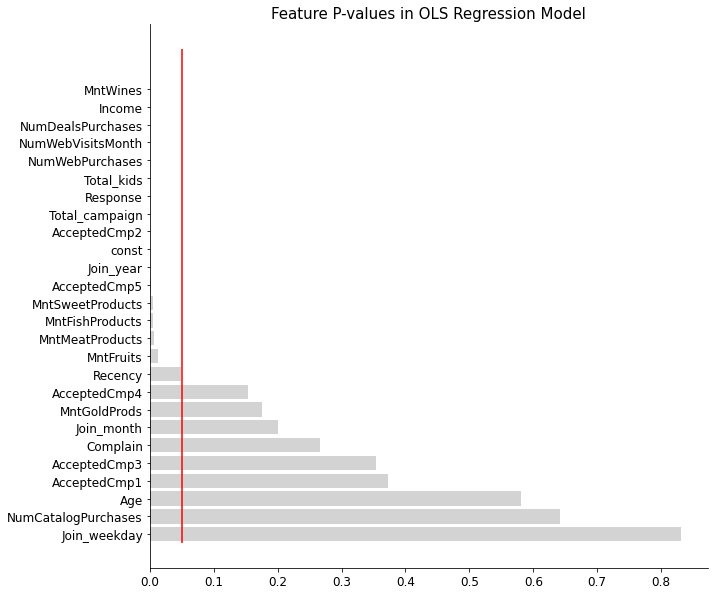

In [78]:
p_values = pd.Series(model.pvalues).sort_values(ascending=False)

plt.figure(figsize=(10,10))
plt.barh(y=p_values.index, width=p_values, color='lightgrey',)
plt.vlines(x=0.05, ymin=-0.5, ymax=27.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in OLS Regression Model", size=15)
plt.yticks(size=12)
plt.xticks(size=12)


plt.show()

#### Insights
From our OLS regression model with all the features, the following are the significant features:
>- 'Join_year',
 'const',
 'Income',
 'Total_num_purchase',
 'Total_Mnt',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'MntMeatProducts'

In [79]:
pval = list(p_values[p_values>=0.05].index)
pval

['Join_weekday',
 'NumCatalogPurchases',
 'Age',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Complain',
 'Join_month',
 'MntGoldProds',
 'AcceptedCmp4']

In [80]:
df_model2 = df_model.copy()

In [81]:
## Dropping feature which having pvalue having more than 0.05 
df_model2 = df_model2.drop(['Join_weekday',
 'NumCatalogPurchases',
 'Age',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Complain',
 'Join_month',
 'MntGoldProds',
 'AcceptedCmp4'],axis=1)

In [82]:
# Import Train-Test Split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# droping insignificant variable having more than p-values
X=df_model2.drop(['NumStorePurchases','Total_Mnt','Total_num_purchase'],axis=1)  # Features
y=df_model2['NumStorePurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# 80% training and 20% test

In [83]:
## Build Linear Model using statmodel
import statsmodels.api as sm
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     176.1
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:09:47   Log-Likelihood:                -3779.8
No. Observations:                1783   AIC:                             7594.
Df Residuals:                    1766   BIC:                             7687.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               511.2990    156.37

AcceptedCmp2         1.501646
NumDealsPurchases    0.300163
NumWebPurchases      0.142509
MntSweetProducts     0.004256
MntFruits            0.003901
dtype: float64


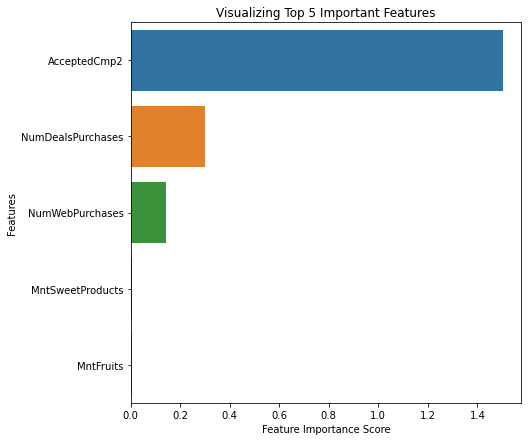

In [84]:
#Import Linear Regression Model
from sklearn.linear_model import LinearRegression

#Create a Linear Regression with 100 trees
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

#predict the model
y_pred=lr.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(lr.coef_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `AcceptedCmp2`, `NumDealsPurchases`, `NumWebPurchases`, `MntSweetProducts`, `MntFruits` are important features.
>- Customer accepted offer in campaign 2nd when made purchases through store direclty.

MntWines            0.610104
MntMeatProducts     0.102779
Income              0.056946
MntFruits           0.037660
MntSweetProducts    0.036874
dtype: float64


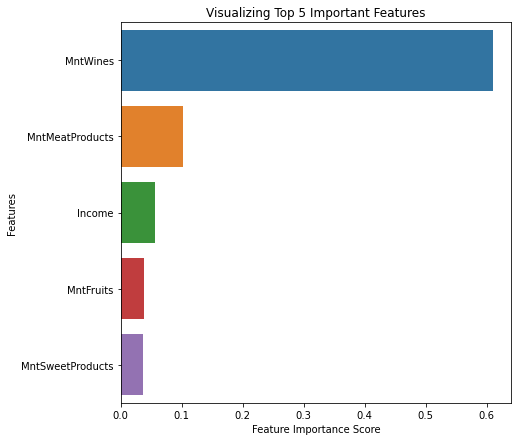

In [85]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor with 100 trees
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

# fit the model
rg.fit(X_train, y_train)

#predict the model
y_pred=rg.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>-`Income`, `MntMeatProducts`, `MntWines`, `MntSweetProducts`, and `MntFruits` are important features.
 
>- Customer spent amount on Wines when they purchasing through store directly.
>- Few customer spent amount on sweets prroducts when they purchase through store directly .

MntWines           0.257523
MntMeatProducts    0.144503
Income             0.118821
Recency            0.079260
MntFruits          0.078757
dtype: float64


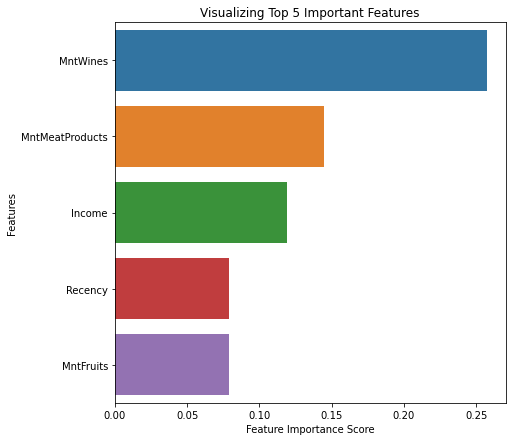

In [86]:
#Import Random Forest  AdaBoost Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Create a Random Forest Regressor with 100 trees as **base model for boosting 
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

#Create a AdaBoost Regressor 
ada = AdaBoostRegressor(base_estimator=rg)

# fit the model
ada.fit(X_train, y_train)

#predict the model
y_pred=ada.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(ada.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>-`Income`, `MntMeatProducts`, `MntWines`, `Recency`, and `MntFruits` are important features.

>- Customer spent amount on wines when they purchasing through store directly.
>- Few customer spent amount on fruit products when they purchase through store directly. 

MntWines           0.770262
MntMeatProducts    0.115297
Income             0.025977
MntFruits          0.017281
Response           0.016935
dtype: float64


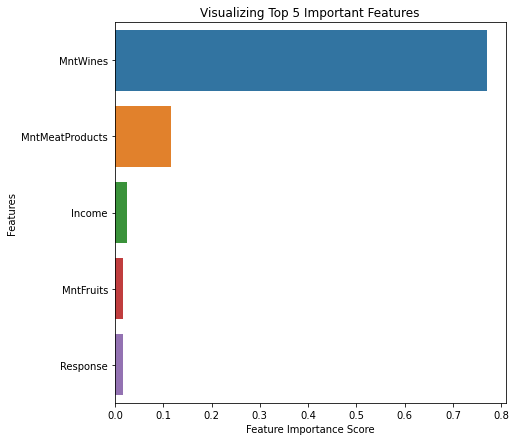

In [87]:
#Import Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

#Initialize parameters
params = {'n_estimators': 200,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#Create a gradient model
gbr = GradientBoostingRegressor(**params,random_state=42)

# fit the model
gbr.fit(X_train, y_train)

#predict the model
y_pred=gbr.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(gbr.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>-`Income`, `MntMeatProducts`, `MntWines`, `Response`, and `MntFruits` are important features.
>- Customer spent amount on Wines when they purchasing through store directly.
>- Less than 1% customer got response on purchase through store directly.

## <font color='Red'>4) What factors are significantly related to the number of catalogue purchases?</font>
    a.	Build a ML model that will predict the number of catalogue purchases
    b.	Come up with insights based on the model. Build various regression models


- **As per data information, we know that NumCatalogPurchase is continuous, apply regression to build models.**

In [88]:
# droping sum of product, campaign, purchase and Country

# Import Train-Test Split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Get X and y features for building model
X=df_model.drop(columns=['NumCatalogPurchases','Total_Mnt','Total_num_purchase'],axis=1)  # Features
y=df_model['NumCatalogPurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# 80% training and 20% test
X_train.shape,y_train.shape

((1783, 25), (1783,))

In [89]:
## Build Linear Model using statmodel
import statsmodels.api as sm
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     NumCatalogPurchases   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.688
Method:                  Least Squares   F-statistic:                     164.7
Date:                 Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                         09:10:19   Log-Likelihood:                -3331.8
No. Observations:                 1783   AIC:                             6714.
Df Residuals:                     1758   BIC:                             6851.
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               235.7503

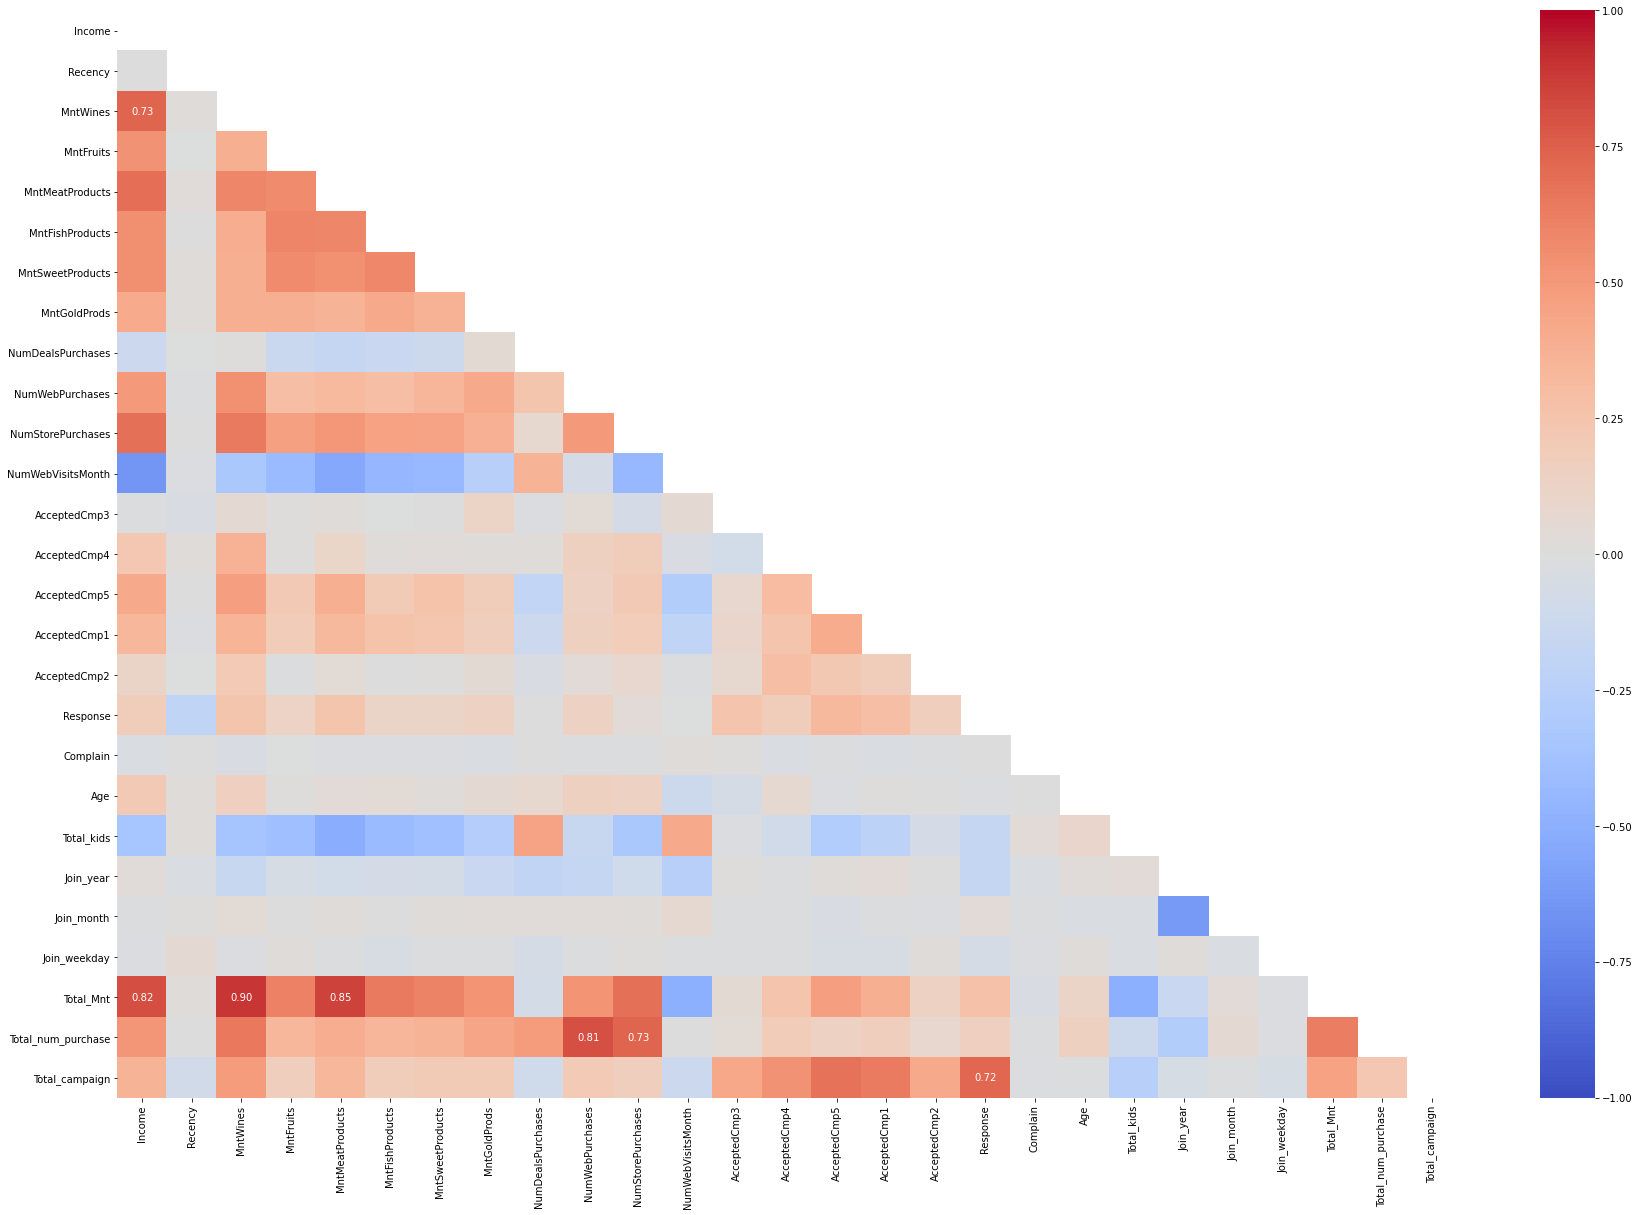

In [90]:
##finding multicollinearity
##Computing the correlation coefficient with NumWebPurchases

# set figure size
plt.figure(figsize=(30,20))

corr = df_model.drop('NumCatalogPurchases',axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

#### From the heatmap, we can identify strong relationships between:
- Total_Mnt and Income
- Total_Mnt and MntMeatProducts
- Total_Mnt and MntWines
- Total_num_purchase and NumWebPurchases
- Total_num_purchase and NumStorePurchases
- Total_Campaign and Response
- Income and MntWines

In [91]:
## Computing VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df_model[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [92]:
# features to consider removing
considered_features = ['MntMeatProducts','NumStorePurchases','Total_Mnt','MntWines','Income',
                       'Total_num_purchase','NumWebPurchases','Total_campaign','Response']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable        VIF
2           Total_Mnt  36.264344
3            MntWines  13.281815
0     MntMeatProducts   9.875361
5  Total_num_purchase   5.737236
4              Income   3.812744
1   NumStorePurchases   3.582464
6     NumWebPurchases   3.487636
7      Total_campaign   2.810115
8            Response   2.289623

>- As shown in the table, ‘TotalMnt’, ‘MntWines’,and ‘MntMeatProducts’ all have VIF values exceeding 5.

>- Again, the rookie mistake would be to remove all features at once. Feature selection is usually best performed by including or removing one feature at a time. This ensures that any information loss is minimized.

>- After removing ‘TotalMnt’ (i.e. the feature with the highest VIF), we calculate the VIF values again.

In [93]:
# compute vif values after removing a feature
considered_features.remove('Total_Mnt')
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
4  Total_num_purchase  5.730541
3              Income  3.639471
1   NumStorePurchases  3.535573
5     NumWebPurchases  3.452218
2            MntWines  3.302118
6      Total_campaign  2.810054
7            Response  2.289162
0     MntMeatProducts  2.068542

>- After removing ‘Total_num_purchase’ (i.e. the feature with the highest VIF), we calculate the VIF values again.

In [94]:
# compute vif values after removing a feature
considered_features.remove('Total_num_purchase')
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
3             Income  3.270345
2           MntWines  3.060973
5     Total_campaign  2.800979
6           Response  2.255182
1  NumStorePurchases  2.243605
0    MntMeatProducts  2.065272
4    NumWebPurchases  1.553647

>- we achieved less than 5 

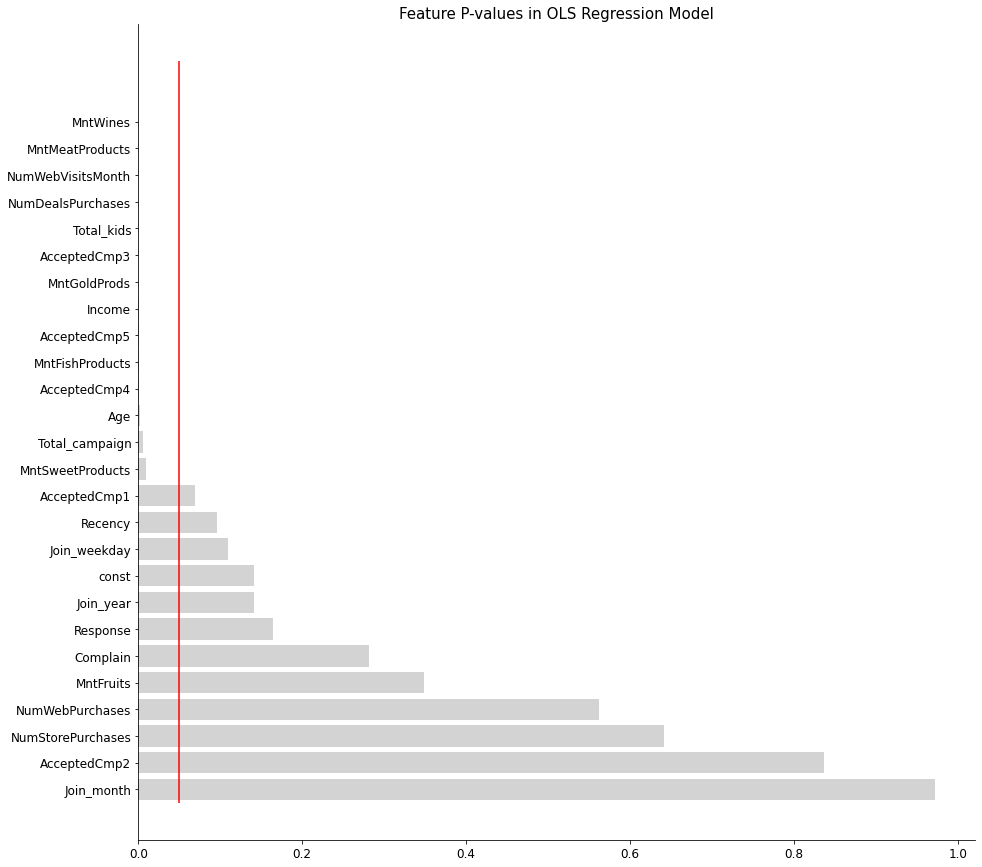

In [95]:
p_values = pd.Series(model.pvalues).sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.barh(y=p_values.index, width=p_values, color='lightgrey',)
plt.vlines(x=0.05, ymin=-0.5, ymax=27.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in OLS Regression Model", size=15)
plt.yticks(size=12)
plt.xticks(size=12)


plt.show()

#### Insights
From our OLS regression model with all the features, the following are the significant features:

>- 'MntFruits',
>-'MntSweetProducts',
>- 'MntFishProducts',
>- 'MntMeatProducts',
>- 'NumStorePurchases',
>- 'MntWines',
>- 'MntGoldProds',
>- 'NumDealsPurchases',
>- 'NumWebVisitsMonth',
>- 'Total_Mnt',
>- 'Total_num_purchase',
>- 'NumWebPurchases'

In [96]:
pval = list(p_values[p_values>=0.05].index)
pval

['Join_month',
 'AcceptedCmp2',
 'NumStorePurchases',
 'NumWebPurchases',
 'MntFruits',
 'Complain',
 'Response',
 'Join_year',
 'const',
 'Join_weekday',
 'Recency',
 'AcceptedCmp1']

In [97]:
df_model3 = df_model.copy()

In [98]:
## Dropping feature which having pvalue having more than 0.05 
df_model3 = df_model3.drop(['Join_month',
 'AcceptedCmp2',
 'NumStorePurchases',
 'NumWebPurchases',
 'MntFruits',
 'Complain',
 'Response',
 'Join_year',
 'Join_weekday',
 'Recency',
 'AcceptedCmp1'],axis=1)

In [99]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# droping insignificant variable having more than p-values
X=df_model3.drop(['NumCatalogPurchases','Total_Mnt','Total_num_purchase'],axis=1)  # Features
y=df_model3['NumCatalogPurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# 80% training and 20% test

In [100]:
## Build Linear Model using statmodel
import statsmodels.api as sm
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     NumCatalogPurchases   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.688
Method:                  Least Squares   F-statistic:                     281.1
Date:                 Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                         09:10:22   Log-Likelihood:                -3338.2
No. Observations:                 1783   AIC:                             6706.
Df Residuals:                     1768   BIC:                             6789.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6512

AcceptedCmp3         0.536457
Total_campaign       0.363564
NumDealsPurchases    0.169398
Age                  0.010362
MntGoldProds         0.004435
dtype: float64


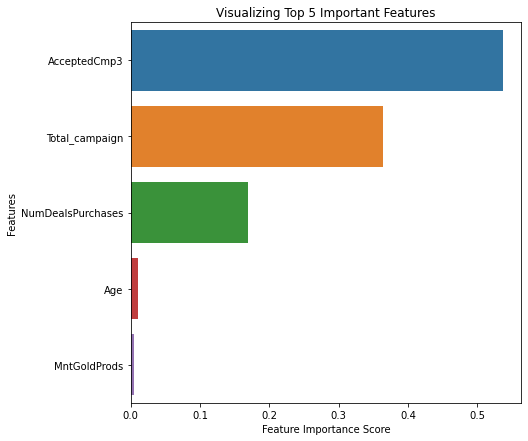

In [101]:
#Import Linear Regression Model
from sklearn.linear_model import LinearRegression

#Create a Linear Regression with 100 trees
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

#predict the model
y_pred=lr.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(lr.coef_, 
        index = list(X.columns)).sort_values(ascending=False)
# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `AcceptedCmp3`, `Total_campaign`, `NumDealsPurchases`, `Age`, and `MntGoldProds` are important features.

>- Customer accepted offer in Campaign 3rd when made purchase through using catalog.
>- Less than 1% customer spent on Gold products when they purchase through using catalog. 

MntMeatProducts    0.564262
MntWines           0.142764
Income             0.094405
MntGoldProds       0.044702
MntFishProducts    0.033224
dtype: float64


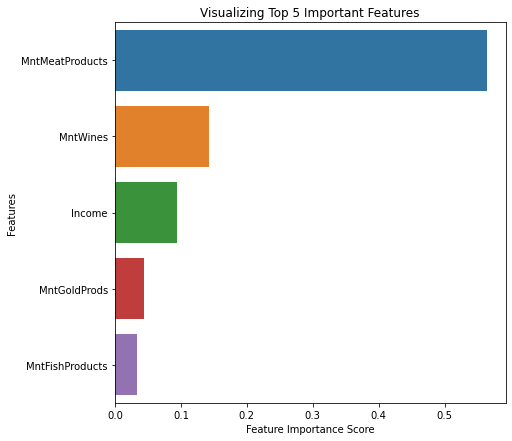

In [102]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor with 100 trees
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

# fit the model
rg.fit(X_train, y_train)

#predict the model
y_pred=rg.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `MntMeatProducts`, `MntWines`, `Income`, `MntFishProducts`, and `MntGoldProds` are important features.

>- Customer mostly spent amount Meat while purchasing through catalog.
>- Approx 3% customer purchasing fish products using catalog.

MntMeatProducts     0.432963
Income              0.145559
MntWines            0.125352
MntGoldProds        0.063977
MntSweetProducts    0.049617
dtype: float64


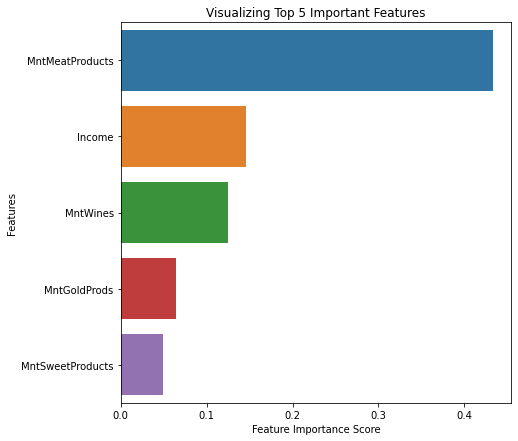

In [103]:
#Import Random Forest  AdaBoost Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Create a Random Forest Regressor with 100 trees as **base model for boosting 
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

#Create a AdaBoost Regressor 
ada = AdaBoostRegressor(base_estimator=rg)

# fit the model
ada.fit(X_train, y_train)

#predict the model
y_pred=ada.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(ada.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `MntMeatProducts`, `MntWines`, `Income`, `MntSweetProducts`, and `MntGoldProds` are important features.

>- Most of Customer spent amount on Meat Products and other products through purchase using catalog.
>- Few Customer spent amount on Sweet products when they purchase through Catalog.

MntMeatProducts    0.624186
MntWines           0.131595
Income             0.097375
MntGoldProds       0.032366
MntFishProducts    0.026912
dtype: float64


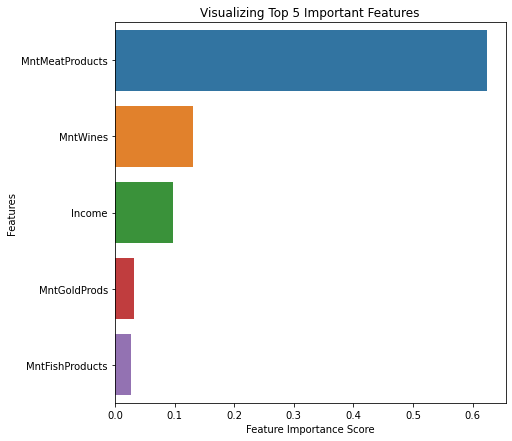

In [104]:
#Import Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

#Initialize parameters
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#Create a gradient model
gbr = GradientBoostingRegressor(**params,random_state=42)

# fit the model
gbr.fit(X_train, y_train)

#predict the model
y_pred=gbr.predict(X_test)

# Summarize feature importance scores
feature_imp = pd.Series(gbr.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- `MntMeatProducts`, `MntWines`, `Income`, `MntFishProducts`, and `MntGoldProds` are important features.

>- Most of Customer spent amount on Meat products while purchasing through catalog.
>- Less than 3% Customer spent amount on Fish products when they purchase through catalog.

## Visualization based on Information

### Create table for each section of data

In [105]:
# Store customer's information
Customers = df.loc[:,:'Recency'].join(df[['Country']])  

# Store product's information
Products = df.loc[:,'MntWines':'MntGoldProds']     

# Store Purchases' information
Purchases = df.loc[:,'NumDealsPurchases':'NumWebVisitsMonth']    

# Store campaign's information
Campaigns = df.loc[:,'AcceptedCmp3':'AcceptedCmp2']   

Misc = df.loc[:,['Response','Complain']]

### Create table for each type of data

In [106]:
category = df.select_dtypes(include='object')
numeric = df.select_dtypes(exclude='object')

In [107]:
numeric.head()

ID   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0   1826  84835.0        0         0  2014-06-16        0       189   
1      1  57091.0        0         0  2014-06-15        0       464   
2  10476  67267.0        0         1  2014-05-13        0       134   
3   1386  32474.0        1         1  2014-05-11        0        10   
4   5371  21474.0        1         0  2014-04-08        0         6   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0        104              379              111  ...                  6   
1          5               64                7  ...                  7   
2         11               59               15  ...                  5   
3          0                1                0  ...                  2   
4         16               24               11  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Age  
0             0         1         0   52  
1             1         1         0   61  
2             0         0         0   64  
3             0         0         0   55  
4             0         1         0   33  

[5 rows x 25 columns]

In [108]:
# How long the person has been a customer in days
numeric['Customer_duration_days'] = datetime.datetime.now() - numeric['Dt_Customer']
numeric['Customer_duration_days'] = numeric['Customer_duration_days'].apply(lambda x: x.days)

In [109]:
#drop Dt_Customer
numeric = numeric.drop(['Dt_Customer'],axis=1)

In [110]:
numeric.head()

ID   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0   1826  84835.0        0         0        0       189        104   
1      1  57091.0        0         0        0       464          5   
2  10476  67267.0        0         1        0       134         11   
3   1386  32474.0        1         1        0        10          0   
4   5371  21474.0        1         0        0         6         16   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebVisitsMonth  \
0              379              111               189  ...                  1   
1               64                7                 0  ...                  5   
2               59               15                 2  ...                  2   
3                1                0                 0  ...                  7   
4               24               11                 0  ...                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Age  Customer_duration_days  
0         1         0   52                    2930  
1         1         0   61                    2931  
2         0         0   64                    2964  
3         0         0   55                    2966  
4         1         0   33                    2999  

[5 rows x 25 columns]

In [111]:
category.head()

Education Marital_Status    Country
0  Graduation       Divorced      Spain
1  Graduation         Single     Canada
2  Graduation        Married        USA
3  Graduation       Together  Australia
4  Graduation         Single      Spain

## Campaign
- We wanted to know the performance of each campaign we conducted. Below, the bar graph and pie-chart show the number of acceptance and success rates in each campaign.
- We see that camapign2 might have some problems because it's very less accepted while other campaigns are accepted at a similar rate.

In [112]:
each_campaign = np.sum(Campaigns,axis=0)

In [113]:
each_campaign

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    162
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

In [114]:
CR_each_campaign = each_campaign/len(Campaigns)*100

In [115]:
CR_each_campaign

AcceptedCmp3    7.312696
AcceptedCmp4    7.492149
AcceptedCmp5    7.267833
AcceptedCmp1    6.460296
AcceptedCmp2    1.345895
dtype: float64

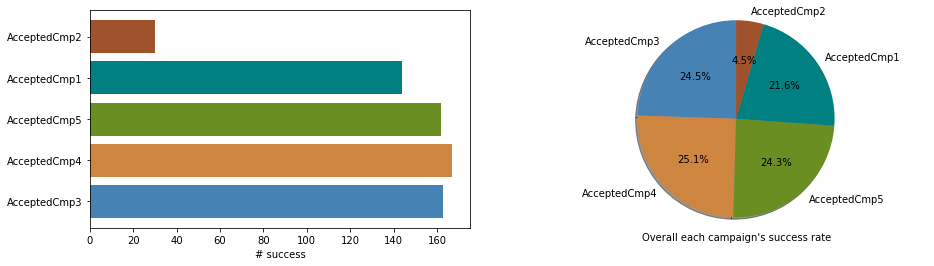

In [116]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,4)

cam_color = ['steelblue','peru','olivedrab','teal','sienna']

ax[0].barh(y=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'], 
           width=each_campaign.values, color=cam_color)
ax[0].set_xlabel('# success')

ax[1].pie(x=CR_each_campaign, labels=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'],
         autopct='%1.1f%%', shadow=True, startangle=90, colors=cam_color)
ax[1].axis('equal')
ax[1].set_xlabel('Overall each campaign\'s success rate')

plt.show()


>- **Next, we'll see if there's that effect in different countries. The table below shows the overall conversion rate in each country.**

In [117]:
Campaigns_category = Campaigns.join(category)
Campaigns_category['Total accept'] = np.sum(Campaigns, axis=1)

summary_country = pd.pivot_table(Campaigns_category, 
                                   values='Total accept', 
                                   index='Country', 
                                   aggfunc={'Total accept':['sum','count']})

summary_country['CR'] = summary_country['sum']/summary_country['count']
summary_country.rename(columns={'count':'#customers', 'sum':'Total accept'}).style.background_gradient(sns.light_palette('khaki', as_cmap=True), 
                                                                                                       subset=pd.IndexSlice[:, ['CR']])

- The overall conversion rate is around **30%**.
- We see that 'Mexico' has the best conversion rate but there is only 3 observation in this country. So, it's not significant.
- Other than 'Mexico', campaigns in 'Spain' and 'Canada' get the best conversion rate(**32.4%**).
- The worst rate is in 'Australia' which is **21.8%**.

# <font color='red'>5) Which marketing campaign was the most successful?</font>


AcceptedCmp4 is most successful campaign.

# <font color='red'>6) Which marketing campaign was the least successful?</font>


AcceptedCmp2 is least successful campaign.

# <font color='red'>7) Did the Marketing campaign drive store visits?</font>


We need to convert NumStorePurchases and NumWebPurchases Continuous columns to Categorical columns.
We will use `Pandas cut function` or`pd.cut()` function is a great way to transform continuous data into categorical data.

In [118]:
ns = numeric.copy()

## The pd.cut function has 3 main essential parts,
>- `**bins**` which represent cut off points of bins for the continuous data.
>- `**labels**` which represent label of bins. The key here is that your labels will always be one less than to the number of bins.
>- `**column**` on which we apply categorical.

### for NumStorePurchases Data

In [119]:
ns['NumStorePurchases'].describe()

count    2229.000000
mean        5.812472
std         3.242144
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

<AxesSubplot:xlabel='NumStorePurchases'>

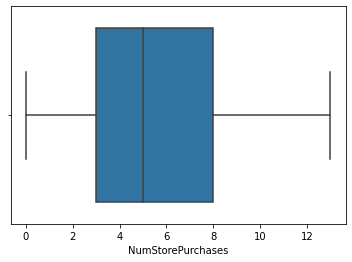

In [120]:
sns.boxplot(ns['NumStorePurchases'])

In [121]:
ns['NumStorePurchases'].value_counts()

3     489
4     322
2     221
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      11
1       4
Name: NumStorePurchases, dtype: int64

### Based on summary of NumStorePurchases, we will decide to prepare bins as [0-3,3-5,5-8,8-13]

In [122]:
bins=[-1,3,5,8,13]
labels=['No Purchases','Low Purchases','Medium Purchases','High Purchases']
store_category = pd.cut(ns['NumStorePurchases'],bins=bins,
                        labels=labels)
ns.insert(16,'Store_Group',store_category)

In [123]:
store_category.isnull().sum()

0

In [124]:
Campaigns_Store_Visits = Campaigns.join(ns['Store_Group'])
Campaigns_Store_Visits['Total accept'] = np.sum(Campaigns, axis=1)

summary_store = pd.pivot_table(Campaigns_Store_Visits, 
                                   values='Total accept', 
                                   index='Store_Group', 
                                   aggfunc={'Total accept':['sum','count']})

In [125]:
summary_store

count  sum
Store_Group                 
No Purchases        725   79
Low Purchases       534  129
Medium Purchases    470  216
High Purchases      500  242

In [126]:
Campaigns_Store_Visits.head()

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

        Store_Group  Total accept  
0  Medium Purchases             0  
1  Medium Purchases             1  
2     Low Purchases             0  
3      No Purchases             0  
4      No Purchases             1

In [127]:
Campaigns_Store_Visits.set_index(['Store_Group','Total accept'])
Campaigns_Store_Visits.columns.name='Found'

In [128]:
Campaigns_Store_Visits

Found  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                 0             0             0             0             0   
1                 0             0             0             0             1   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 1             0             0             0             0   
...             ...           ...           ...           ...           ...   
2235              0             0             0             0             0   
2236              0             0             0             0             0   
2237              0             0             0             0             0   
2238              0             0             0             0             0   
2239              0             1             1             0             0   

Found       Store_Group  Total accept  
0      Medium Purchases             0  
1      Medium Purchases             1  
2         Low Purchases             0  
3          No Purchases             0  
4          No Purchases             1  
...                 ...           ...  
2235     High Purchases             0  
2236       No Purchases             0  
2237      Low Purchases             0  
2238     High Purchases             0  
2239      Low Purchases             2  

[2229 rows x 7 columns]

In [129]:
subtotals = Campaigns_Store_Visits.groupby('Store_Group').mean()
label_order = ['{}{}'.format(pre,label) for label in subtotals.index for pre in ['', 'Total_']]
subtotals.index = ['Total_{}'.format(label) for label in subtotals.index]

In [130]:
subtotals.style.background_gradient(sns.light_palette('khaki', as_cmap=True))

>- 48% of total_high puchase was accepted the offer in the overall campaign when purchase directly from store.

# <font color='red'>8) Did the Marketing campaign drive web visits?</font>


### for NumWebPurchases Data

In [131]:
nw = numeric.copy()

In [132]:
nw['NumWebPurchases'].describe()

count    2229.000000
mean        4.100045
std         2.775461
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

<AxesSubplot:xlabel='NumWebPurchases'>

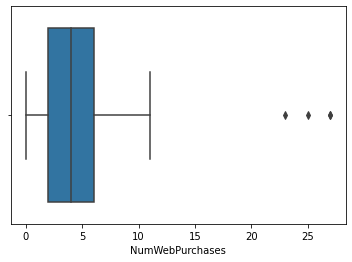

In [133]:
## Lets see the box plot for outlier
sns.boxplot(nw['NumWebPurchases'])

In [134]:
## Lets write the outlier function that will return us the lowerbound and upperbound values.
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [135]:
## Using the Outlier function, lets get the lowerbound and upperbound values for Age
lowerbound,upperbound = outlier_treatment(nw.NumWebPurchases)
print(lowerbound,upperbound)

-4.0 12.0


In [136]:
## Lets check which column is considered as an outlier
nw[(nw.NumWebPurchases < lowerbound) | (nw.NumWebPurchases > upperbound)]

ID         Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
14    10311    4428.000000        0         1        0        16          4   
210    4619  113734.000000        0         0        9         6          2   
449    5255   52247.251354        1         0       19         5          1   
2063   6237    7144.000000        0         2       92        81          4   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
14                 12                2                 4  ...   
210                 3                1               262  ...   
449                 3                3               263  ...   
2063               33                5                 2  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
14                    1             0             0             0   
210                   1             0             0             0   
449                   1             0             0             0   
2063                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Age  \
14               0             0         0         0   53   
210              0             0         0         0   77   
449              0             0         0         0   36   
2063             0             0         0         0   56   

      Customer_duration_days  
14                      3184  
210                     2949  
449                     3411  
2063                    3121  

[4 rows x 25 columns]

In [137]:
## Now lets remove the outliers from the dataset.
nw.drop(nw[ (nw.NumWebPurchases > upperbound) | (nw.NumWebPurchases < lowerbound) ].index , inplace=True)

<AxesSubplot:xlabel='NumWebPurchases'>

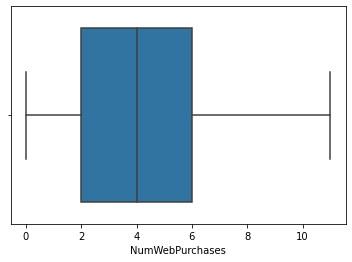

In [138]:
## Lets see the box plot after outlier removal
sns.boxplot(nw['NumWebPurchases'])

In [139]:
## Lets check for summary 
nw['NumWebPurchases'].describe()

count    2225.000000
mean        4.061573
std         2.624299
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
Name: NumWebPurchases, dtype: float64

### Based on summary of NumWebPurchases, we will decide to prepare bins as [0-2,2-4,4-6,6-11]

In [140]:
bins=[-1,2,4,6,11]
labels=['No Purchases','Low Purchases','Medium Purchases','High Purchases']
Web_category = pd.cut(nw['NumWebPurchases'],bins=bins,
                        labels=labels)
nw.insert(14,'Web_Group',Web_category)

In [141]:
Web_category.isnull().sum()

0

In [142]:
Campaigns_Web_Visits = Campaigns.join(nw['Web_Group'])
Campaigns_Web_Visits['Total accept'] = np.sum(Campaigns, axis=1)

summary_web = pd.pivot_table(Campaigns_Web_Visits, 
                                   values='Total accept', 
                                   index='Web_Group', 
                                   aggfunc={'Total accept':['sum','count']})

In [143]:
summary_web

count  sum
Web_Group                   
No Purchases        767   94
Low Purchases       614  169
Medium Purchases    425  199
High Purchases      419  204

In [144]:
Campaigns_Web_Visits.set_index(['Web_Group','Total accept'])
Campaigns_Web_Visits.columns.name='Found'

In [145]:
subtotals = Campaigns_Web_Visits.groupby('Web_Group').mean()
label_order = ['{}{}'.format(pre,label) for label in subtotals.index for pre in ['', 'Total_']]
subtotals.index = ['Total_{}'.format(label) for label in subtotals.index]

In [146]:
subtotals.style.background_gradient(sns.light_palette('khaki', as_cmap=True))

>- 48% of customer accepted offer campaign made high purcahse when they visit on website.
>- 15% of cusomer had highest accepted offer in the 4th campaign when they visit on website.

# <font color='red'>9) What does the average customer look like?</font>


In [147]:
cust_df = new_df.copy()

In [148]:
cust_df = cust_df.drop(['Total_Mnt', 'Total_num_purchase',
       'Total_campaign'],axis=1)

In [149]:
customer= cust_df.copy()

In [150]:
for col in ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain','2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD',
       'Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO']:
    cust_df[col] = cust_df[col].astype('category')

In [151]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Income               2229 non-null   float64 
 1   Recency              2229 non-null   int64   
 2   MntWines             2229 non-null   int64   
 3   MntFruits            2229 non-null   int64   
 4   MntMeatProducts      2229 non-null   int64   
 5   MntFishProducts      2229 non-null   int64   
 6   MntSweetProducts     2229 non-null   int64   
 7   MntGoldProds         2229 non-null   int64   
 8   NumDealsPurchases    2229 non-null   int64   
 9   NumWebPurchases      2229 non-null   int64   
 10  NumCatalogPurchases  2229 non-null   int64   
 11  NumStorePurchases    2229 non-null   int64   
 12  NumWebVisitsMonth    2229 non-null   int64   
 13  AcceptedCmp3         2229 non-null   category
 14  AcceptedCmp4         2229 non-null   category
 15  AcceptedCmp5         

In [152]:
## Check unique values for columns
{column: list(cust_df[column].unique()) for column in cust_df.select_dtypes('category').columns}

{'AcceptedCmp3': [0, 1],
 'AcceptedCmp4': [0, 1],
 'AcceptedCmp5': [0, 1],
 'AcceptedCmp1': [0, 1],
 'AcceptedCmp2': [0, 1],
 'Response': [1, 0],
 'Complain': [0, 1],
 '2n Cycle': [0, 1],
 'Basic': [0, 1],
 'Graduation': [1, 0],
 'Master': [0, 1],
 'PhD': [0, 1],
 'Absurd': [0, 1],
 'Alone': [0, 1],
 'Divorced': [1, 0],
 'Married': [0, 1],
 'Single': [0, 1],
 'Together': [0, 1],
 'Widow': [0, 1],
 'YOLO': [0, 1]}

In [153]:
cust_num_df = cust_df.select_dtypes(include=np.number)
cust_num_df

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     84835.0        0       189        104              379              111   
1     57091.0        0       464          5               64                7   
2     67267.0        0       134         11               59               15   
3     32474.0        0        10          0                1                0   
4     21474.0        0         6         16               24               11   
...       ...      ...       ...        ...              ...              ...   
2235  66476.0       99       372         18              126               47   
2236  31056.0       99         5         10               13                3   
2237  46310.0       99       185          2               88               15   
2238  65819.0       99       267         38              701              149   
2239  94871.0       99       169         24              553              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1                4   
1                    0            37                  1                7   
2                    2            30                  1                3   
3                    0             0                  1                1   
4                    0            34                  2                3   
...                ...           ...                ...              ...   
2235                48            78                  2                5   
2236                 8            16                  1                1   
2237                 5            14                  2                6   
2238               165            63                  1                5   
2239                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age  \
0                       4                  6                  1   52   
1                       3                  7                  5   61   
2                       2                  5                  2   64   
3                       0                  2                  7   55   
4                       1                  2                  7   33   
...                   ...                ...                ...  ...   
2235                    2                 11                  4   46   
2236                    0                  3                  8   45   
2237                    1                  5                  8   46   
2238                    4                 10                  3   44   
2239                    5                  4                  7   53   

      Total_kids  Join_year  Join_month  Join_weekday  
0              0       2014           6             0  
1              0       2014           6             6  
2              1       2014           5             1  
3              2       2014           5             6  
4              1       2014           4             1  
...          ...        ...         ...           ...  
2235           1       2013           3             3  
2236           1       2013           1             1  
2237           1       2012          12             0  
2238           0       2012          11             3  
2239           2       2012           9             5  

[2229 rows x 18 columns]

In [154]:
cust_cat_df = cust_df.select_dtypes(exclude=np.number)
cust_cat_df

AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2  \
0               0            0            0            0            0   
1               0            0            0            0            1   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               1            0            0            0            0   
...           ...          ...          ...          ...          ...   
2235            0            0            0            0            0   
2236            0            0            0            0            0   
2237            0            0            0            0            0   
2238            0            0            0            0            0   
2239            0            1            1            0            0   

     Response Complain    Country 2n Cycle Basic  ... Master PhD Absurd Alone  \
0           1        0      Spain        0     0  ...      0   0      0     0   
1           1        0     Canada        0     0  ...      0   0      0     0   
2           0        0        USA        0     0  ...      0   0      0     0   
3           0        0  Australia        0     0  ...      0   0      0     0   
4           1        0      Spain        0     0  ...      0   0      0     0   
...       ...      ...        ...      ...   ...  ...    ...  ..    ...   ...   
2235        0        0        USA        0     0  ...      0   1      0     0   
2236        0        0      Spain        1     0  ...      0   0      0     0   
2237        0        0      Spain        0     0  ...      0   0      0     0   
2238        0        0      India        0     0  ...      0   0      0     0   
2239        1        0     Canada        0     0  ...      0   1      0     0   

     Divorced Married Single Together Widow YOLO  
0           1       0      0        0     0    0  
1           0       0      1        0     0    0  
2           0       1      0        0     0    0  
3           0       0      0        1     0    0  
4           0       0      1        0     0    0  
...       ...     ...    ...      ...   ...  ...  
2235        1       0      0        0     0    0  
2236        0       1      0        0     0    0  
2237        1       0      0        0     0    0  
2238        0       1      0        0     0    0  
2239        0       1      0        0     0    0  

[2229 rows x 21 columns]

In [155]:
## for numerical data we will use mean()
cust_num_df.mean()

Income                 51628.825945
Recency                   49.106326
MntWines                 304.991476
MntFruits                 26.348587
MntMeatProducts          165.283984
MntFishProducts           37.642441
MntSweetProducts          27.161507
MntGoldProds              44.113055
NumDealsPurchases          2.319874
NumWebPurchases            4.100045
NumCatalogPurchases        2.636608
NumStorePurchases          5.812472
NumWebVisitsMonth          5.334231
Age                       53.111261
Total_kids                 0.951996
Join_year               2013.027367
Join_month                 6.469717
Join_weekday               2.988784
dtype: float64

- the average customer has an annual income of 52237 dollars
- the average customer had purchased 49 days ago
- the average customer has spent 605 dollars on total products
- the average customer has purchased 20 times
- the average customer became a customer in mid-June
- the average customer spent most on wines(304 dollars) and then meat products(167 dollars)
- the average customer spent least on fruit(26 dollars) and sweet products(27 dollars)

In [156]:
print(cust_cat_df.mode())

  AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Response  \
0            0            0            0            0            0        0   

  Complain Country 2n Cycle Basic  ... Master PhD Absurd Alone Divorced  \
0        0   Spain        0     0  ...      0   0      0     0        0   

  Married Single Together Widow YOLO  
0       0      0        0     0    0  

[1 rows x 21 columns]


# Another Method --- Segmentation with Clustering 

In [157]:
#pip install yellowbrick

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### We will Customer Segmentation using Clustering.
### So we need cleaned data for process. We took dataframe called 'df'and 
### make duplicate as "customer" dataframe for do analyse

In [159]:
customer = df.copy() # make dulicate

In [160]:
customer.head() # display top 5 observation of dataframe

ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0   1826  Graduation       Divorced  84835.0        0         0  2014-06-16   
1      1  Graduation         Single  57091.0        0         0  2014-06-15   
2  10476  Graduation        Married  67267.0        0         1  2014-05-13   
3   1386  Graduation       Together  32474.0        1         1  2014-05-11   
4   5371  Graduation         Single  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  AcceptedCmp3  \
0        0       189        104  ...                  1             0   
1        0       464          5  ...                  5             0   
2        0       134         11  ...                  2             0   
3        0        10          0  ...                  7             0   
4        0         6         16  ...                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

     Country  Age  
0      Spain   52  
1     Canada   61  
2        USA   64  
3  Australia   55  
4      Spain   33  

[5 rows x 28 columns]

In [161]:
# How long the person has been a customer in days
customer['Customer_duration_days'] = datetime.datetime.now() - customer['Dt_Customer']
customer['Customer_duration_days'] = customer['Customer_duration_days'].apply(lambda x: x.days)

In [162]:
# drop unnecessary parameter
customer.drop(['ID','Dt_Customer'],axis=1,inplace=True)

In [163]:
## After dropping unnecessary feature check dataframe
customer.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation       Divorced  84835.0        0         0        0       189   
1  Graduation         Single  57091.0        0         0        0       464   
2  Graduation        Married  67267.0        0         1        0       134   
3  Graduation       Together  32474.0        1         1        0        10   
4  Graduation         Single  21474.0        1         0        0         6   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0        104              379              111  ...             0   
1          5               64                7  ...             0   
2         11               59               15  ...             0   
3          0                1                0  ...             0   
4         16               24               11  ...             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

     Country  Age  Customer_duration_days  
0      Spain   52                    2930  
1     Canada   61                    2931  
2        USA   64                    2964  
3  Australia   55                    2966  
4      Spain   33                    2999  

[5 rows x 27 columns]

In [164]:
## Adding New Features 
# Create Total_Kids column by combining Kidhome and Teenhome 
customer['Total_Kids'] = customer['Kidhome']+customer['Teenhome']

# Create Total_Purchases column by combining with column start with Num
customer['Total_Purchases'] = customer['NumCatalogPurchases']+customer['NumDealsPurchases']+customer['NumStorePurchases']+customer['NumWebPurchases']+customer['NumWebVisitsMonth']

# Create OverAllCampaign column by combining with column start with Accepted and Response
customer['OverAllCampaign'] = customer['AcceptedCmp1']+customer['AcceptedCmp2']+customer['AcceptedCmp3']+customer['AcceptedCmp4']+customer['AcceptedCmp5']+customer['Response']

# Create Total_Product column by combining with start with Mnt
customer['Total_Product'] = customer['MntFishProducts']+customer['MntFruits']+customer['MntGoldProds']+customer['MntMeatProducts']+customer['MntSweetProducts']+customer['MntWines']


In [165]:
# one hot enconding
df_concat = pd.concat([customer, pd.get_dummies(customer['Education']), pd.get_dummies(customer['Marital_Status']), pd.get_dummies(customer['Country'])], axis=1)
df_concat.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation       Divorced  84835.0        0         0        0       189   
1  Graduation         Single  57091.0        0         0        0       464   
2  Graduation        Married  67267.0        0         1        0       134   
3  Graduation       Together  32474.0        1         1        0        10   
4  Graduation         Single  21474.0        1         0        0         6   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Widow  YOLO  Australia  \
0        104              379              111  ...      0     0          0   
1          5               64                7  ...      0     0          0   
2         11               59               15  ...      0     0          0   
3          0                1                0  ...      0     0          1   
4         16               24               11  ...      0     0          0   

   Canada  Germany  India  Mexico  Saudi Arabia  Spain  USA  
0       0        0      0       0             0      1    0  
1       1        0      0       0             0      0    0  
2       0        0      0       0             0      0    1  
3       0        0      0       0             0      0    0  
4       0        0      0       0             0      1    0  

[5 rows x 52 columns]

In [166]:
# drop the original columns which we don't need.
df_concat = df_concat.drop(['Education', 'Marital_Status', 'Country'], axis=1)
df_concat.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  84835.0        0         0        0       189        104              379   
1  57091.0        0         0        0       464          5               64   
2  67267.0        0         1        0       134         11               59   
3  32474.0        1         1        0        10          0                1   
4  21474.0        1         0        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Widow  YOLO  \
0              111               189           218  ...      0     0   
1                7                 0            37  ...      0     0   
2               15                 2            30  ...      0     0   
3                0                 0             0  ...      0     0   
4               11                 0            34  ...      0     0   

   Australia  Canada  Germany  India  Mexico  Saudi Arabia  Spain  USA  
0          0       0        0      0       0             0      1    0  
1          0       1        0      0       0             0      0    0  
2          0       0        0      0       0             0      0    1  
3          1       0        0      0       0             0      0    0  
4          0       0        0      0       0             0      1    0  

[5 rows x 49 columns]

In [167]:
df_concat.shape

(2229, 49)

In [168]:
#Creating a copy of data
ds = df_concat.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [169]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modeling:")
scaled_ds.head()

Dataframe to be used for further modeling:


Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  1.612210 -0.825592 -0.931676 -1.696833 -0.344509   1.953242   
1  0.265197 -0.825592 -0.931676 -1.696833  0.472275  -0.537002   
2  0.759257 -0.825592  0.904492 -1.696833 -0.507866  -0.386078   
3 -0.929996  1.031365  0.904492 -1.696833 -0.876161  -0.662772   
4 -1.464062  1.031365 -0.931676 -1.696833 -0.888041  -0.260308   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         0.974593         1.341376          3.915794      3.338871  ...   
1        -0.461878        -0.560311         -0.657191     -0.136581  ...   
2        -0.484679        -0.414027         -0.608800     -0.270990  ...   
3        -0.749172        -0.688309         -0.657191     -0.847032  ...   
4        -0.644287        -0.487169         -0.657191     -0.194185  ...   

      Widow      YOLO  Australia    Canada   Germany     India    Mexico  \
0 -0.189158 -0.029968  -0.278086 -0.368898 -0.238535 -0.264747 -0.036711   
1 -0.189158 -0.029968  -0.278086  2.710777 -0.238535 -0.264747 -0.036711   
2 -0.189158 -0.029968  -0.278086 -0.368898 -0.238535 -0.264747 -0.036711   
3 -0.189158 -0.029968   3.596005 -0.368898 -0.238535 -0.264747 -0.036711   
4 -0.189158 -0.029968  -0.278086 -0.368898 -0.238535 -0.264747 -0.036711   

   Saudi Arabia     Spain       USA  
0     -0.419825  1.021313 -0.225653  
1     -0.419825 -0.979132 -0.225653  
2     -0.419825 -0.979132  4.431579  
3     -0.419825 -0.979132 -0.225653  
4     -0.419825  1.021313 -0.225653  

[5 rows x 42 columns]

### Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

#### Steps involved in the Clustering

>- Elbow Method to determine the number of clusters to be formed
>- Clustering via Agglomerative Clustering
>- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


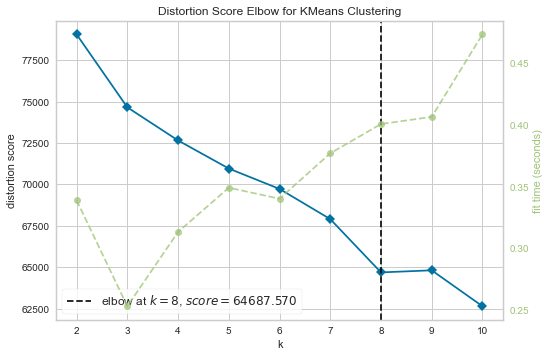

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [170]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

In [171]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)

#Adding the Clusters feature to the orignal dataframe.
customer["Clusters"]= yhat_AC

In [172]:
customer.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation       Divorced  84835.0        0         0        0       189   
1  Graduation         Single  57091.0        0         0        0       464   
2  Graduation        Married  67267.0        0         1        0       134   
3  Graduation       Together  32474.0        1         1        0        10   
4  Graduation         Single  21474.0        1         0        0         6   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Response  Complain  \
0        104              379              111  ...         1         0   
1          5               64                7  ...         1         0   
2         11               59               15  ...         0         0   
3          0                1                0  ...         0         0   
4         16               24               11  ...         1         0   

     Country  Age  Customer_duration_days  Total_Kids  Total_Purchases  \
0      Spain   52                    2930           0               16   
1     Canada   61                    2931           0               23   
2        USA   64                    2964           1               13   
3  Australia   55                    2966           2               11   
4      Spain   33                    2999           1               15   

   OverAllCampaign  Total_Product  Clusters  
0                1           1190         1  
1                2            577         0  
2                0            251         2  
3                0             11         0  
4                2             91         0  

[5 rows x 32 columns]

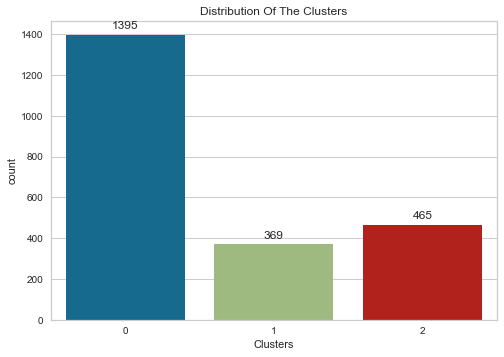

In [173]:
#Plotting countplot of clusters
pl = sns.countplot(x=customer["Clusters"])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of The Clusters")
plt.show()

- **We observed that Cluster 0 having 1395 customer, Cluster 1 having 369 customer, and Cluster 2 having 465 customer.**

## Visualize Categorical Features

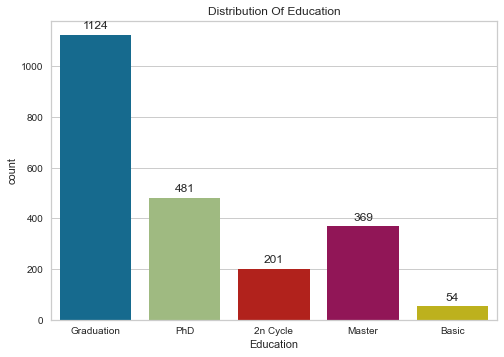

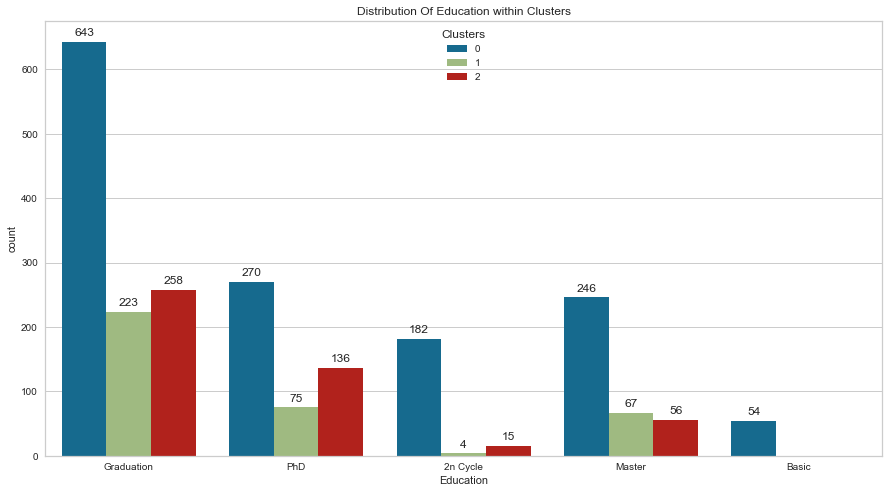

In [174]:
# Visualize Education in each Clusters
#Plotting countplot of clusters
pl = sns.countplot(x=customer["Education"])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of Education")
plt.show()

plt.figure(figsize=(15,8))
pl = sns.countplot(x=customer["Education"],hue=customer['Clusters'])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of Education within Clusters")
plt.show()


#### Based on Customer-Education Segmentation, 
- In each Education cycle, Customer of Cluster 0 is highly educated than other clusters.
- For Among 1124 Graduation customer, 643 graduate customer in cluster 0 , 223 graduate customer in cluster 1, and 258 graduate customer in cluster 2.
- For 54 Basic, only cluster 0 customer educated.

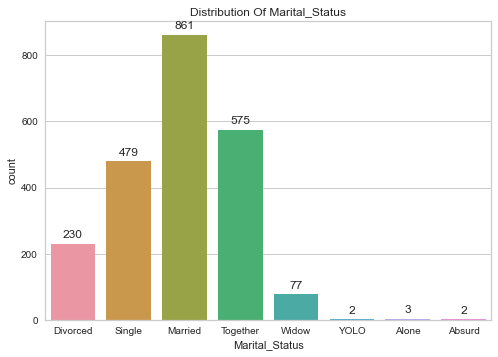

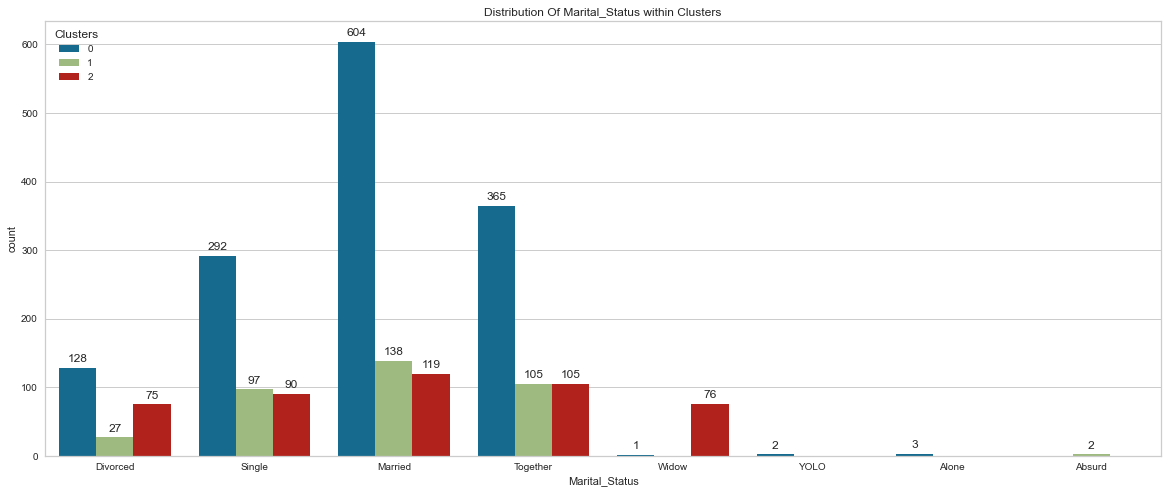

In [175]:
# Visualize Martial Status in each Clusters
#Plotting countplot of Marital_Status
pl = sns.countplot(x=customer["Marital_Status"])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of Marital_Status")
plt.show()


plt.figure(figsize=(20,8))
pl = sns.countplot(x=customer["Marital_Status"],hue=customer['Clusters'])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of Marital_Status within Clusters")
plt.show()

#### Based on Customer-Marital Status Segmentation
- We visaulize that only Divorced, Single, Married, and Together customer having in all clsuter.
- `Married` customer having highest number in all clusters.

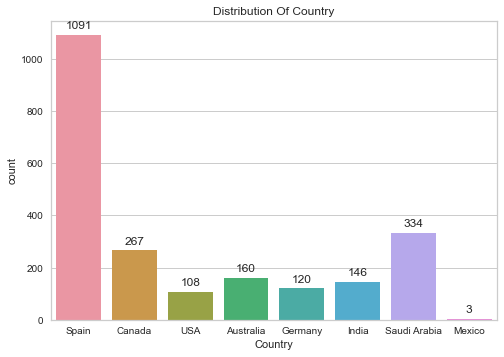

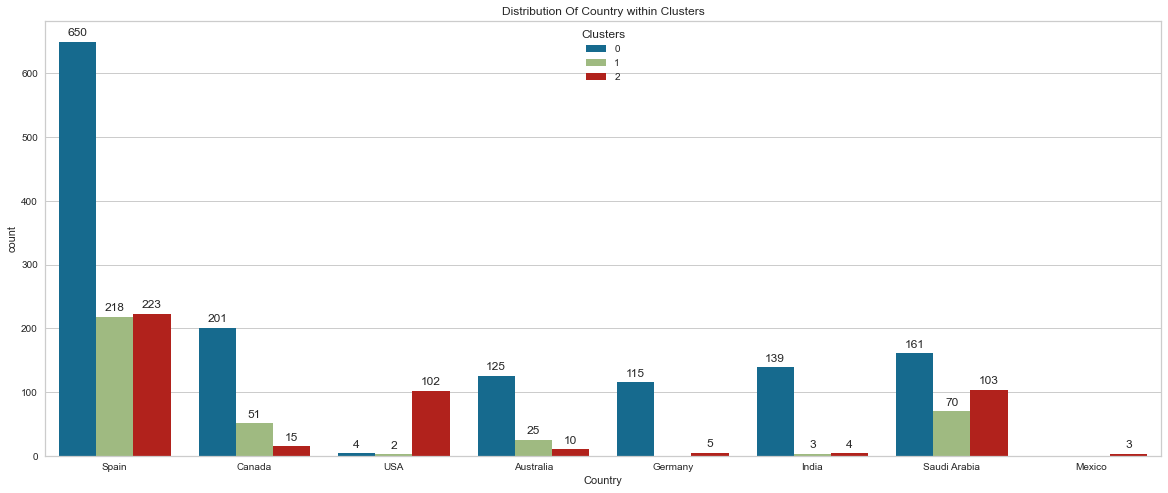

In [176]:
# Visualize Country in each Clusters
#Plotting countplot of Country
pl = sns.countplot(x=customer["Country"])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of Country")
plt.show()

plt.figure(figsize=(20,8))
pl = sns.countplot(x=customer["Country"],hue=customer['Clusters'])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of Country within Clusters")
plt.show()

#### Based on Customer-Country Segmentation
- We visaulize that except Germany and Mexcio having all cluster.
- `Spain` having highest number of customer in all clusters.
- `Mexico` having only 3 customer in clsuter 2.
- `Germany` do not having any customer in clsuter 1.

## Visualize Continuous Features

In [177]:
# see every Continuous Variable group's mean value of every columns.
cluster_group = customer.groupby(by='Clusters').mean().reset_index()
cluster_group

Clusters        Income   Kidhome  Teenhome    Recency    MntWines  \
0         0  42698.994461  0.611470  0.522581  48.892473  162.181362   
1         1  77612.808269  0.035230  0.119241  49.360434  659.170732   
2         2  57798.773136  0.268817  0.769892  49.546237  452.363441   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0  13.622222        77.777061        19.551254         13.718996  ...   
1  68.818428       480.921409        97.688347         67.271003  ...   
2  30.825806       177.331183        44.266667         35.660215  ...   

   AcceptedCmp1  AcceptedCmp2  Response  Complain        Age  \
0      0.019355      0.006452  0.101075  0.010753  51.631541   
1      0.260163      0.035230  0.327913  0.005420  52.964770   
2      0.045161      0.017204  0.154839  0.006452  57.666667   

   Customer_duration_days  Total_Kids  Total_Purchases  OverAllCampaign  \
0             3256.356272    1.134050        17.597849         0.265233   
1             3258.739837    0.154472        22.943089         1.165312   
2             3323.593548    1.038710        25.845161         0.430108   

   Total_Product  
0     316.512545  
1    1449.081301  
2     803.236559  

[3 rows x 29 columns]

In [178]:
cluster_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clusters                3 non-null      int64  
 1   Income                  3 non-null      float64
 2   Kidhome                 3 non-null      float64
 3   Teenhome                3 non-null      float64
 4   Recency                 3 non-null      float64
 5   MntWines                3 non-null      float64
 6   MntFruits               3 non-null      float64
 7   MntMeatProducts         3 non-null      float64
 8   MntFishProducts         3 non-null      float64
 9   MntSweetProducts        3 non-null      float64
 10  MntGoldProds            3 non-null      float64
 11  NumDealsPurchases       3 non-null      float64
 12  NumWebPurchases         3 non-null      float64
 13  NumCatalogPurchases     3 non-null      float64
 14  NumStorePurchases       3 non-null      float6

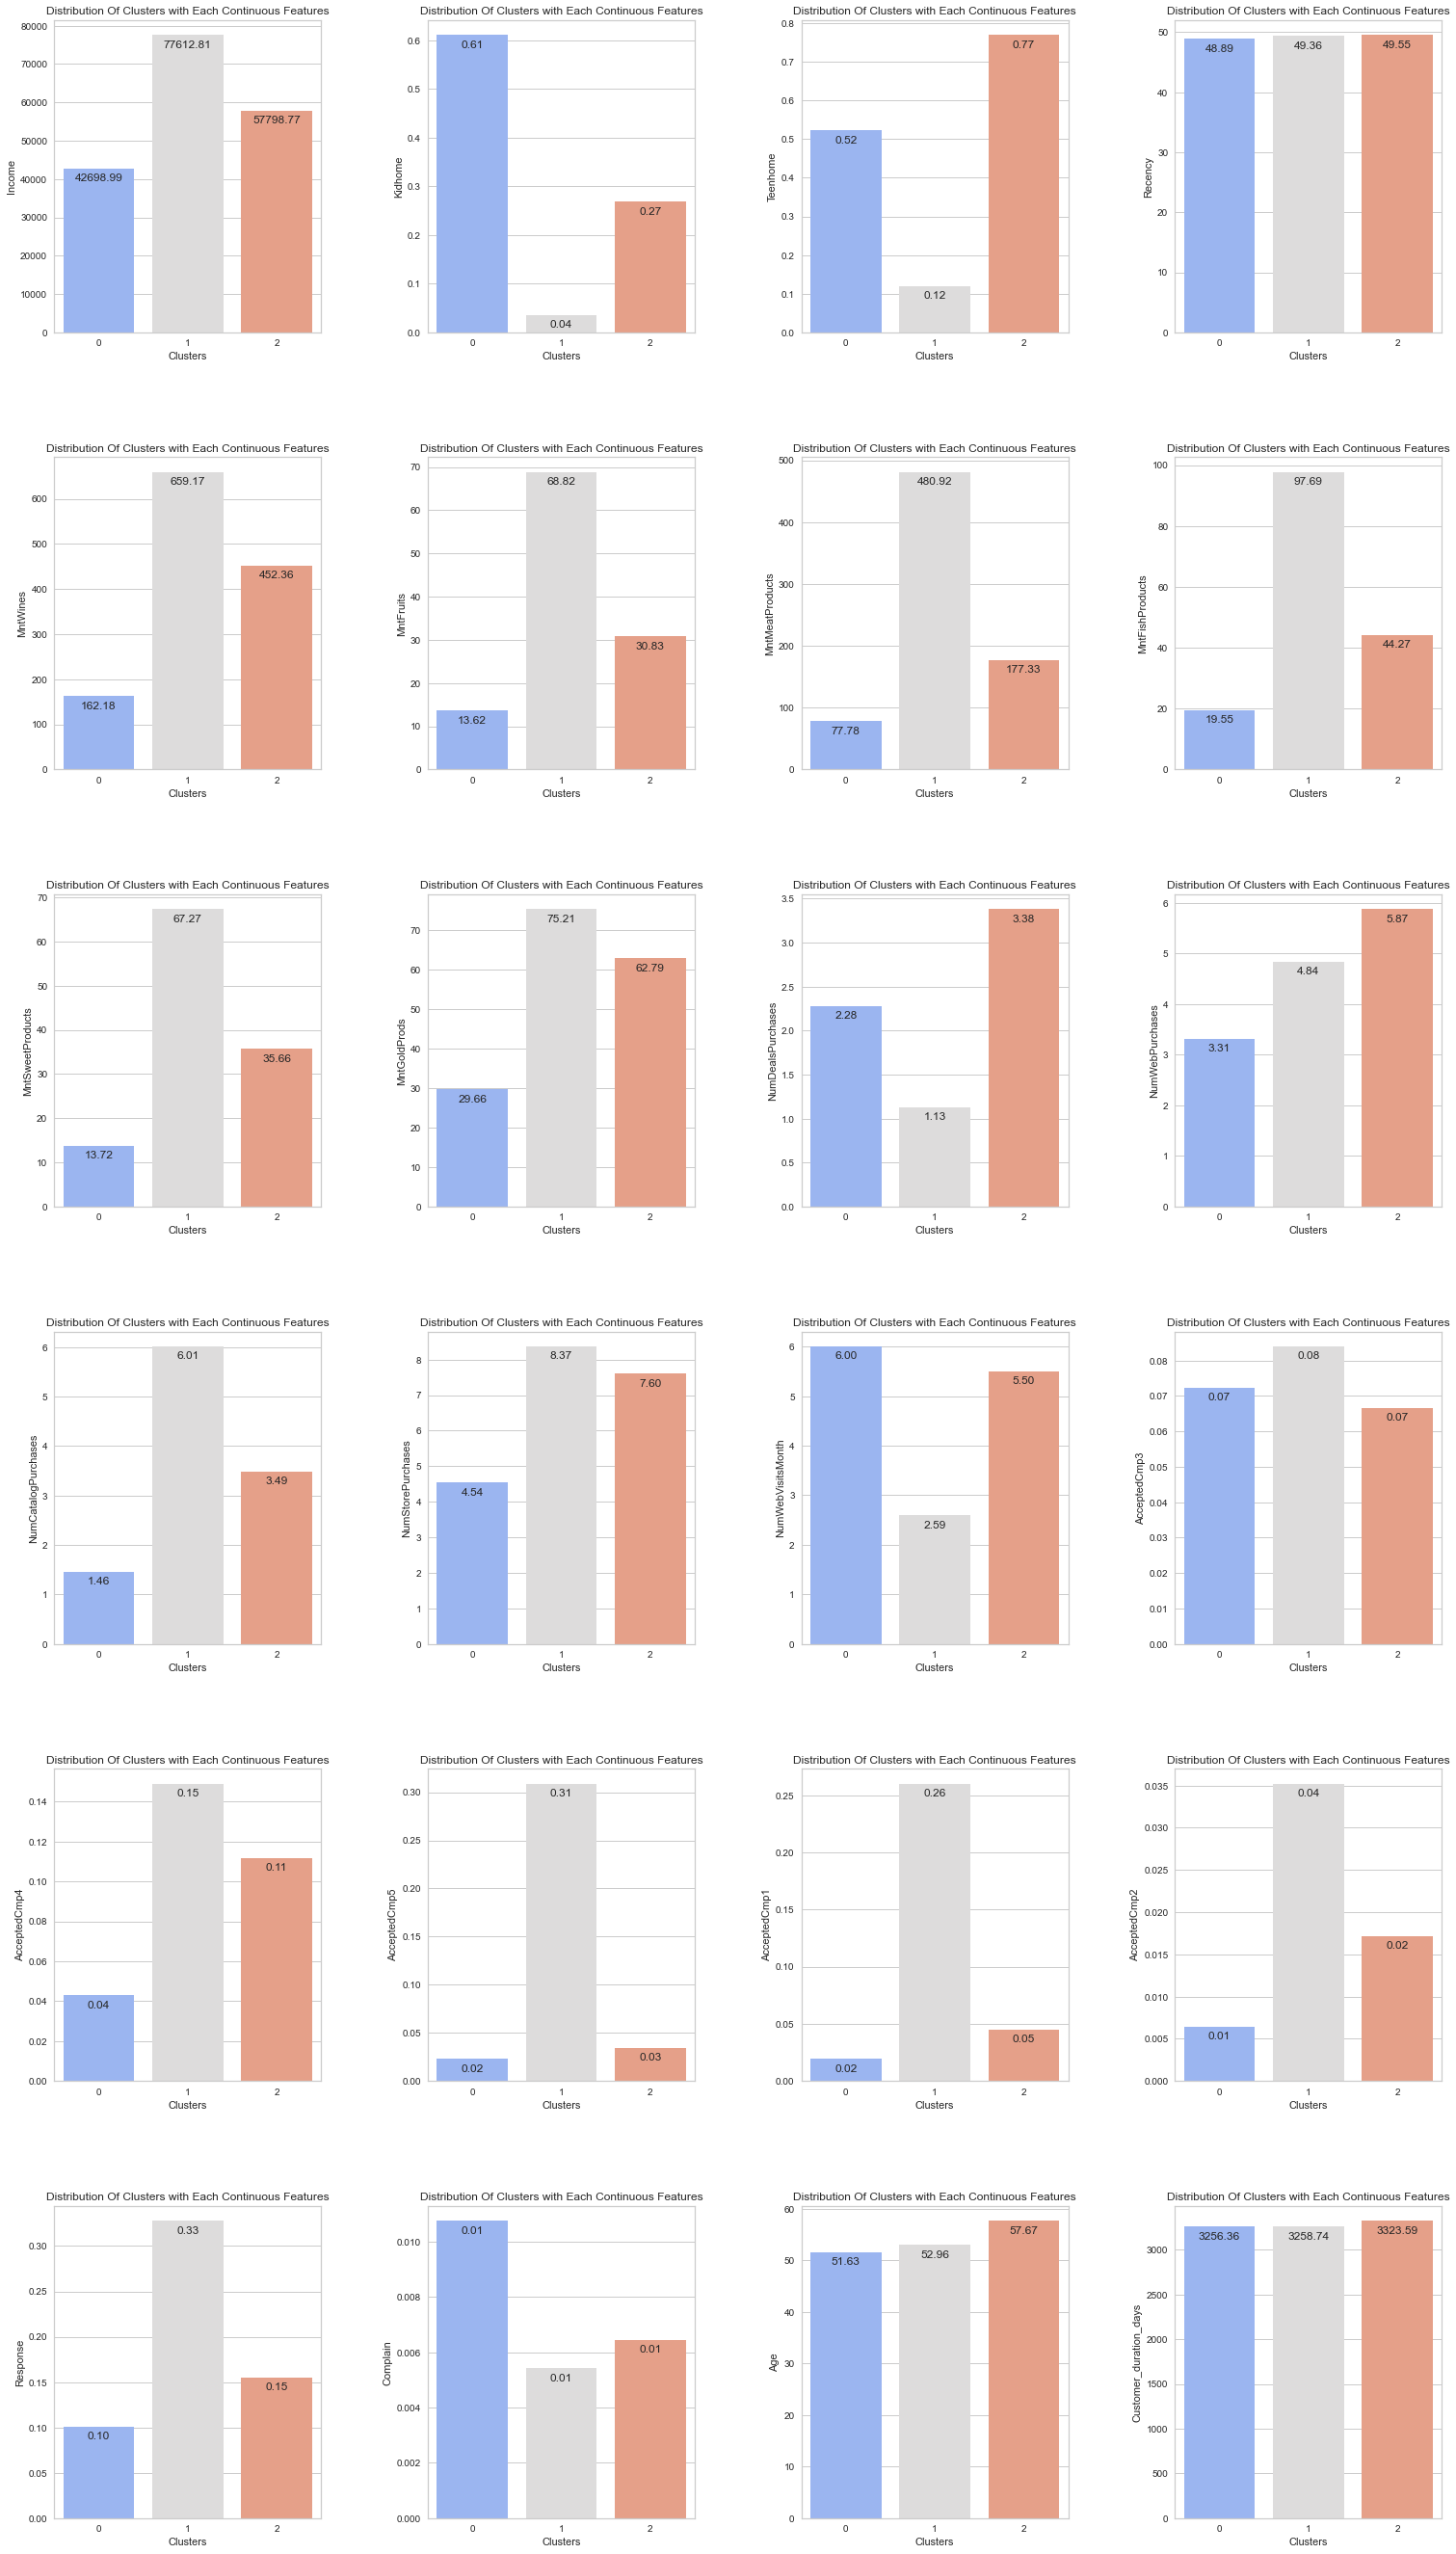

In [179]:
# we can explain behavior of each group from the feature.
plt.figure(figsize=(25,45))
for index, col in enumerate(cluster_group.columns[1:25]):
    plt.subplot(6,4,index+1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.title("Distribution Of Clusters with Each Continuous Features")
    pl = sns.barplot(x='Clusters', y=col, data=cluster_group, palette='coolwarm')
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -10), 
                   textcoords = 'offset points')
plt.show()

- An average customer has
    - an annual income of **77613** in `cluster 1`.
    - 50 years age group in all cluster.
    - spent more than 3000 days when they enrolled in company in all cluster.  
    - **49** days since last purchase in all cluster.
    - **659** amount spent on **`Wines`** in `cluster 1`, **452** in `clsuter 2`, and **162** in `cluster 0` in the last 2 years.
    - **69** amount spent on **`Fruits`** in `cluster 1`, **31** in `clsuter 2`, and **14** in `cluster 0` in the last 2 years.
    - **481** amount spent on **`Meat`** in `cluster 1`, **177** in `clsuter 2`, and **78** in `cluster 0` in the last 2 years.
    - **98** amount spent on **`Fish`** in `cluster 1`, **44** in `clsuter 2`, and **20** in `cluster 0` in the last 2 years.
    - **67** amount spent on **`Sweets`** in `cluster 1`, **36** in `clsuter 2`, and **14** in `cluster 0` in the last 2 years.
    - **75** amount spent on **`Gold`** in `cluster 1`, **63** in `clsuter 2`, and **30** in `cluster 0` in the last 2 years.

# <font color='red'>10) What does the average customer who makes a web purchase profile look like?</font>

- **For web purchase we need to make group as no,low, medium and high purchases.** 
- **Based on group we have to analyse on what factor customer make a web purchase.**
- **We already created dataframe as "nw" having a column "Web_Group", so we will make copy of that dataframe**.


In [180]:
# Copying nw dataframe in new dataframe "df_web"
df_web = nw.copy()

In [181]:
df_web['Web_Group'].nunique()

4

In [182]:
# Do label encoding for column "Web_Group" for analysing.
# using replace() to convert categorical to numerical data
df_web['Web_Group'].replace(['No Purchases','Low Purchases','Medium Purchases','High Purchases'],
                            [0,1,2,3], inplace=True)

In [183]:
df_web['Web_Group'].value_counts()

0    767
1    614
2    425
3    419
Name: Web_Group, dtype: int64

In [184]:
df_web.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'Web_Group', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Age',
       'Customer_duration_days'],
      dtype='object')

In [185]:
#We will grouping with WebPurchases, so we drop NumWebPurchase and NumWebVisitsMonth features from dataframe
df_web = df_web.drop(['ID','Kidhome', 'Teenhome','NumWebVisitsMonth','NumWebPurchases',
                      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1',
                      'AcceptedCmp2', 'Response', 'Complain'],axis=1)

In [186]:
# see every Web group's mean value of every columns.
web_group = df_web.groupby(by='Web_Group').mean().reset_index()
web_group.head()

Web_Group        Income    Recency    MntWines  MntFruits  MntMeatProducts  \
0          0  35998.307713  49.380704   71.700130   7.233377        39.290743   
1          1  54599.881526  49.949511  302.692182  30.869707       201.706840   
2          2  63805.690016  48.941176  458.237647  42.463529       275.148235   
3          3  63605.375302  47.718377  582.625298  38.594272       232.565632   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0        11.198175          6.882660     16.153846           1.706649   
1        45.210098         30.983713     47.358306           2.366450   
2        55.583529         44.268235     63.148235           2.576471   
3        57.095465         40.322196     69.319809           3.136038   

   NumCatalogPurchases  NumStorePurchases        Age  Customer_duration_days  
0             0.837027           3.396349  50.963494             3226.329857  
1             2.921824           6.105863  52.732899             3261.037459  
2             4.134118           7.663529  55.150588             3294.875294  
3             4.016706           7.980907  55.505967             3342.968974

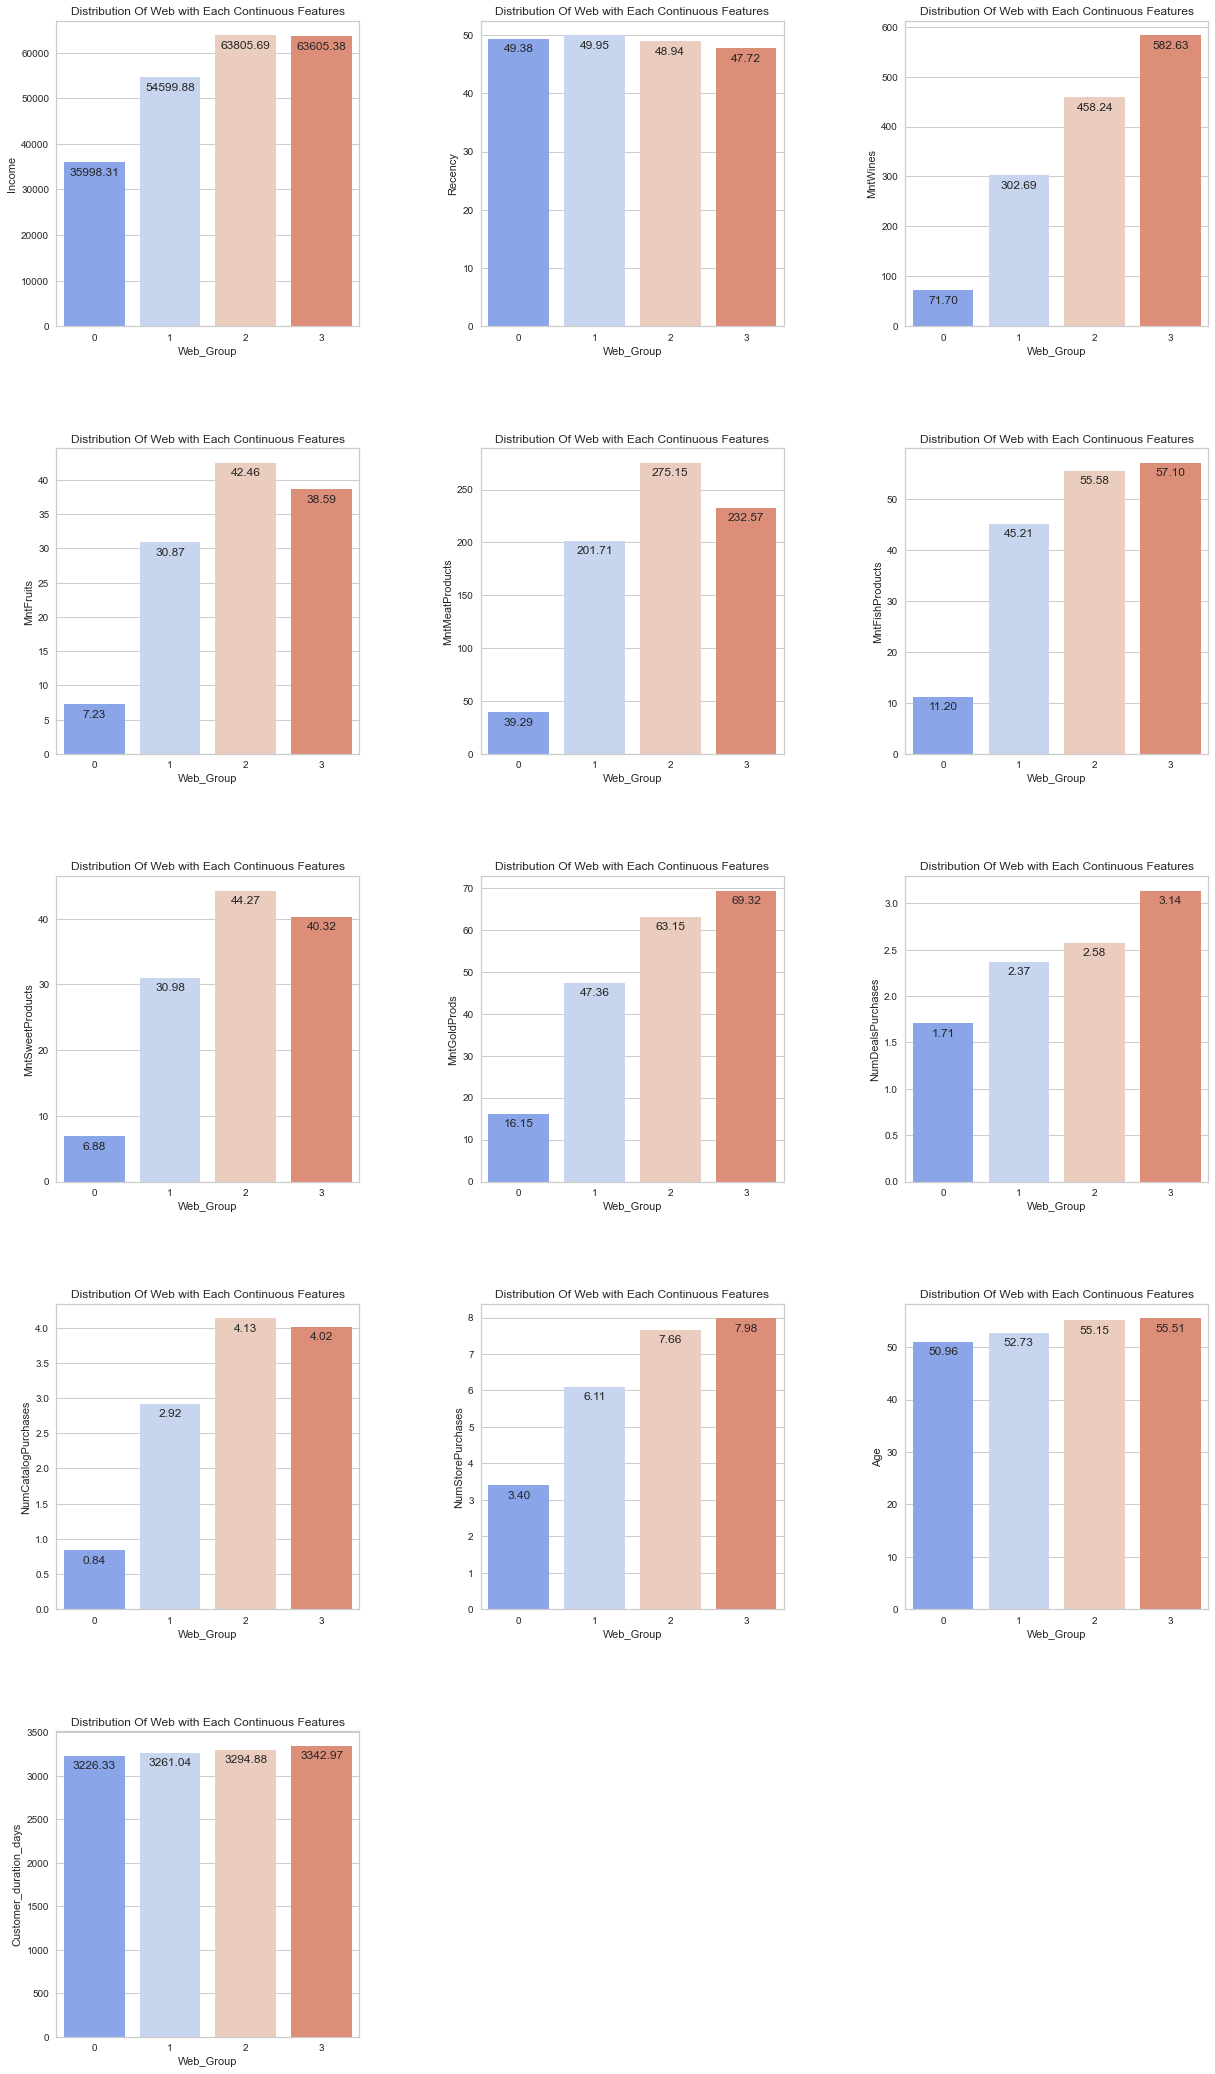

In [187]:
# we can explain behavior of each group from the feature.
plt.figure(figsize=(20,35))
for index, col in enumerate(web_group.columns[1:15]):
    plt.subplot(5,3,index+1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.title("Distribution Of Web with Each Continuous Features")
    pl = sns.barplot(x='Web_Group', y=col, data=web_group, palette='coolwarm')
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -10), 
                   textcoords = 'offset points')
plt.show()

- If customer has to make purchse through website, we will check **`medium`** and **`high`** purchase made by different features which are dependent to Web Purchase.
    - We already assigned group 2 as "medium" and group 3 as "high"
        - more than 60000 Income spent on website for purchase household yearly.
        - customer spend 49 days in last purchase through website.
        - Wines, Fish and Gold Products moslty purchase through website.
        - 55 years age group customer made purchase through websites.
        - Most of customer made purchase with discount on websites.

# <font color='red'>11) What does the average customer who makes a store purchase look like?</font>

- **For store purchase we need to make group as no,low, medium and high purchases.**
- **Based on group we have to analyse on what factor customer make a store purchase.**
- **We already created dataframe as "ns" having a column `"Store_Group"`, so we will make copy of that dataframe.**

In [188]:
# Copying ns dataframe in new dataframe "df_store"
df_store = ns.copy()

In [189]:
df_store['Store_Group'].nunique()

4

In [190]:
# Do label encoding for column "Store_Group" for analysing.
# using replace() to convert categorical to numerical data
df_store['Store_Group'].replace(['No Purchases','Low Purchases','Medium Purchases','High Purchases'],
                            [0,1,2,3], inplace=True)

In [191]:
df_store['Store_Group'].value_counts()

0    725
1    534
3    500
2    470
Name: Store_Group, dtype: int64

In [192]:
df_store.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Store_Group', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Age',
       'Customer_duration_days'],
      dtype='object')

In [193]:
#We will grouping with WebPurchases, so we drop NumWebPurchase and NumWebVisitsMonth features from dataframe
df_store = df_store.drop(['ID','NumStorePurchases','Kidhome', 'Teenhome',
                          'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1','AcceptedCmp2','Response','Complain'],axis=1)

In [194]:
df_store.shape

(2229, 15)

In [195]:
# see every Store group's mean value of every columns.
store_group = df_store.groupby(by='Store_Group').mean().reset_index()
store_group

Store_Group        Income    Recency    MntWines  MntFruits  \
0            0  32023.063124  48.777931   25.576552   3.571034   
1            1  50961.895612  50.623596  269.797753  21.486891   
2            2  62892.951610  46.661702  447.968085  40.125532   
3            3  70181.185508  50.260000  613.332000  51.618000   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0        19.495172         5.420690          4.451034     16.590345   
1       142.526217        33.460674         22.149813     42.131086   
2       244.702128        54.176596         39.455319     61.510638   
3       326.330000        73.288000         53.888000     69.784000   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumWebVisitsMonth  \
0           1.797241         1.888276             0.524138           6.750345   
1           2.696629         4.258427             2.541199           5.445693   
2           2.700000         5.602128             3.642553           4.504255   
3           2.318000         5.726000             4.856000           3.942000   

         Age  Customer_duration_days  
0  49.828966             3238.634483  
1  54.713483             3277.507491  
2  54.478723             3277.891489  
3  54.874000             3303.510000

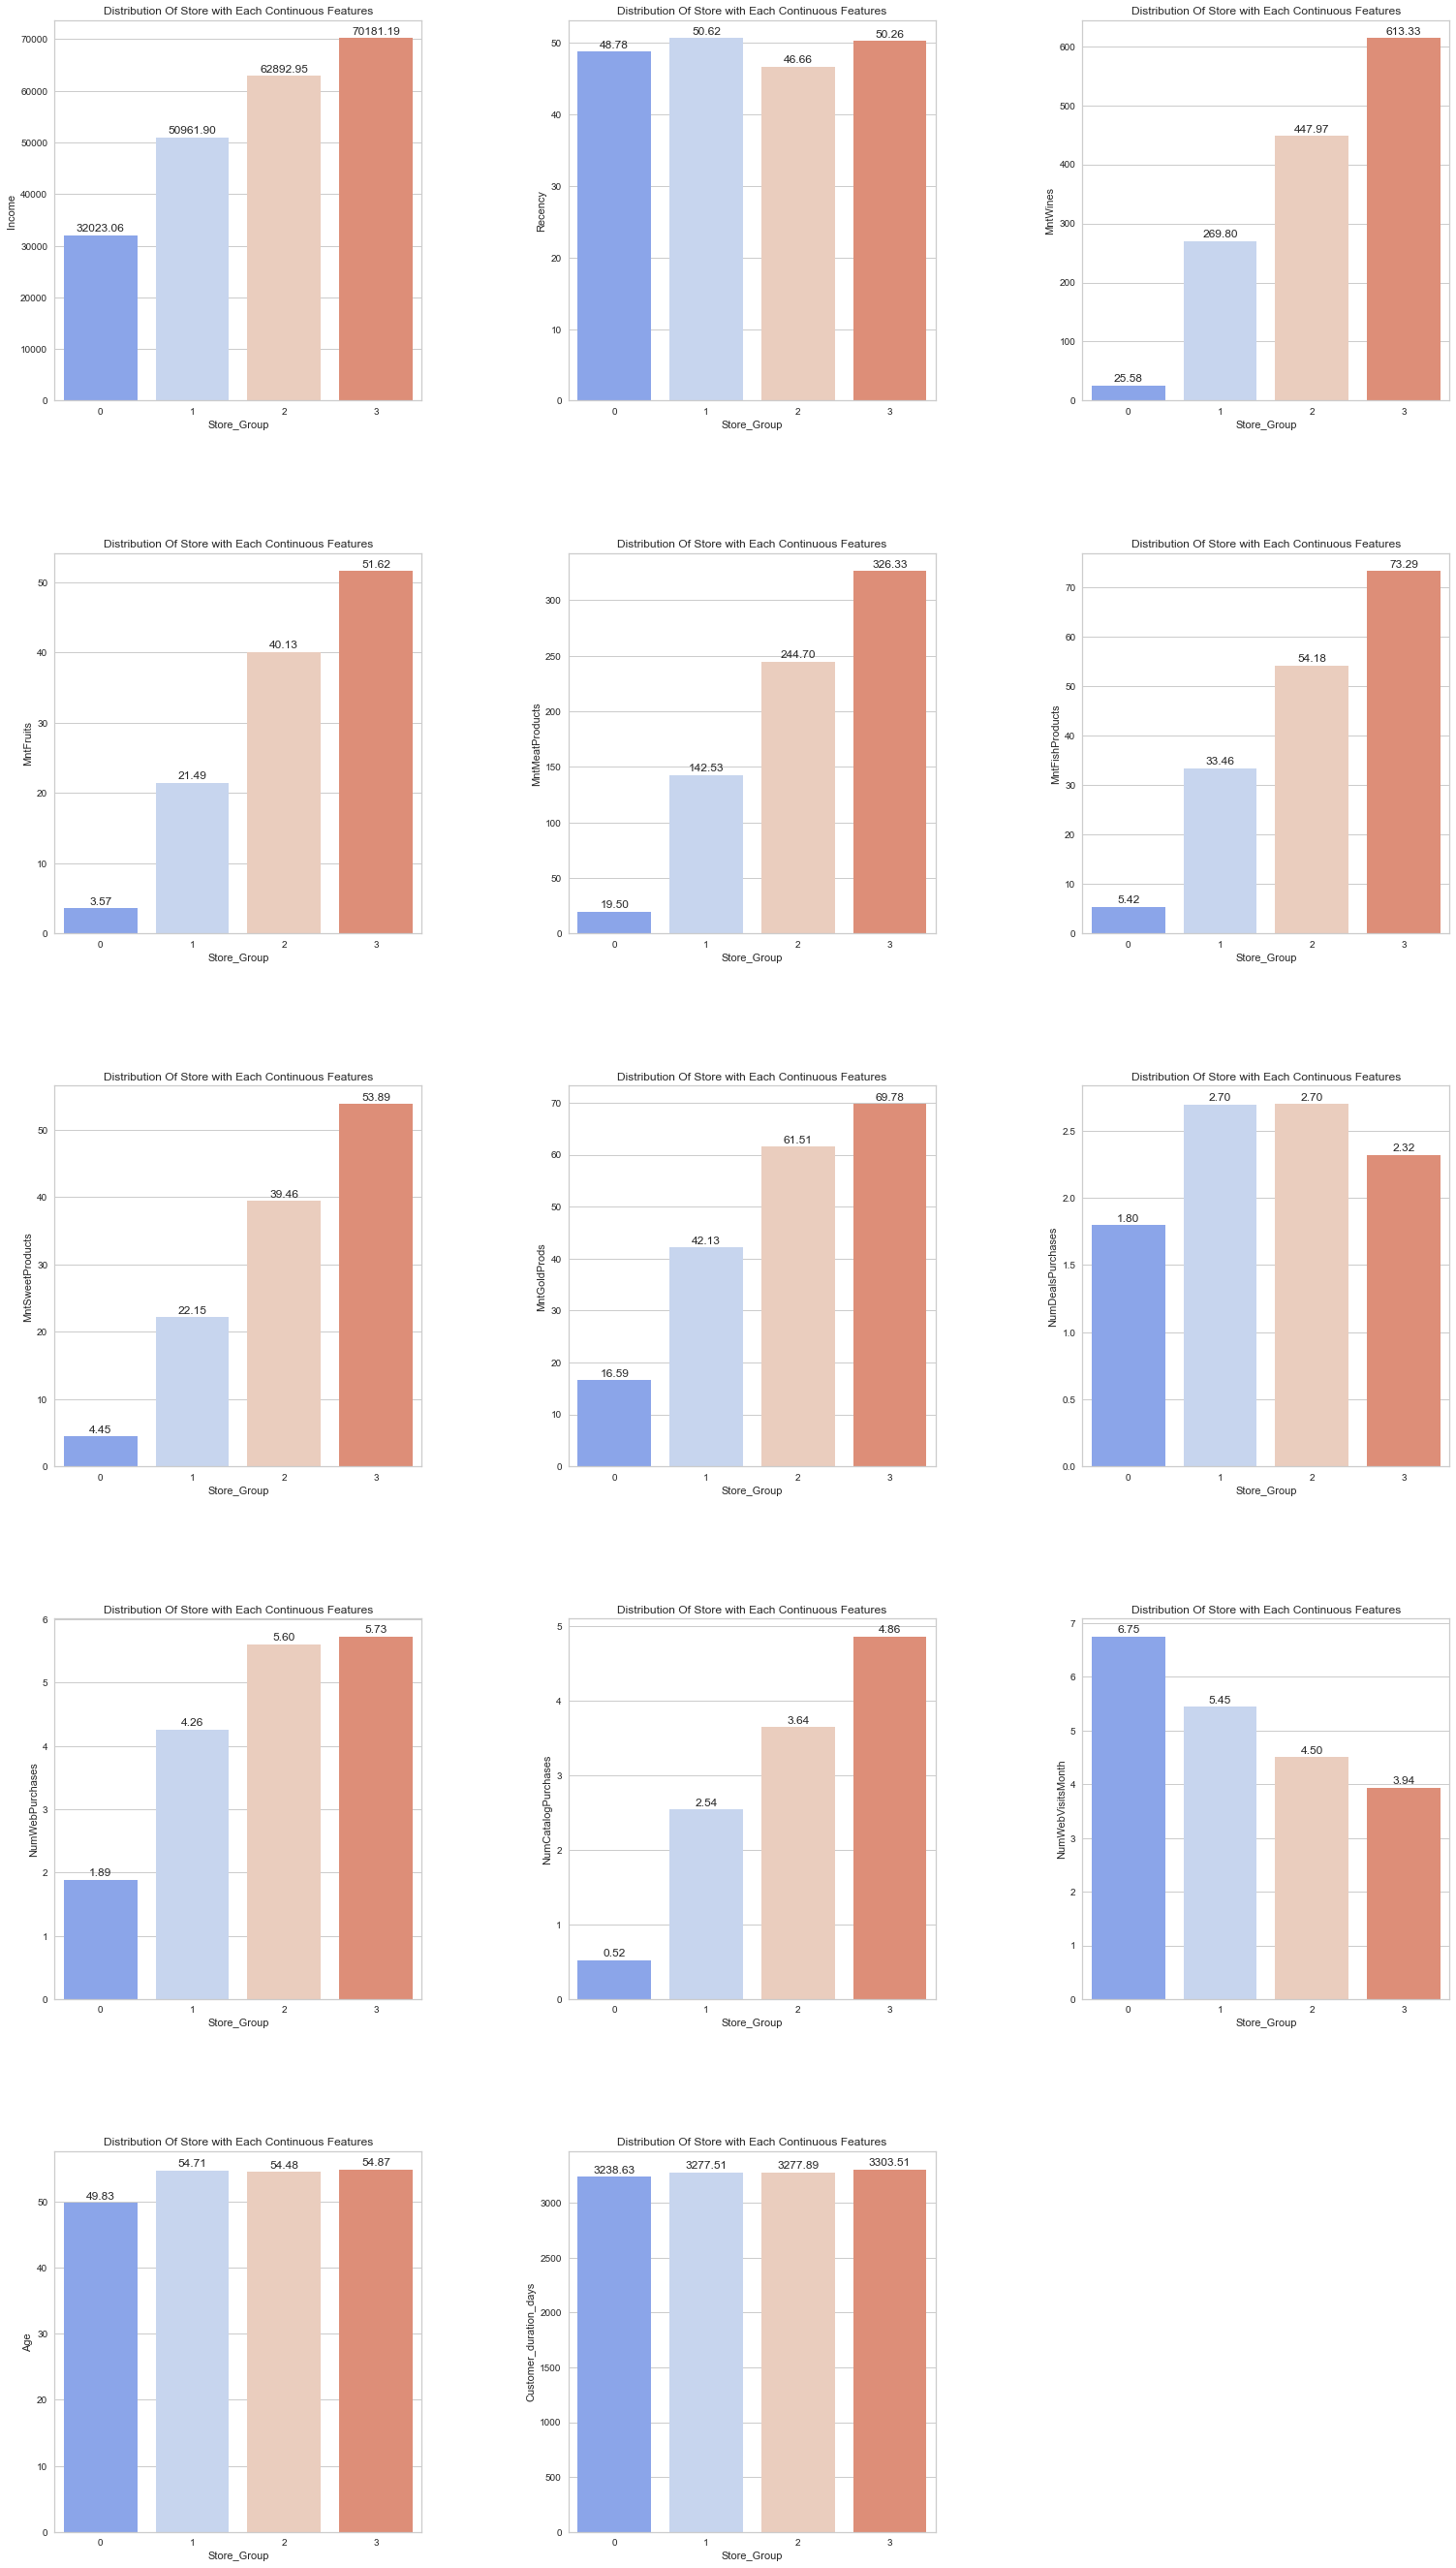

In [196]:
# we can explain behavior of each group from the feature.
plt.figure(figsize=(25,45))
for index, col in enumerate(store_group.columns[1:15]):
    plt.subplot(5,3,index+1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.title("Distribution Of Store with Each Continuous Features")
    pl = sns.barplot(x='Store_Group', y=col, data=store_group, palette='coolwarm')
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.show()

- If customer has to make purchse through directly **`store`**, we will check **`medium`** and **`high`** purchase made by different features which are dependent to Store Purchase.
- We already assigned group 2 as "medium" and group 3 as "high"
    - more than 70000 Income spent on store for purchase household yearly.
    - customer spend 50 days in last purchase through sotre.
    - Wines,Fruits,Meat,Fish,Sweets and Gold Products moslty purchase through directly store.
    - Customer spent more on purchase direclty from store rather than visiting Website. 
    - 55 years age group customer made purchase through websites.
    - Most of customer made purchase using catalog on websites.

# <font color='red'>12) What does the average American customer who makes a store purchase look like?</font>


In [197]:
df_concat.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  84835.0        0         0        0       189        104              379   
1  57091.0        0         0        0       464          5               64   
2  67267.0        0         1        0       134         11               59   
3  32474.0        1         1        0        10          0                1   
4  21474.0        1         0        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Widow  YOLO  \
0              111               189           218  ...      0     0   
1                7                 0            37  ...      0     0   
2               15                 2            30  ...      0     0   
3                0                 0             0  ...      0     0   
4               11                 0            34  ...      0     0   

   Australia  Canada  Germany  India  Mexico  Saudi Arabia  Spain  USA  
0          0       0        0      0       0             0      1    0  
1          0       1        0      0       0             0      0    0  
2          0       0        0      0       0             0      0    1  
3          1       0        0      0       0             0      0    0  
4          0       0        0      0       0             0      1    0  

[5 rows x 49 columns]

In [198]:
#Adding the Clusters feature to the orignal dataframe.
df_concat["Clusters"]= yhat_AC

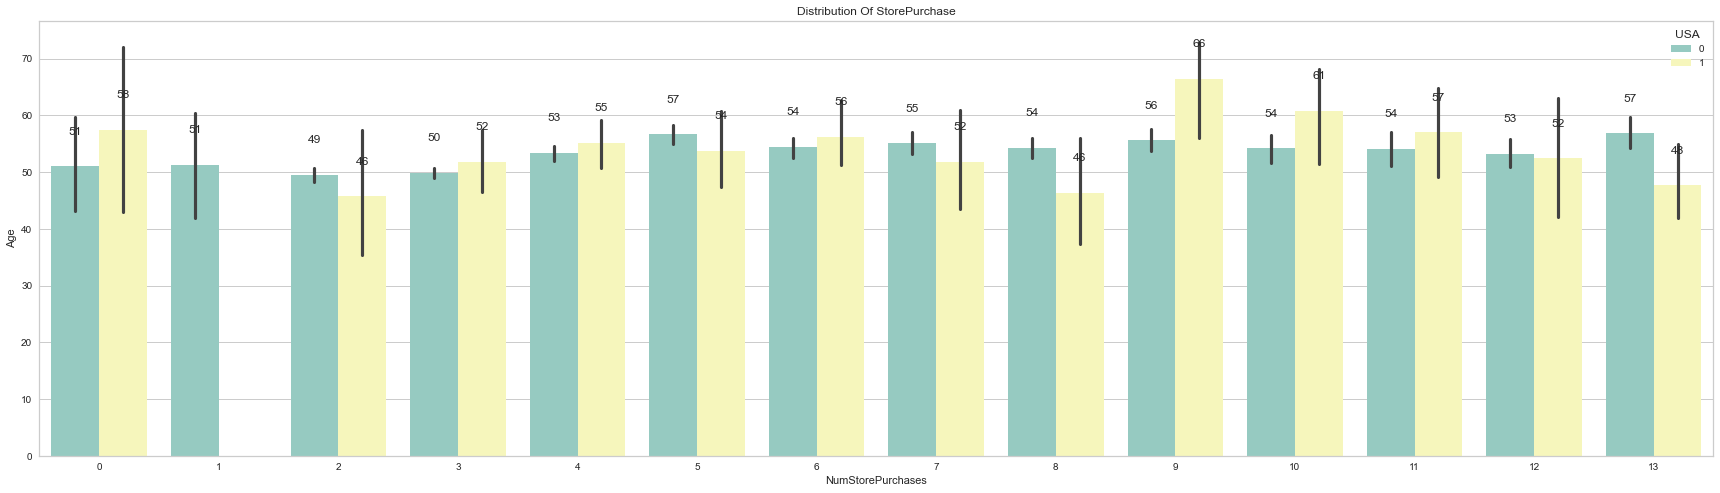

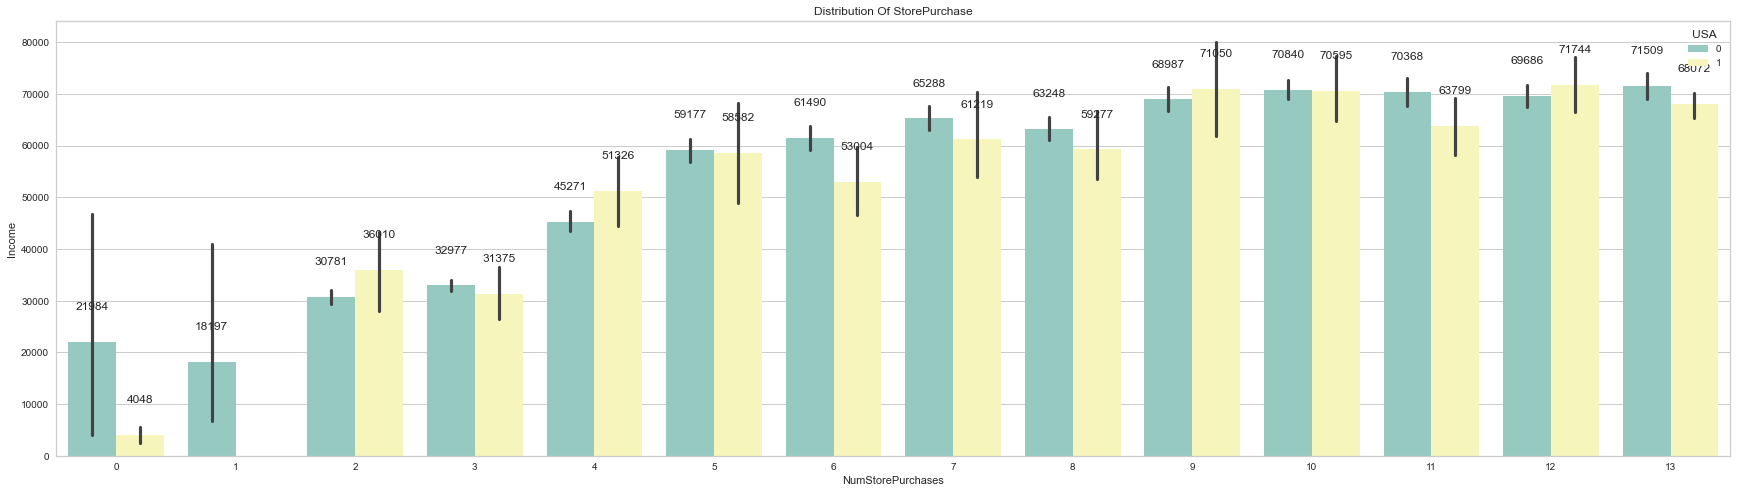

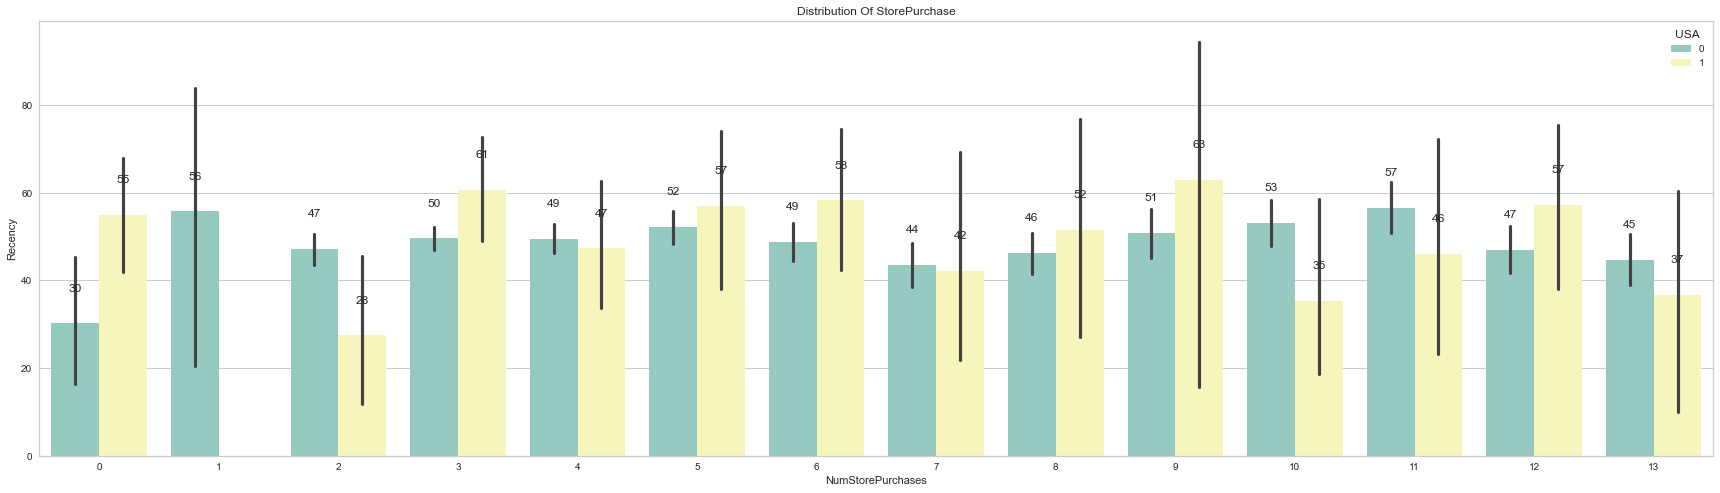

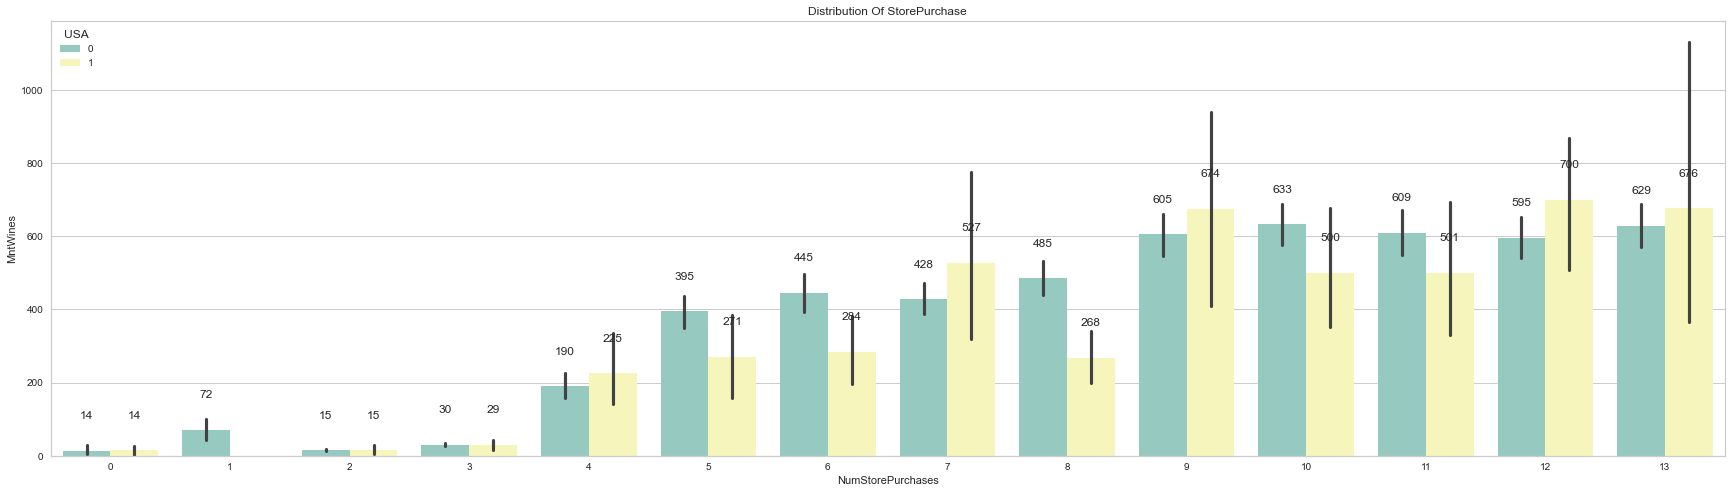

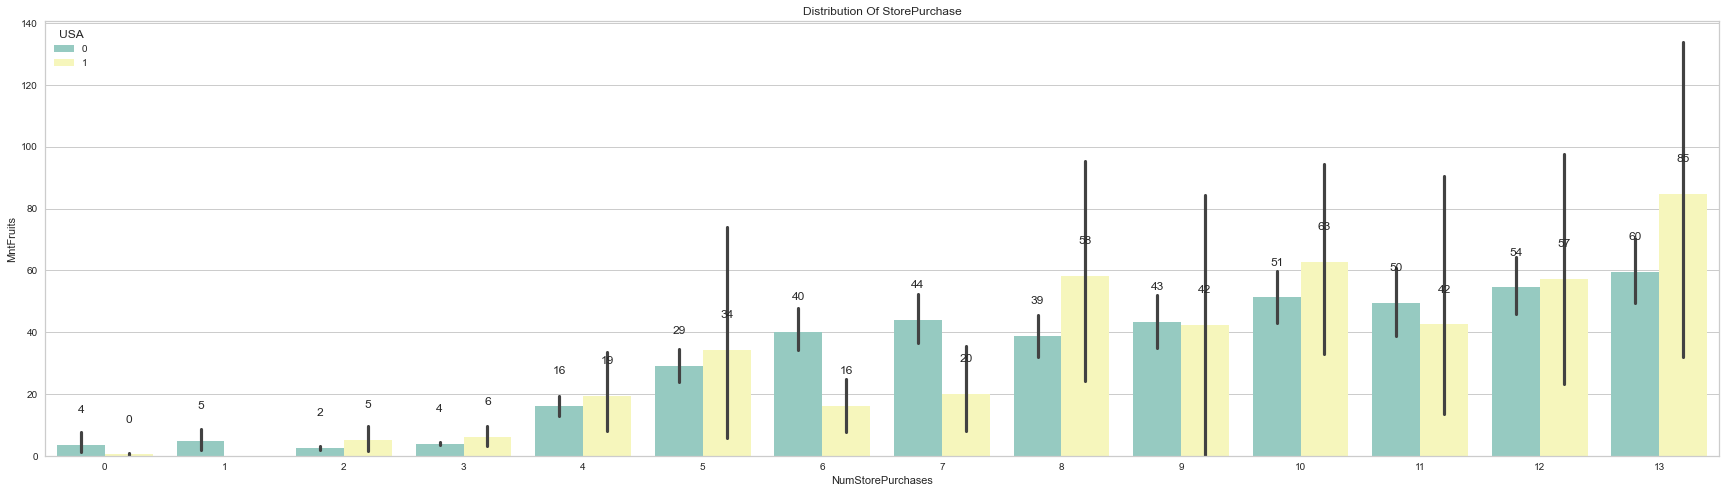

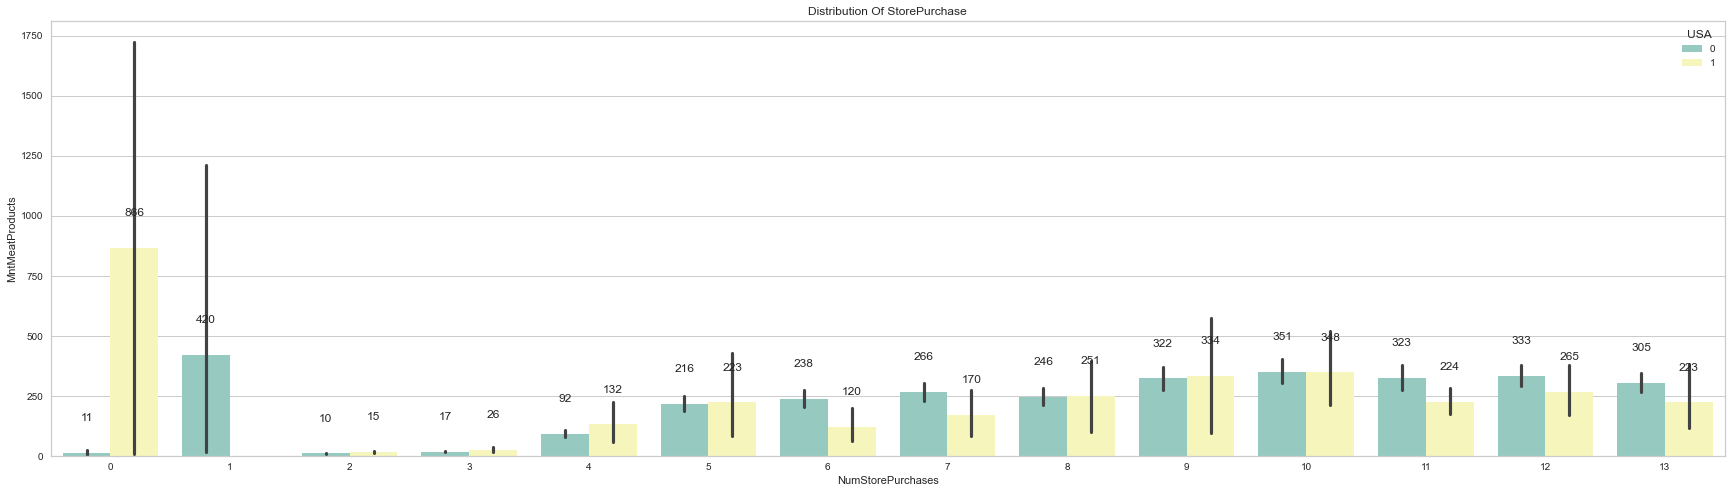

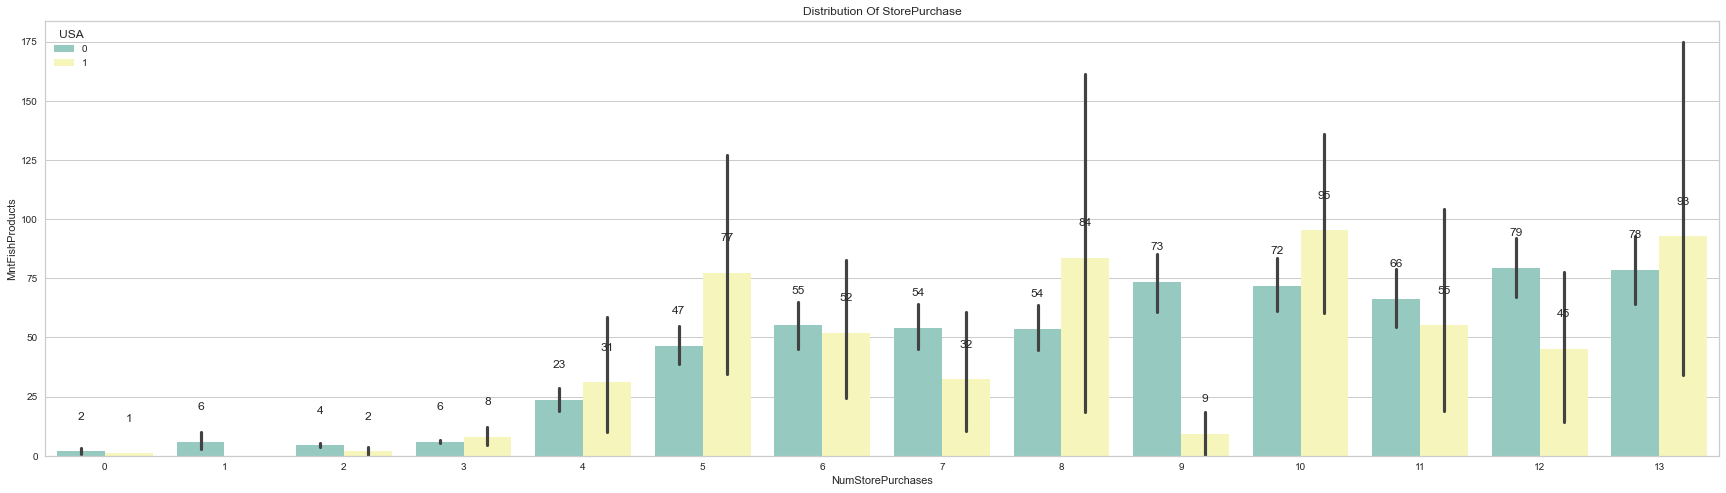

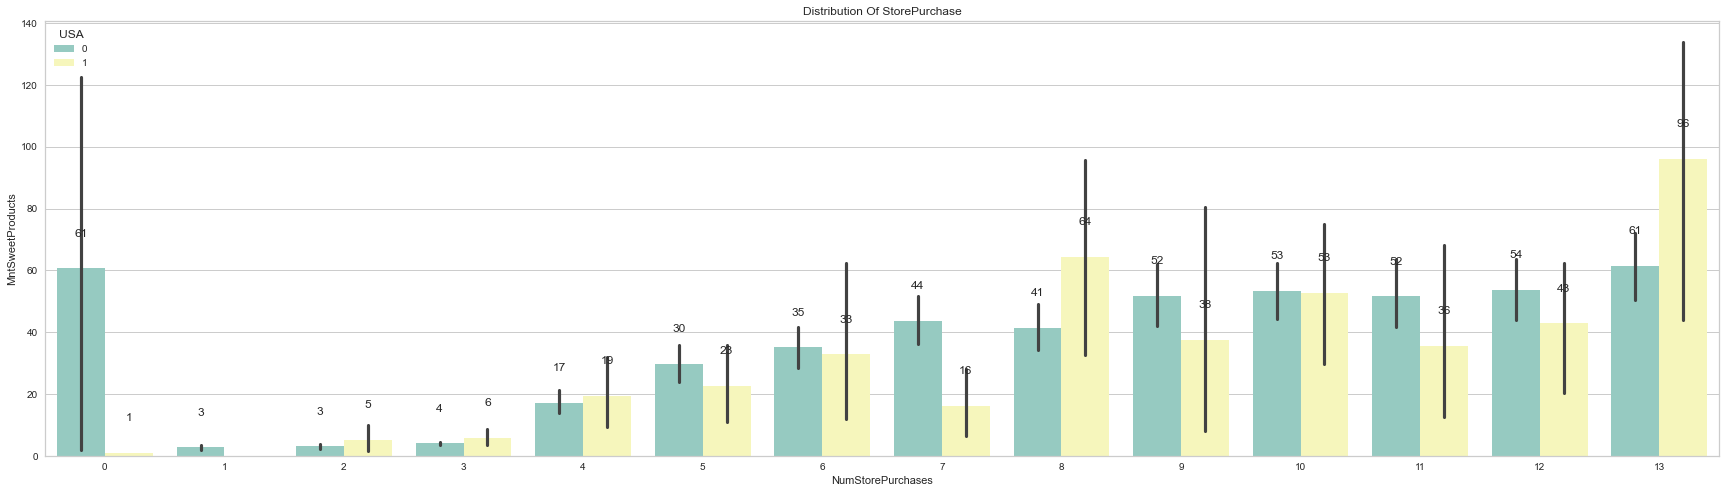

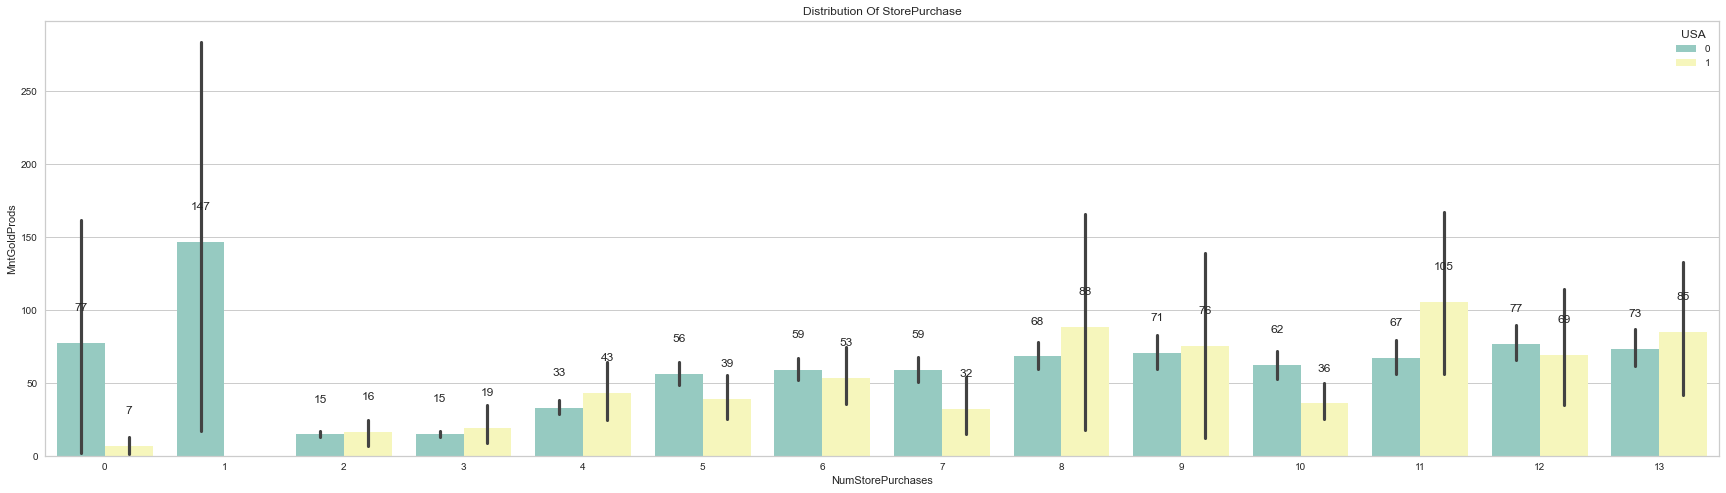

In [199]:
# We will add some important features which is dependent to StorePurchases
features = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for i in features:
    plt.figure(figsize=(30,8))
    pl = sns.barplot(x="NumStorePurchases", y=i, hue="USA",
                 data=df_concat, palette="Set3")
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 35), 
                   textcoords = 'offset points')
        pl.set_title("Distribution Of StorePurchase")
    plt.show()

- An USA Cusotmer has 
    - age of `66` years made 9 times purchase directly store.
    - `71744` amount spent when customer made purchase 12 times from store.
    - `700` amount spent on **wines** when customer made purchase 12 times from store.
    - In last purchase customer spend `63` days at store.
    - `866` amount spent on **Meats** when customer made purchase 1 times from store.

# <font color='red'>13) What does the average Spanish customer who makes a web purchase look like?</font>


- **We will use web purchase for analyzing spanish customer.**
- **As we already know that NumWebPurchases having outliers. we need to do treatment using Outlier function.**
- **After outlier we analyse and make insghts based on visualization.**

In [200]:
new_data = df_concat.copy() ## copying for safety reason and not to lost original data

In [201]:
# check summary statistics for NumWebPurchases
new_data['NumWebPurchases'].describe()

count    2229.000000
mean        4.100045
std         2.775461
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

<AxesSubplot:xlabel='NumWebPurchases'>

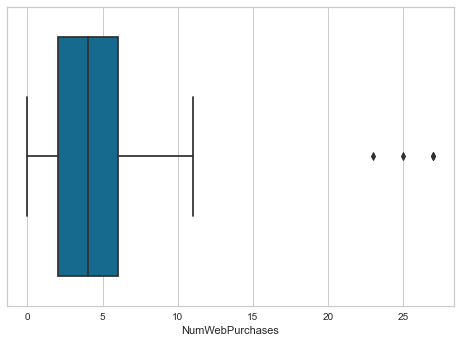

In [202]:
# check for outliers
sns.boxplot(new_data['NumWebPurchases'])

In [203]:
## Lets write the outlier function that will return us the lowerbound and upperbound values.
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

## Using the Outlier function, lets get the lowerbound and upperbound values for Age
lowerbound,upperbound = outlier_treatment(new_data['NumWebPurchases'])
print(lowerbound,upperbound)

## Lets check which column is considered as an outlier
new_data[(new_data['NumWebPurchases'] < lowerbound) | (new_data['NumWebPurchases'] > upperbound)]

## Now lets remove the outliers from the dataset.
new_data.drop(new_data[ (new_data['NumWebPurchases'] > upperbound) | (new_data['NumWebPurchases'] < lowerbound) ].index , inplace=True)

-4.0 12.0


<AxesSubplot:xlabel='NumWebPurchases'>

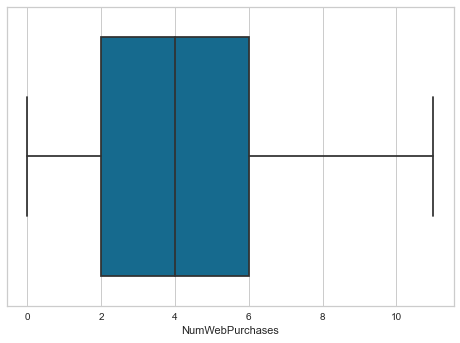

In [204]:
# Recheck outliers after treatment
sns.boxplot(new_data['NumWebPurchases'])

In [205]:
# Recheck summary after removing outliers
new_data['NumWebPurchases'].describe()

count    2225.000000
mean        4.061573
std         2.624299
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
Name: NumWebPurchases, dtype: float64

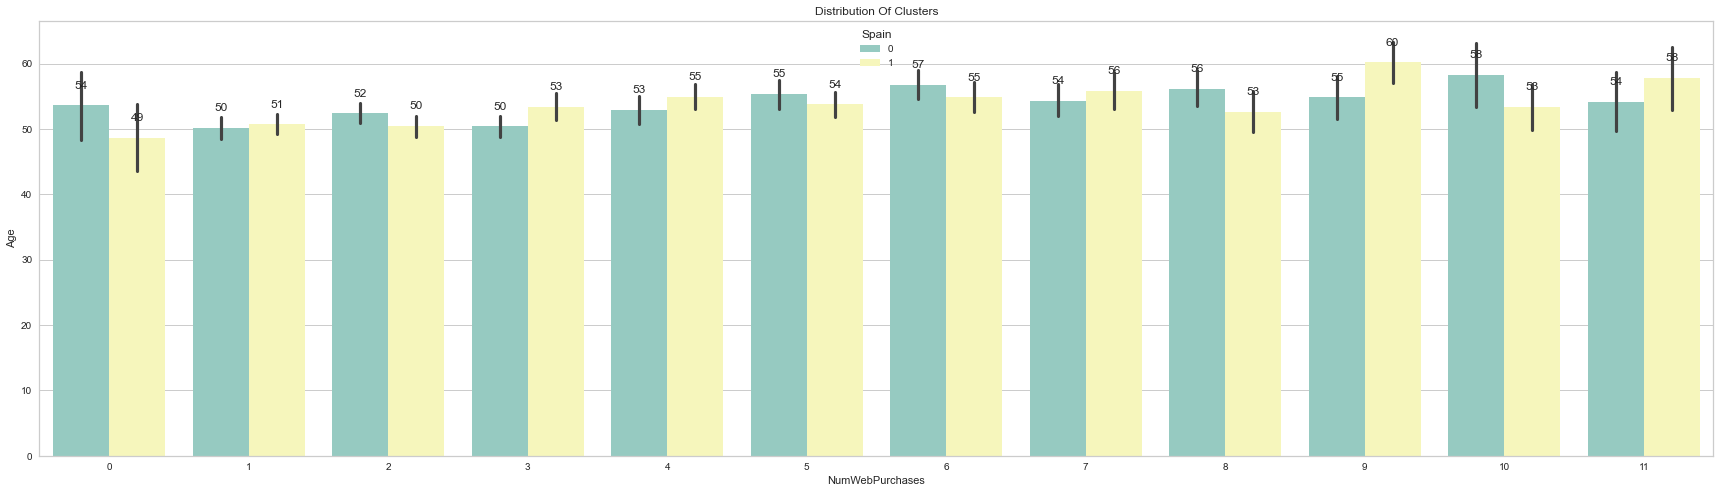

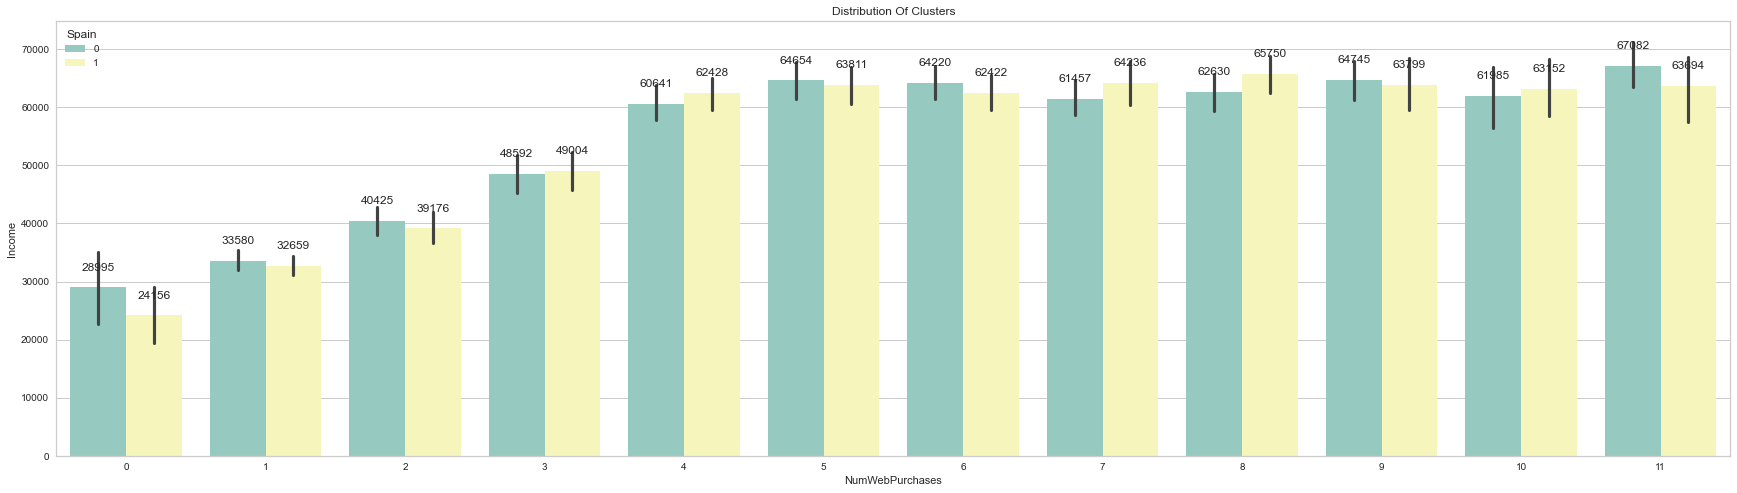

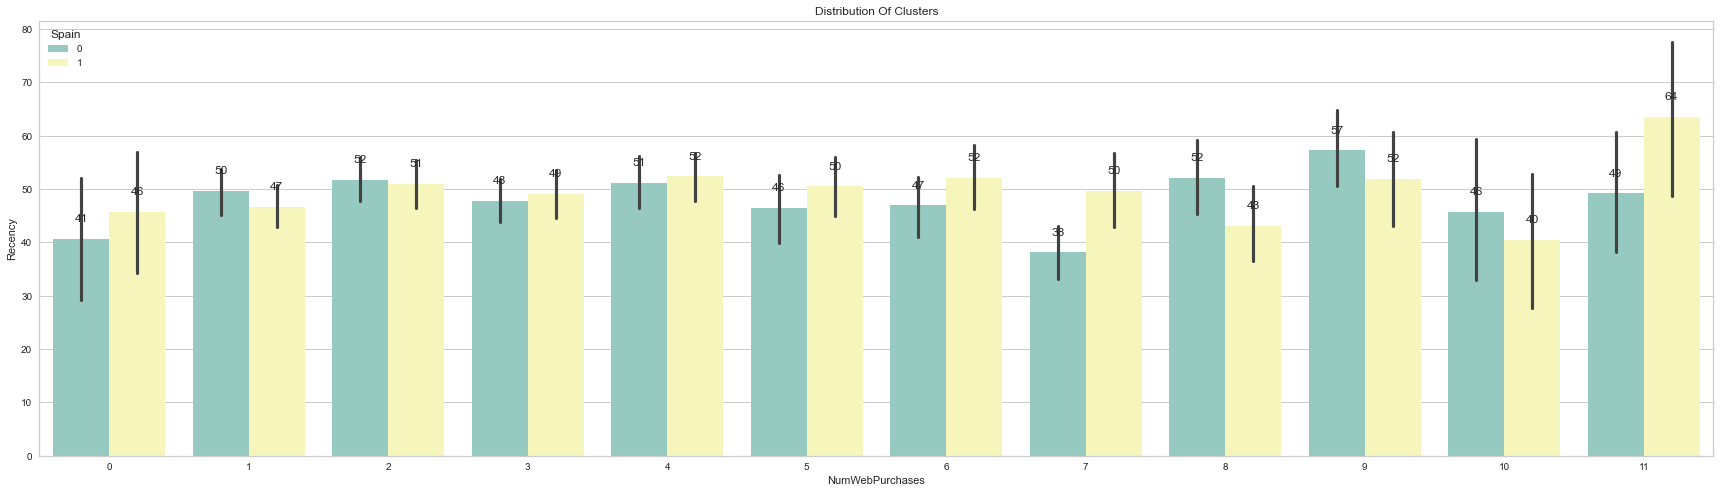

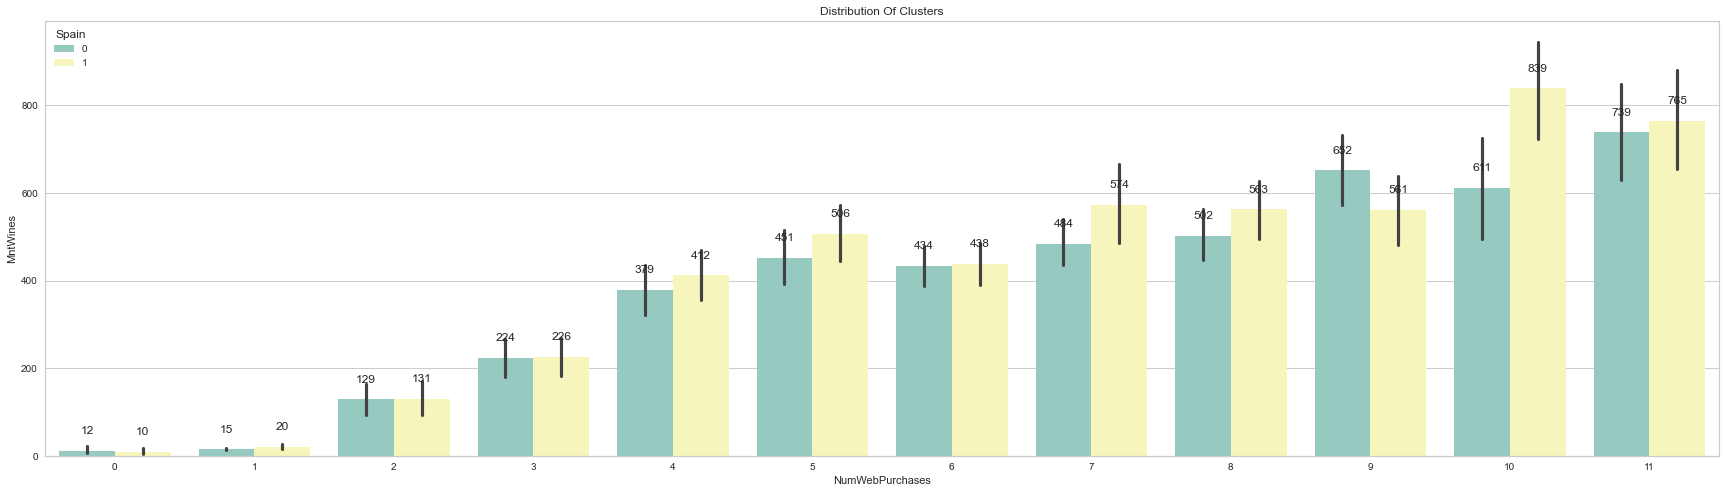

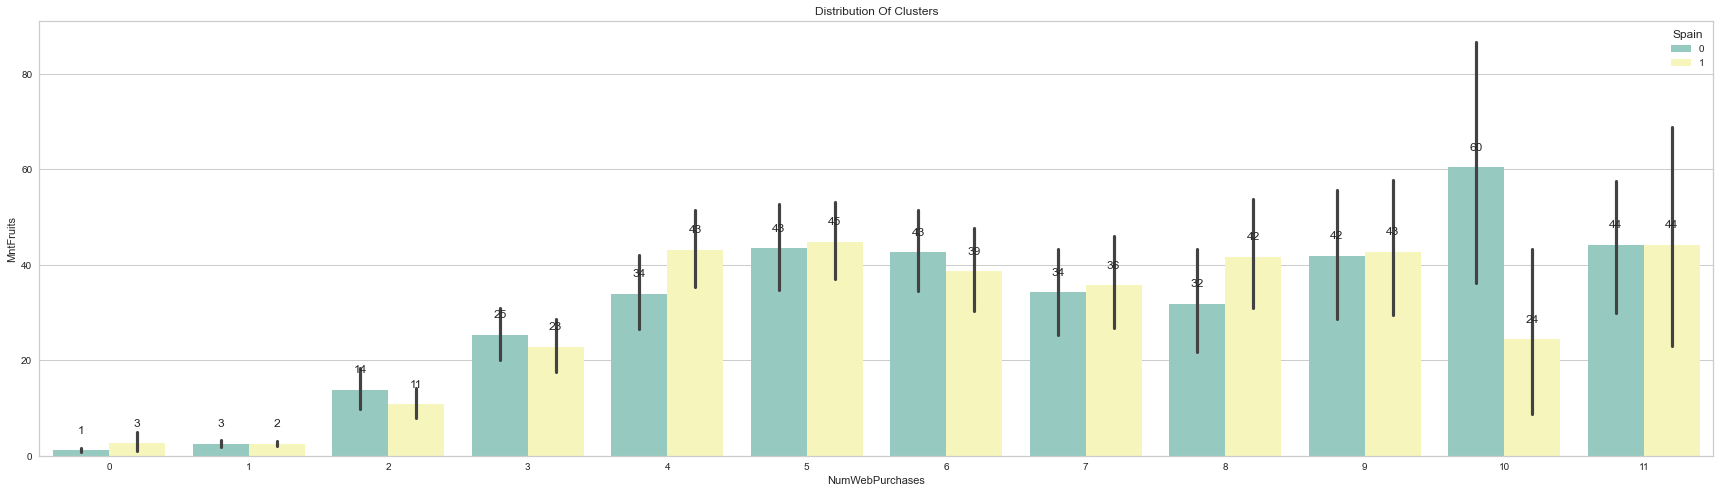

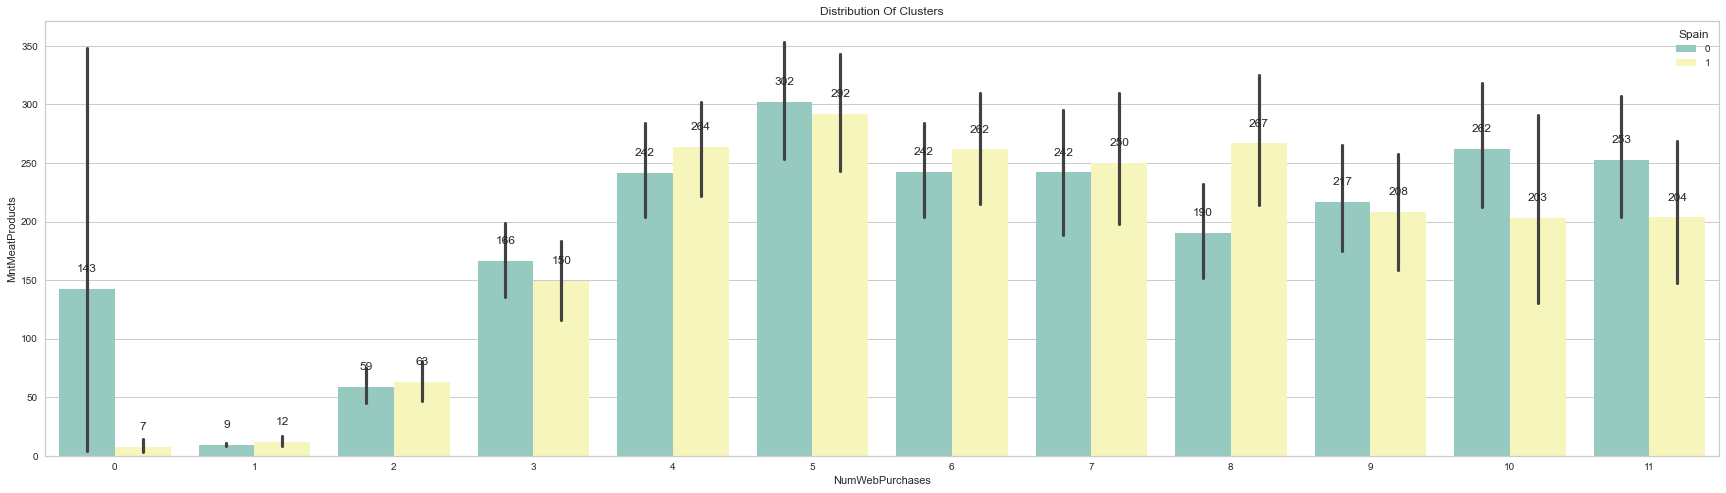

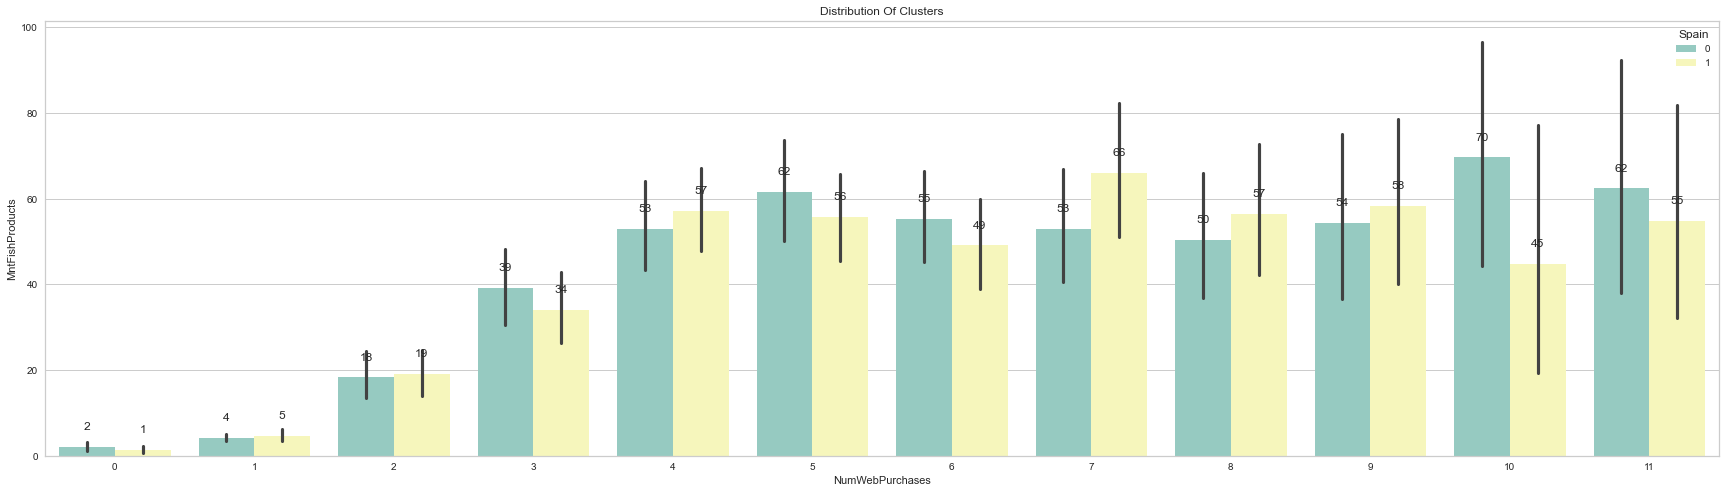

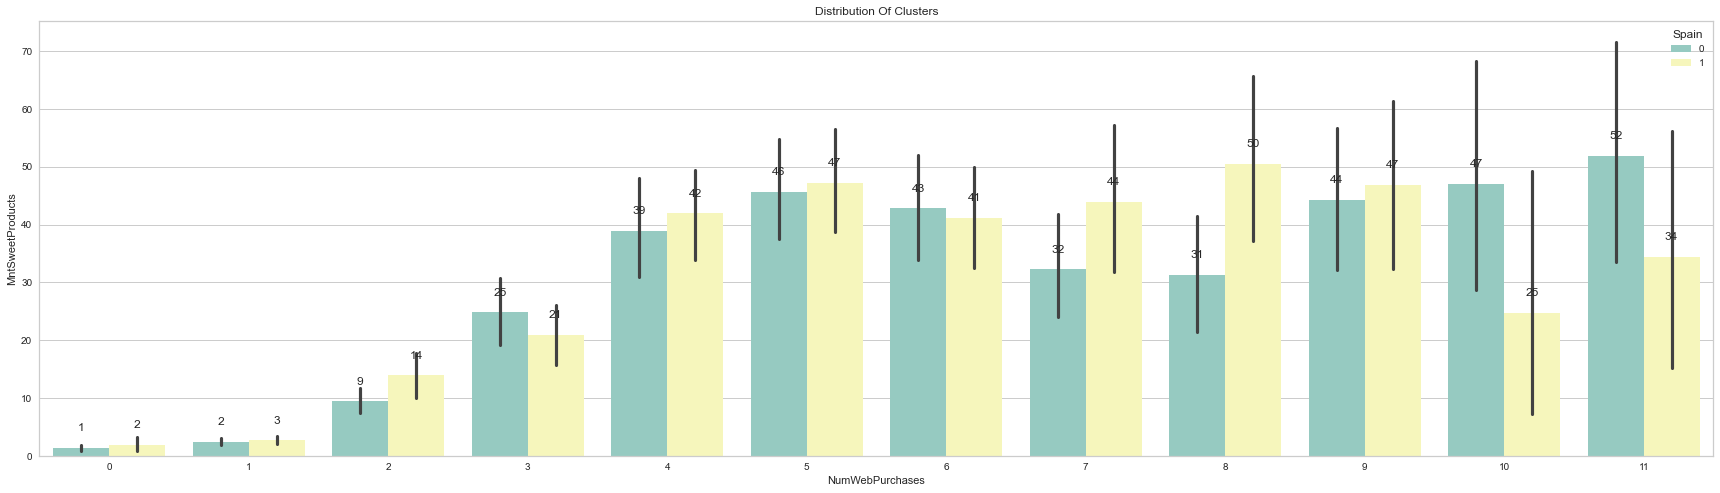

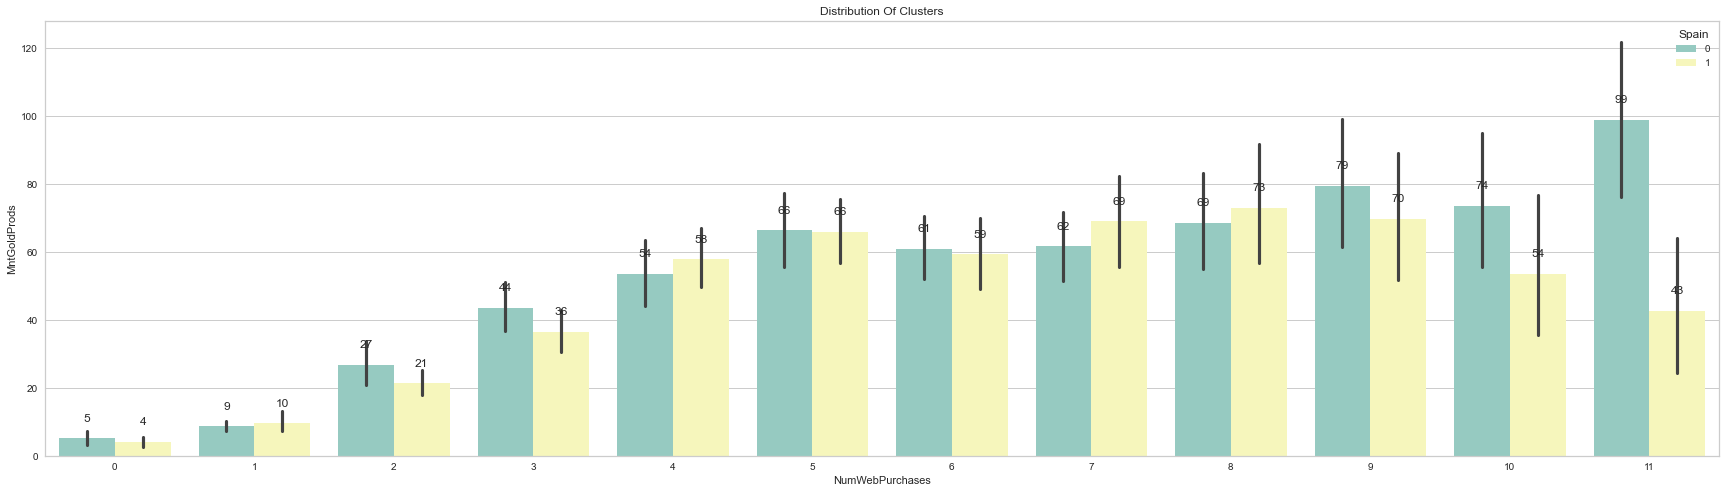

In [206]:
# We will use some of features which dependent to WebPurchase
features = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for i in features:
    plt.figure(figsize=(30,8))
    pl = sns.barplot(x="NumWebPurchases", y=i, hue="Spain",
                 data=new_data, palette="Set3")
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')
        pl.set_title("Distribution Of Web Purchase with Spain")
    plt.show()

- An Spainish Cusotmer has 
    - age of `60` years made 9 times purchase from company's website.
    - `65750` amount spent when customer made purchase 8 times from company's website.
    - In last purchase customer spend `64` days at company's website.
    - `839` amount spent on **wines** when customer made purchase 10 times from company's website.
    - `292` amount spent on **Meats** when customer made purchase 5 times from company's website.

# <font color='red'>14)	What factors influence a Spanish customer to make a web purchase?</font>


In [207]:
spain_df = new_df[new_df['Country']=='Spain']
spain_df.shape

(1091, 42)

In [208]:
spain_df.dtypes

Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
Age                      int64
Total_kids               int64
Join_year                int64
Join_month               int64
Join_weekday             int64
Total_Mnt                int64
Total_num_purchase       int64
Total_campaign           int64
2n Cycle                 uint8
Basic                    uint8
Graduation               uint8
Master  

In [209]:
spain_df.isna().sum()

Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
Total_kids             0
Join_year              0
Join_month             0
Join_weekday           0
Total_Mnt              0
Total_num_purchase     0
Total_campaign         0
2n Cycle               0
Basic                  0
Graduation             0
Master                 0
PhD                    0
Absurd                 0
Alone                  0
Divorced               0
Married                0
Single                 0
Together               0


In [210]:
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()

In [211]:
spain_df['Country'] = Lb.fit_transform(spain_df['Country'])

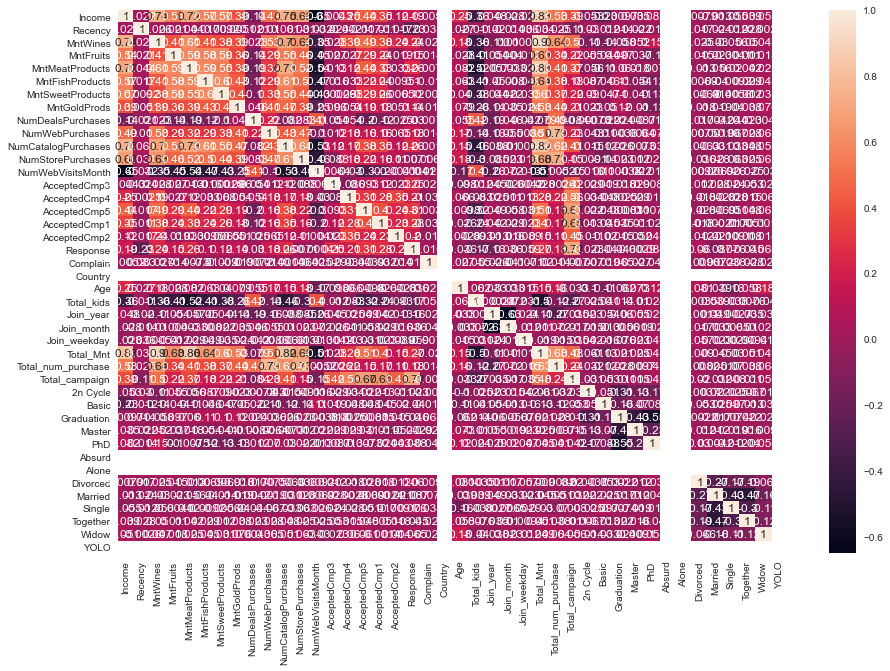

In [212]:
plt.figure(figsize=(15,10))
sns.heatmap(spain_df.corr(),annot=True)
plt.show()

In [213]:
# dropping symmetrical variables(normal distribution)
spain_df = spain_df.drop(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD',
       'Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],axis=1)

In [214]:
# Split target and Independent Variables
X=spain_df.drop(columns=['NumWebPurchases','Total_Mnt','Total_num_purchase'],axis=1)  # Features
y=spain_df['NumWebPurchases']  # Labels

In [215]:
x = sm.add_constant(X) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     35.89
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          3.35e-119
Time:                        09:11:49   Log-Likelihood:                -2344.6
No. Observations:                1091   AIC:                             4739.
Df Residuals:                    1066   BIC:                             4864.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 108.6038    

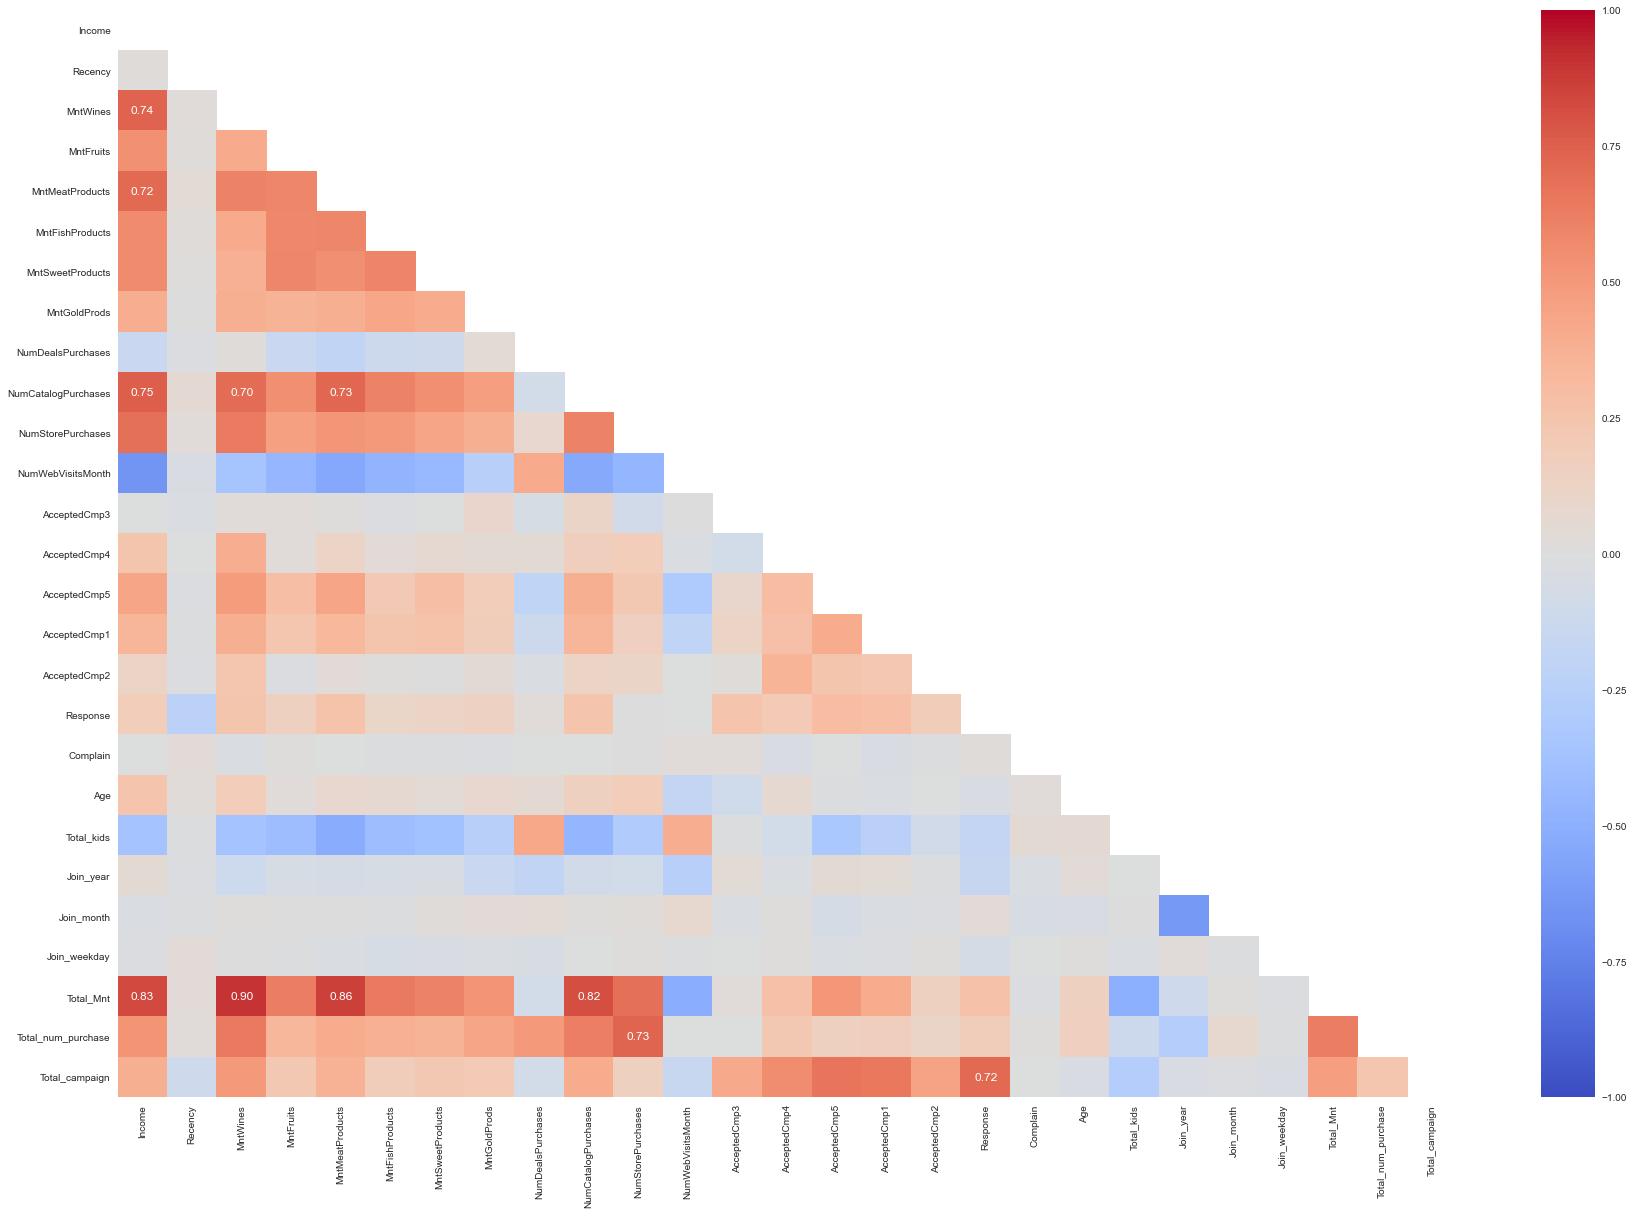

In [216]:
##finding multicollinearity
##Computing the correlation coefficient with NumWebPurchases

# set figure size
plt.figure(figsize=(30,20))

corr = spain_df.drop(['NumWebPurchases','Country'],axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

#### From the heatmap, we can identify strong relationships between:
>- Income and MntWines

>- Income and Total_Mnt
>- MntWines and Total_Mnt
>- MntMeatProducts and Total_Mnt
>- NumCatalogPurchases and Total_Mnt

>- Income and NumCatalogPurchases
>- MntWines and NumCatalogPurchases
>- MntMeatProducts and NumCatalogPurchases

>- NumStorePurchases and Total_num_purchase

>- Total_campaign and Response

In [217]:
## Computing VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = spain_df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [218]:
# features to consider removing
considered_features = ['MntMeatProducts','NumCatalogPurchases','Total_Mnt',
                       'MntWines','Income',"NumStorePurchases","Total_num_purchase",
                      "Total_campaign",'Response']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable        VIF
2            Total_Mnt  41.658264
3             MntWines  14.695344
0      MntMeatProducts  10.268829
4               Income   3.844701
1  NumCatalogPurchases   3.667546
5    NumStorePurchases   3.308127
6   Total_num_purchase   3.009658
7       Total_campaign   2.842191
8             Response   2.324985

>- As shown in the table, ‘MntWines’, ‘MntMeatProducts’,and'Total_Mnt' all have VIF values more than 5.

>- After removing ‘TotalMnt’ (i.e. the feature with the highest VIF), we calculate the VIF values again.

In [219]:
# compute vif values after removing a feature
considered_features.remove('Total_Mnt')
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
3               Income  3.753210
1  NumCatalogPurchases  3.428480
2             MntWines  3.373241
4    NumStorePurchases  3.260747
5   Total_num_purchase  2.992721
6       Total_campaign  2.842174
0      MntMeatProducts  2.627657
7             Response  2.324913

>- We got VIF Score less than 5 

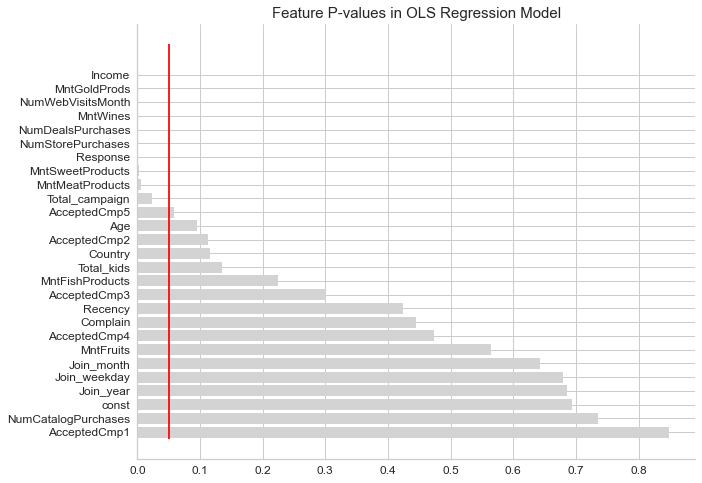

In [220]:
p_values = pd.Series(model.pvalues).sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.barh(y=p_values.index, width=p_values, color='lightgrey',)
plt.vlines(x=0.05, ymin=-0.5, ymax=28.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in OLS Regression Model", size=15)
plt.yticks(size=12)
plt.xticks(size=12)

plt.show()

#### Insights
From our OLS regression model with all the features, the following are the significant features:
>- 'Join_weekday',
 'Age',
 'Join_year',
 'const',
 'Income',
 'MntFishProducts',
 'MntMeatProducts',
 'MntFruits',
 'NumDealsPurchases',
 'MntWines',
 'Country',
 'MntSweetProducts',
 'NumWebVisitsMonth',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'Total_Mnt',
 'Total_num_purchase',
 'MntGoldProds'

In [221]:
pval = list(p_values[p_values>=0.05].index)
pval

['AcceptedCmp1',
 'NumCatalogPurchases',
 'const',
 'Join_year',
 'Join_weekday',
 'Join_month',
 'MntFruits',
 'AcceptedCmp4',
 'Complain',
 'Recency',
 'AcceptedCmp3',
 'MntFishProducts',
 'Total_kids',
 'Country',
 'AcceptedCmp2',
 'Age',
 'AcceptedCmp5']

In [222]:
## Dropping feature which having pvalue having more than 0.05 
spain_df = spain_df.drop(['AcceptedCmp1',
 'NumCatalogPurchases',
 'Join_year',
 'Join_weekday',
 'Join_month',
 'MntFruits',
 'AcceptedCmp4',
 'Complain',
 'Recency',
 'AcceptedCmp3',
 'MntFishProducts',
 'Total_kids',
 'Country',
 'AcceptedCmp2',
 'Age',
 'AcceptedCmp5'],axis=1)

In [223]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# droping sum of product, campaign, purchase and Response
X=spain_df.drop(['NumWebPurchases','Total_Mnt', 'Total_num_purchase'],axis=1)  # Features
y=spain_df['NumWebPurchases']  # Labels

# Split dataset into training set and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2) 
# 80% training and 20% test

In [224]:
Xtrain.shape,ytrain.shape

((872, 10), (872,))

In [225]:
x = sm.add_constant(X) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     84.57
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          3.21e-128
Time:                        09:11:51   Log-Likelihood:                -2352.2
No. Observations:                1091   AIC:                             4726.
Df Residuals:                    1080   BIC:                             4781.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.0488      0.40

Response             0.960650
NumWebVisitsMonth    0.276153
NumDealsPurchases    0.196050
NumStorePurchases    0.082100
MntGoldProds         0.010966
dtype: float64


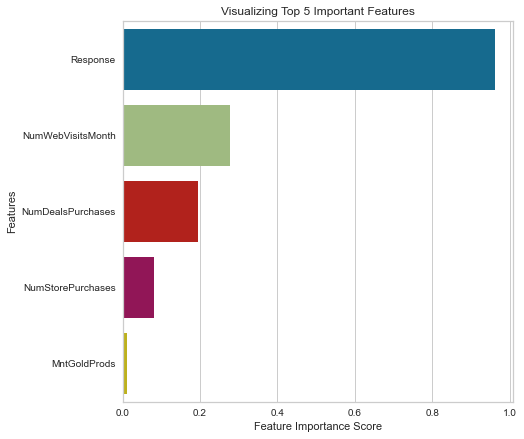

In [226]:
#Import Random Forest Model
from sklearn.linear_model import LinearRegression

#Create a Random Forest Regressor with 100 trees
lr = LinearRegression()

# fit the model
lr.fit(Xtrain, ytrain)

#predict the model
ypred=lr.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(lr.coef_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

MntWines             0.491236
NumWebVisitsMonth    0.162487
MntMeatProducts      0.078534
NumStorePurchases    0.061529
MntGoldProds         0.060373
dtype: float64


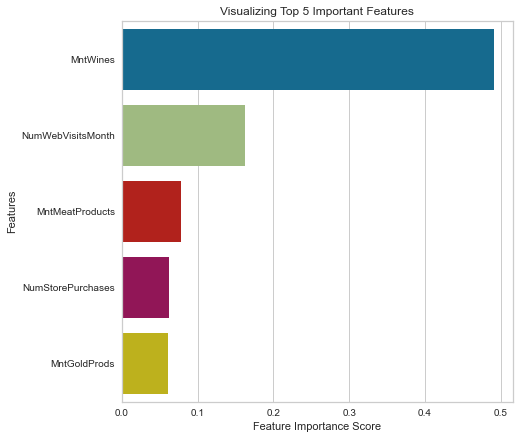

In [227]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor with 100 trees
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

# fit the model
rg.fit(Xtrain, ytrain)

#predict the model
ypred=rg.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

MntGoldProds         0.228128
NumStorePurchases    0.171805
MntWines             0.157379
MntSweetProducts     0.123487
Income               0.123046
dtype: float64


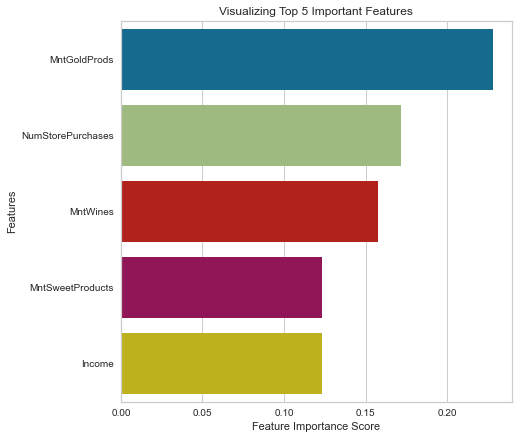

In [228]:
#Import Random Forest  AdaBoost Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Create a Random Forest Regressor with 100 trees as **base model for boosting 
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

#Create a AdaBoost Regressor 
ada = AdaBoostRegressor(base_estimator=rg)

# fit the model
ada.fit(Xtrain, ytrain)

#predict the model
y_pred=ada.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(ada.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

MntWines             0.517789
NumWebVisitsMonth    0.193199
NumDealsPurchases    0.080785
MntMeatProducts      0.071615
MntGoldProds         0.045731
dtype: float64


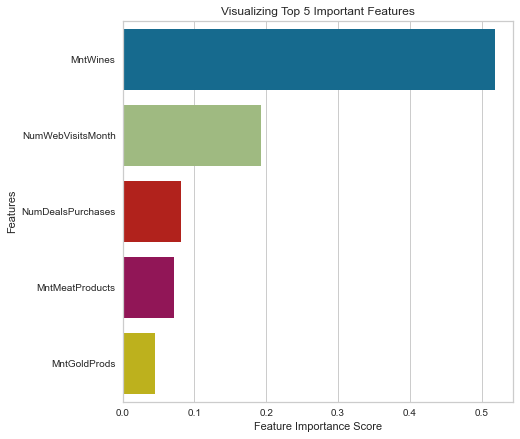

In [229]:
#Import Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

#Initialize parameters
params = {'n_estimators': 200,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#Create a gradient model
gbr = GradientBoostingRegressor(**params,random_state=42)

# fit the model
gbr.fit(Xtrain, ytrain)

#predict the model
y_pred=gbr.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(gbr.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

>- After analysing spainish customer, purchase through company's website on wines, meat, gold, sweet, income, and also visit company's websites.

# <font color='red'> 15) Which products are performing best?</font>


In [230]:
def plot_pie_chart(labels, sizes: pd.Series, title):
    fig, ax = plt.subplots()
    fig.suptitle(title, fontsize=16)
    fig.set_size_inches(5,5)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  
    plt.show()
    print(sizes.sort_values(ascending=False))

## Product

#### we'll look into Overall proportion of products purchased.

In [231]:
sum_each_product = np.sum(Products, axis=0)

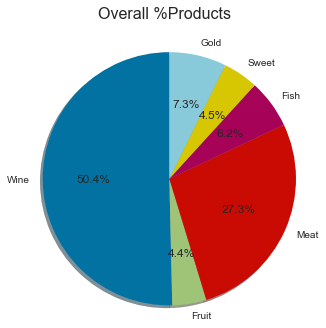

MntWines            50.366771
MntMeatProducts     27.295257
MntGoldProds         7.284899
MntFishProducts      6.216332
MntSweetProducts     4.485494
MntFruits            4.351247
dtype: float64


In [232]:
plot_pie_chart(sizes=sum_each_product/np.sum(sum_each_product)*100, 
               labels=['Wine','Fruit','Meat','Fish','Sweet','Gold'],
              title='Overall %Products')

- **We see that 50.2% of all products purchased by all customers is wine and the second place(27.6%) is meat.**

# <font color='red'>16)	Which channels are underperforming?</font>

## Purchase

#### We'll looking into proportion of the number of purchases in each channel ('Deal', 'Web', 'Catalog', 'Store') to see the performance of each channel.

In [233]:
numeric['Total products amount'] = np.sum(Products, axis=1)

In [234]:
total_purchase_each = np.sum(Purchases.iloc[:,:-1], axis=0)

percent_purchase_each = total_purchase_each/np.sum(total_purchase_each)*100

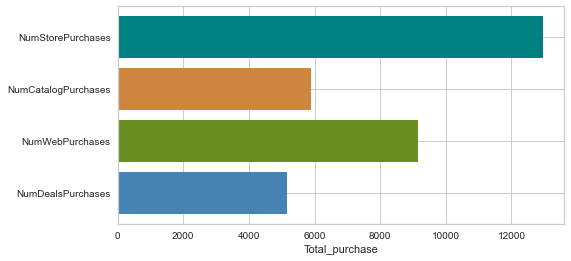

In [235]:
plt.figure(figsize=(8,4))
cam_color = ['steelblue','olivedrab','peru','teal']

plt.barh(y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], 
           width=total_purchase_each.values, color=cam_color)
plt.xlabel('Total_purchase')

plt.show()

In [236]:
total_purchase_each

NumDealsPurchases       5171
NumWebPurchases         9139
NumCatalogPurchases     5877
NumStorePurchases      12956
dtype: int64

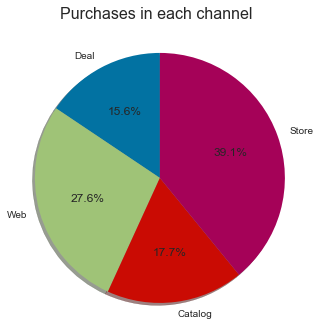

NumStorePurchases      39.091211
NumWebPurchases        27.574450
NumCatalogPurchases    17.732251
NumDealsPurchases      15.602088
dtype: float64


In [237]:
plot_pie_chart(labels=['Deal','Web','Catalog','Store'], sizes=percent_purchase_each, title='Purchases in each channel')

- We see that 39% of all purchase is in store, 27.5% in web, 15.6% in deal, and 17.9% by catalog. We can conclude that ,from the data, more than half of the customers purchased in store and website.

**We'll looking into total number of purchases in each country.**

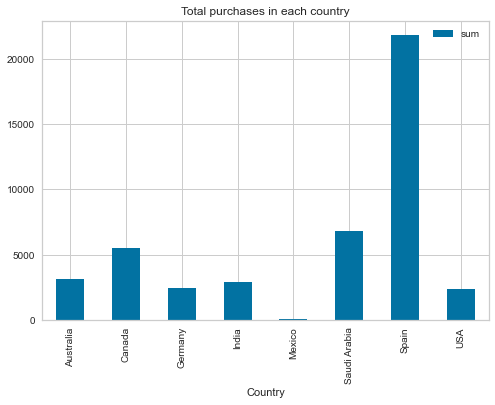

In [238]:
if 'Total purchase' not in Purchases.columns:
    Purchases['Total purchase'] = np.sum(Purchases, axis=1)

Purchase_category = Purchases.join(category)

Purchase_country_summary = pd.pivot_table(Purchase_category, 
                                          values='Total purchase', 
                                          index='Country', 
                                          aggfunc={'Total purchase':['sum']})

Purchase_country_summary.plot(kind='bar')
plt.title('Total purchases in each country')
plt.show()

#### We see that most of the customers are from Spain

## <font color='red'> a. Can you come up with insights on how much money to be spent on each campaign?</font>

In [239]:
Campaigns_Income = Campaigns.join(numeric['Income'])
Campaigns_Income['Total_Accepted'] = np.sum(Campaigns, axis=1)
Campaigns_Income.head()

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

    Income  Total_Accepted  
0  84835.0               0  
1  57091.0               1  
2  67267.0               0  
3  32474.0               0  
4  21474.0               1

In [240]:
Features = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']

In [241]:
list(enumerate(Features))

[(0, 'AcceptedCmp3'),
 (1, 'AcceptedCmp4'),
 (2, 'AcceptedCmp5'),
 (3, 'AcceptedCmp1'),
 (4, 'AcceptedCmp2')]

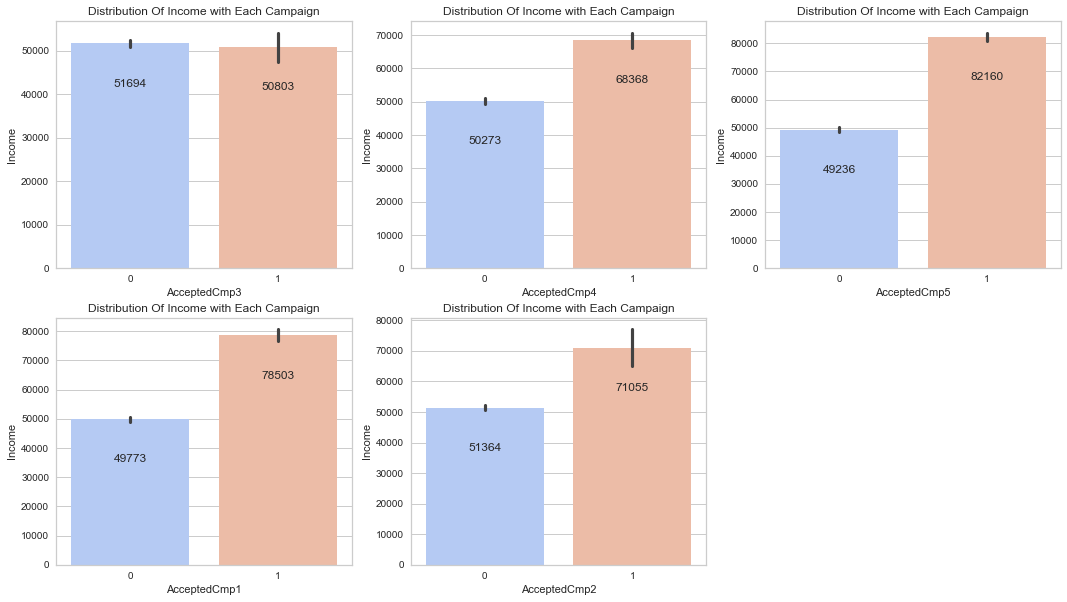

In [242]:
plt.figure(figsize=(18,10))
for i in enumerate(Features):
    plt.subplot(2,3,i[0]+1)
    pl = sns.barplot(i[1],'Income',data=Campaigns_Income,palette='coolwarm')
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -40), 
                   textcoords = 'offset points')
        pl.set_title("Distribution Of Income with Each Campaign")
plt.show()

- During `1st` campaign **78503** amount spent when customer accepting offer.

- During `2nd` campaign **71055** amount spent when customer accepting offer.

- During `3rd` campaign **50803** amount spent when customer accepting offer.

- During `4th` campaign **68368** amount spent when customer accepting offer.

- During `5th` campaign **82160** amount spent when customer accepting offer.

## <font color = 'red'> b. How many purchases happened in cluster 1, cluster 2, and cluster 3.</font>

In [255]:
Purchases

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     1                4                    4   
1                     1                7                    3   
2                     1                3                    2   
3                     1                1                    0   
4                     2                3                    1   
...                 ...              ...                  ...   
2235                  2                5                    2   
2236                  1                1                    0   
2237                  2                6                    1   
2238                  1                5                    4   
2239                  1                8                    5   

      NumStorePurchases  NumWebVisitsMonth  Total purchase  
0                     6                  1              16  
1                     7                  5              23  
2                     5                  2              13  
3                     2                  7              11  
4                     2                  7              15  
...                 ...                ...             ...  
2235                 11                  4              24  
2236                  3                  8              13  
2237                  5                  8              22  
2238                 10                  3              23  
2239                  4                  7              25  

[2229 rows x 6 columns]

In [256]:
#Lets define outliers function which returns a list of index of outliers.
def outliers (df,ft):
    Q1 = df[ft].quantile(0.25) 
    Q3 = df[ft].quantile(0.75) 
    IQR = Q3 - Q1
    
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    # create a list which having indices of outliers 
    ls = df.index[ (df[ft] < lower_range) | (df[ft] > upper_range) ]
    return ls

In [257]:
Features = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [259]:
#create an empty list to store output indices from multiple columns

index_list = []
### extract the outliers from each columns
for feature in Features:
    index_list.extend(outliers(Purchases,feature))

In [260]:
#define a function called 'remove_outliers' which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls = sorted(set(ls))
    df = Purchases.drop(ls)
    return df

In [261]:
df_cleaned = remove(df,index_list)
df_cleaned.shape

(2118, 6)

In [263]:
Purchase_Sales_Cluster = df_cleaned.join(df_concat[['Income','Clusters']])

In [264]:
Purchase_Sales_Cluster

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     1                4                    4   
1                     1                7                    3   
2                     1                3                    2   
3                     1                1                    0   
4                     2                3                    1   
...                 ...              ...                  ...   
2235                  2                5                    2   
2236                  1                1                    0   
2237                  2                6                    1   
2238                  1                5                    4   
2239                  1                8                    5   

      NumStorePurchases  NumWebVisitsMonth  Total purchase   Income  Clusters  
0                     6                  1              16  84835.0         1  
1                     7                  5              23  57091.0         0  
2                     5                  2              13  67267.0         2  
3                     2                  7              11  32474.0         0  
4                     2                  7              15  21474.0         0  
...                 ...                ...             ...      ...       ...  
2235                 11                  4              24  66476.0         2  
2236                  3                  8              13  31056.0         0  
2237                  5                  8              22  46310.0         0  
2238                 10                  3              23  65819.0         0  
2239                  4                  7              25  94871.0         0  

[2118 rows x 8 columns]

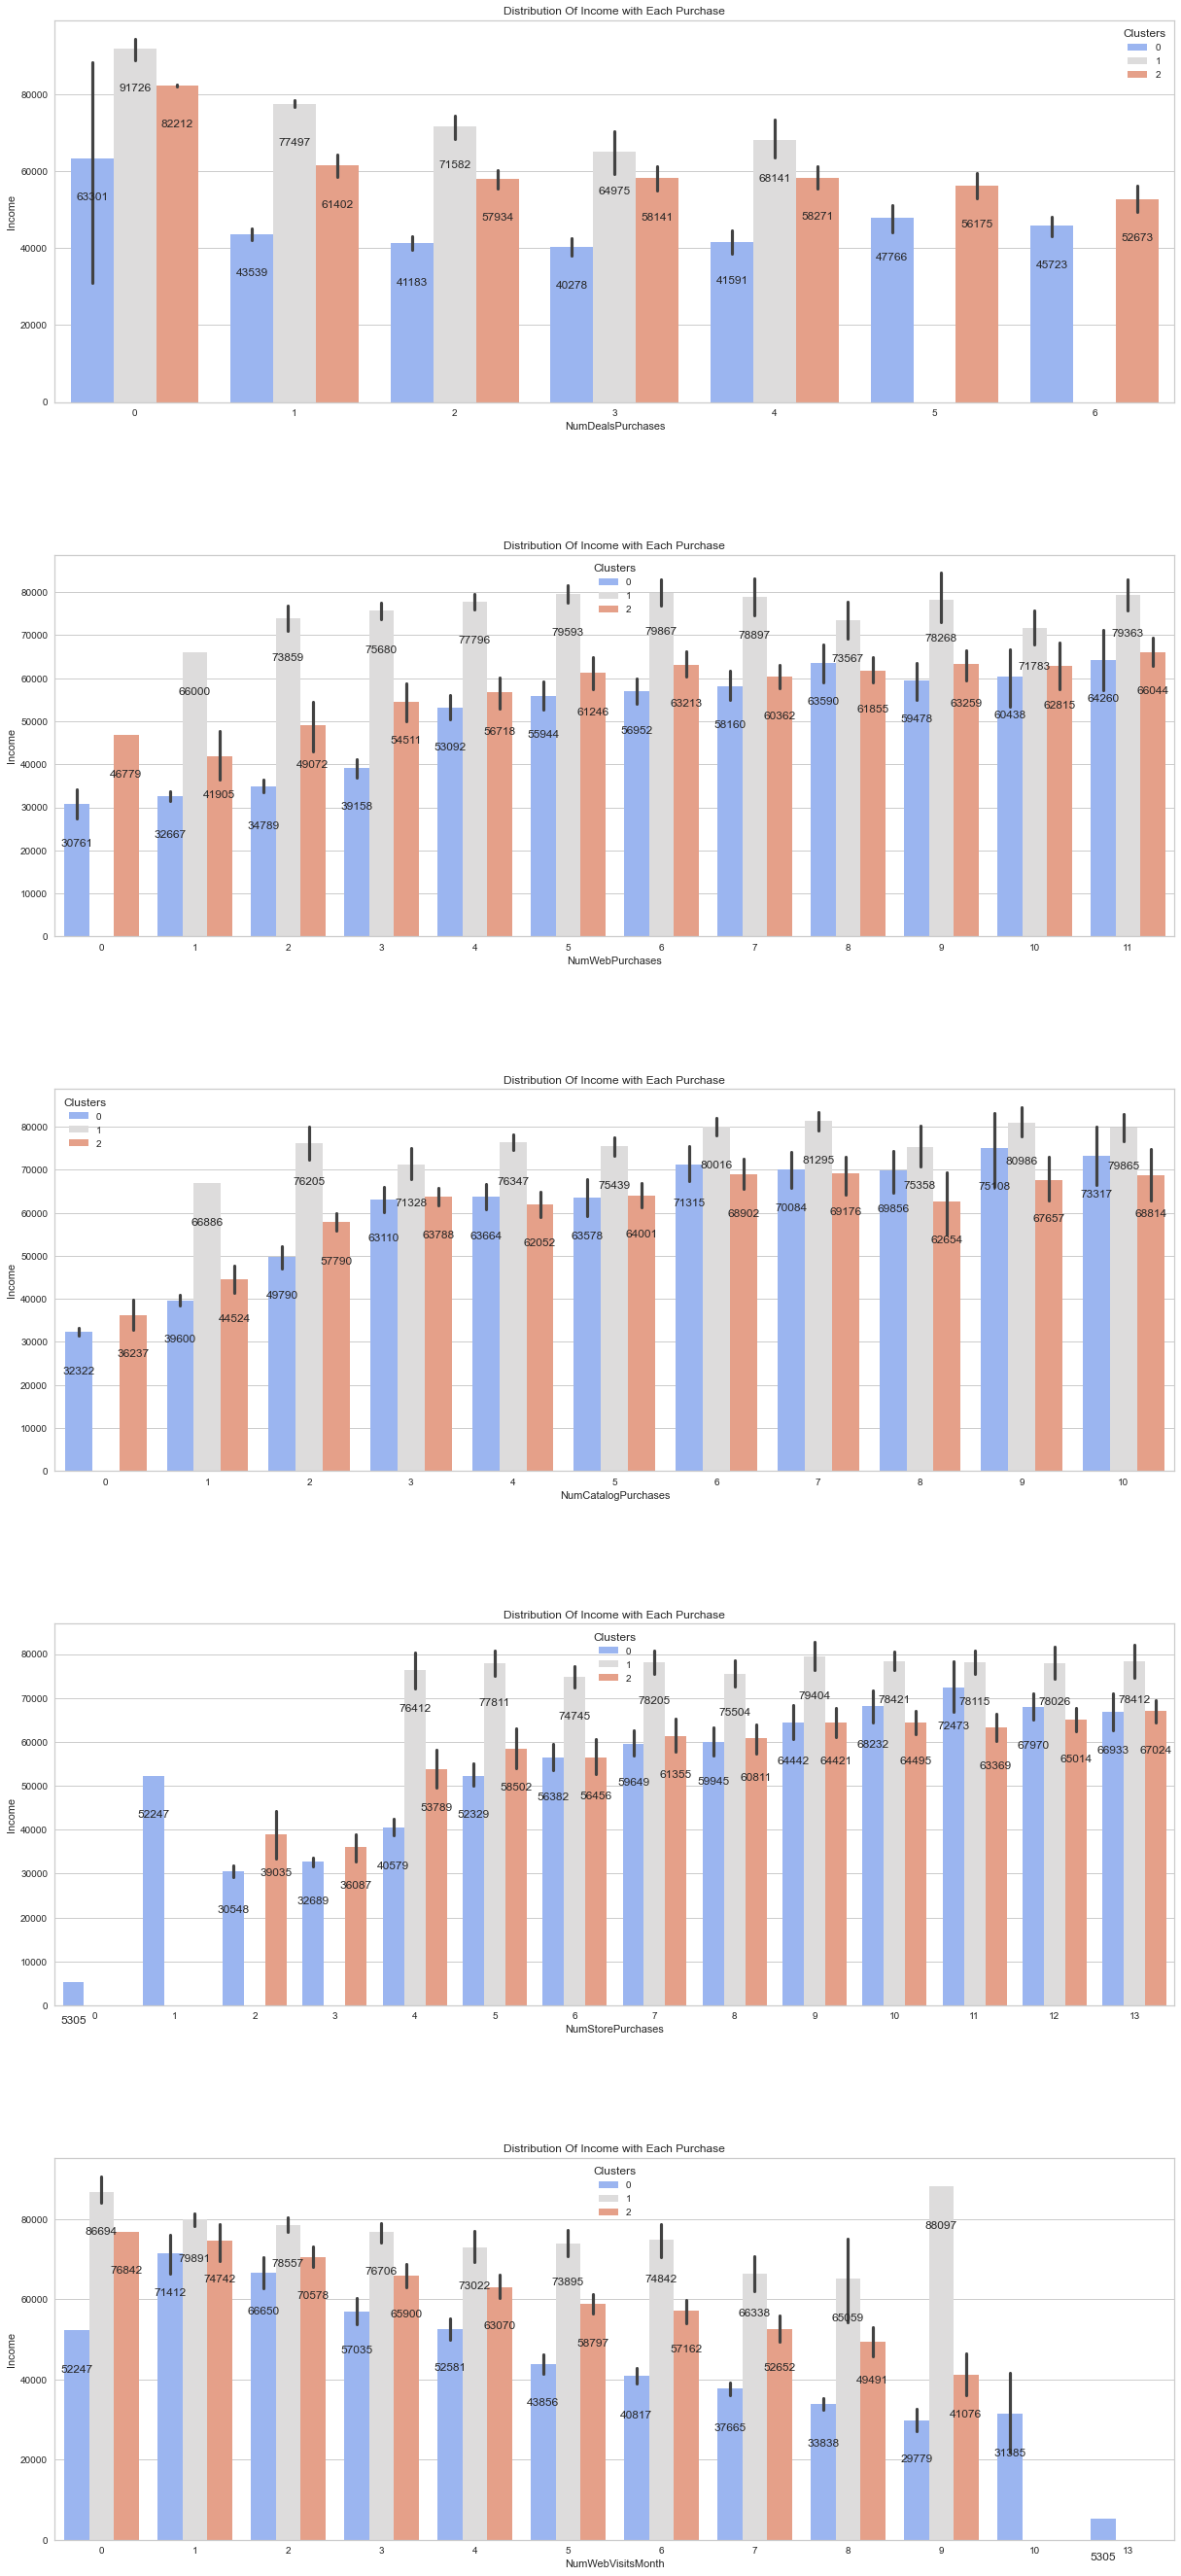

In [268]:
plt.figure(figsize=(20,45))
for i in enumerate(Features):
    plt.subplot(5,1,i[0]+1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    pl = sns.barplot(i[1],'Income',hue='Clusters',data=Purchase_Sales_Cluster,palette='coolwarm')
    for p in pl.patches:
        pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -40), 
                   textcoords = 'offset points')
        pl.set_title("Distribution Of Income with Each Purchase")
plt.show()

## Summary

**Q.2 to Q.4**
- For this data, Linear Regression is not good model to identify significant features becasue Cond. no is very high which indicates that model having strong multicollinearity and aslo we did not get important features.
- Other than Linear Regression, We build model with random forest and with boosting techniques(Adaboost and GradientBoost).

>- The factors are significantly related to the **number of web purchases:**
        - `NumWebVisitMonth`
        - `Income`
        - `MntWines`
        - `MntGoldProds` and
        - `Mnt SweetProduts`
        
>- The factors are significantly related to the **number of store purchases:**
        - `Income` 
        - `MntMeatProducts`
        - `MntWines` and 
        - `MntFruits`         
        
>- The factors are significantly related to the **number of catalog purchases:**
        - `Income` 
        - `MntMeatProducts`
        - `MntWines` and 
        - `MntGoldPords`
           
**Q.5 to Q.8**
- Most of Customer accepted offer in the 4th campaign with 25% success rate in particular campaign.After analyzing each campaign we got slighlty difference in success rate of 3rd,4th,and 5th campaign.
- Only 2nd campaign having less success rate with 4.5%.
- For **store** visits,
    - 14% of offer accepted in 5th campaign when customer made high purchases.
    - 13% of offer accepted in 4th campaign when customer made medium and high purchases.
    - 94% of offer accepted in overall campaign when customer made medium and high purchases.
- For **web** visits,
    - 15% of offer accepted in 4th campaign when customer made high purchases.
    - 14% of offer accepted in 5th campaign when customer made medium purchases.
    - 96% of offer accepted in overall campaign when customer made medium and high purchases.

**Q.9**
- Based on Cluster Segmenation we analyse average customer
- With help of Kmeans we created 3 clsuter as **Cluster 0**, **Cluster 1** and **Clsuter 2**.
- An average customer has
    - an annual income of **77613** in `cluster 1`.
    - 50 years age group in all cluster.
    - spent more than 3000 days when they enrolled in company in all cluster.  
    - **49** days since last purchase in all cluster.
    - Among all products most of amount spent on **`Wines`**,and **`Meat`** in the last 2 years among all clusters. 
    - **`Education`**
        - for cluster 0 every customer is an educated and among all degree, most of customer is graduate.
        - only Basic Education is given to cluster 0.
    - **`Marital_Status`**
        - We visaulize that only Divorced, Single, Married, and Together customer having in all clsuter.
        - `Married` customer having highest number in all clusters.
        - `Widow`, `Yolo`, `Alone`,and `Absurd` not having all cluster segmentation of customer.
    - **`Country`**
        - We visaulize that except Germany and Mexcio having all cluster.
        - `Spain` having highest number of customer in all clusters.
        - `Mexico` having only 3 customer in clsuter 2.
        - `Germany` do not having any customer in clsuter 1.

**Q.10 to Q.13**
- **`Website`**
    - If customer has to make purchse through website, we will check **`medium`** and **`high`** purchase made by different features which are dependent to Web Purchase.
    - We already assigned group 2 as "medium" and group 3 as "high"
        - more than 60000 Income spent on website for purchase household yearly.
        - customer spend 49 days in last purchase through website.
        - Wines, Fish and Gold Products moslty purchase through website.
        - 55 years age group customer made purchase through websites.
        - Most of customer made purchase with discount on websites.  
- **`Store`**
    - If customer has to make purchse through directly **`store`**, we will check **`medium`** and **`high`** purchase made by different features which are dependent to Store Purchase.
    - We already assigned group 2 as "medium" and group 3 as "high"
        - more than 70000 Income spent on store for purchase household yearly.
        - customer spend 50 days in last purchase through sotre.
        - Wines,Fruits,Meat,Fish,Sweets and Gold Products moslty purchase through directly store.
        - Customer spent more on purchase direclty from store rather than visiting Website. 
        - 55 years age group customer made purchase through websites.
        - Most of customer made purchase using catalog on websites.
- **`Americian Customer who makes a store purchase`**
    - An USA Cusotmer has 
        - age of `66` years made 9 times purchase directly store.
        - `71744` amount spent when customer made purchase 12 times from store.
        - Among all products most of amount spent on **`Wines`**,and **`Meat`** in the last 2 years.
        - In last purchase customer spend `63` days at store.
- **`Spainish Customer who makes a web purchase`** 
    - An Spainish Cusotmer has 
        - age of `60` years made 9 times purchase from company's website.
        - `65750` amount spent when customer made purchase 8 times from company's website.
        - In last purchase customer spend `64` days at company's website.
        - Among all products most of amount spent on **`Wines`**,and **`Meat`** in the last 2 years.
        
**Q.14**
- After analysing spainish customer, purchase through company's website on all channel(purchase of Deal, Store, Web, Catalog), and amount spent on all product (Sweet, Fish, Meat, Fruits, Gold, Wines).

**Q.15**
- We see that 50.2% of all products purchased by all customers is wine and the second place(27.6%) is meat.

**Q.16**
- We see that 39% of all purchase is in store, 27.5% in web, 15.6% in deal, and 17.9% by catalog. We can conclude that ,from the data, more than half of the customers purchased in store and website.

**Q.16(a)**
- 82160 amount spent in 5th Campaign when customer accepted offer.